## **Problem Statement: Predicting Malaysia's Unemployment Trends**
## **Group 35**

###1. Jonathan Siew Zunxian (23004944/1)
###2. Goh Shu Hui (23004975/1)
###3. Adam bin Razali (22002146/2)
###4. Lam Xiao Jun (23004915/1)
###5. Cynthia Ong Ka (23004897/1)
###6. Syivhanii A/P Selvarajan (23004904/1)

Datasets Link: https://drive.google.com/drive/folders/1CsSmV0nswg1Q4viAECAu8_HfkQZ9enzP?usp=sharing

In [ ]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')

<ipython-input-3-d867fd071f7d>:2: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('pdf', 'svg')


In [ ]:
# Line Wrapping in Collaboratory Google results

from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
!pip install scikeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 63.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 35.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.3.3 which is incompatible.


## Step 1: Organizing the Datasets (Jonathan+Shu Hui+Adam)

Datasets Source

1. Malaysian Bureau of Labour Statistics (MBLS)
2. Ministry of Economy Malaysia
3. Department of Statistics Malaysia (DOSM)
4. Malaysia Informative Data Center (MysIDC)

### (D1) Exploring 1982 to 2022 Labour Force Survey_year_Overall Unemployment Rate.csv (Jonathan+Shu Hui+Adam)

In [ ]:
labour_force_survey_unemployment_stats=pd.read_csv("/content/1982 to 2022 Labour Force Survey_year_Overall Unemployment Rate.csv")
print (labour_force_survey_unemployment_stats.head())

         date      lf  lf_employed  lf_unemployed  lf_outside  p_rate  \
0  1982-01-01  5431.4       5249.0          182.4      2944.6    64.8   
1  1983-01-01  5671.8       5457.0          214.9      2969.4    65.6   
2  1984-01-01  5862.5       5566.7          295.8      3119.6    65.3   
3  1985-01-01  5990.1       5653.4          336.8      3124.9    65.7   
4  1986-01-01  6222.1       5760.1          461.9      3188.3    66.1   

   ep_ratio  u_rate  
0      62.7     3.4  
1      63.2     3.8  
2      62.0     5.0  
3      62.0     5.6  
4      61.2     7.4  


In [ ]:
labour_force_survey_unemployment_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           39 non-null     object 
 1   lf             39 non-null     float64
 2   lf_employed    39 non-null     float64
 3   lf_unemployed  39 non-null     float64
 4   lf_outside     39 non-null     float64
 5   p_rate         39 non-null     float64
 6   ep_ratio       39 non-null     float64
 7   u_rate         39 non-null     float64
dtypes: float64(7), object(1)
memory usage: 2.6+ KB


| Name in Dataset | Variable          | Definition                                                                                             |
|-----------------|-------------------|--------------------------------------------------------------------------------------------------------|
| date (Date)     | Date              | The date in YYYY-MM-DD format, with MM-DD set to 01-01 since the data is at annual frequency           |
| lf (Float)      | Labour Force Size | The number (in thousands) of employed and unemployed individuals. This figure also represents the number of people participating in the labour force. |
| lf_employed (Float) | Employed Persons | The number (in thousands) of people who worked at least one hour for pay, profit or family gain, in thousands of people |
| lf_unemployed (Float) | Unemployed Persons | The number (in thousands) of people who did not work but were looking for work or available to work |
| lf_outside (Float) | Persons outside Labour Force | The number (in thousands) of people not classified as employed or unemployed, including housewives, students, early retired, disabled persons and those not interested in looking for a job |
| u_rate (Float) | Unemployment Rate | Ratio of unemployed to labour force size |
| p_rate (Float) | Participation Rate | Ratio of the labour force size to the working-age (15-64) population |
| ep_ratio (Float) | Employment-Population Ratio | Ratio of the number of employed people to the working-age (15-64) population |


In [ ]:
# Rename the 'date' column to 'year'
labour_force_survey_unemployment_stats.rename(columns={'date': 'Year'}, inplace=True)

# Convert 'year' column to datetime and extract the year
labour_force_survey_unemployment_stats['Year'] = pd.to_datetime(labour_force_survey_unemployment_stats['Year']).dt.year

In [ ]:
labour_force_survey_unemployment_stats.head()

,Year,lf,lf_employed,lf_unemployed,lf_outside,p_rate,ep_ratio,u_rate
0,1982,5431.4,5249.0,182.4,2944.6,64.8,62.7,3.4
1,1983,5671.8,5457.0,214.9,2969.4,65.6,63.2,3.8
2,1984,5862.5,5566.7,295.8,3119.6,65.3,62.0,5.0
3,1985,5990.1,5653.4,336.8,3124.9,65.7,62.0,5.6
4,1986,6222.1,5760.1,461.9,3188.3,66.1,61.2,7.4


Adding the word `national` to the relevant features to get better understanding of the data

In [ ]:
labour_force_survey_unemployment_stats.rename(columns={"lf": "national_lf ('000) (D1)"}, inplace=True)
labour_force_survey_unemployment_stats.rename(columns={"lf_employed": "national_lf_employed ('000) (D1)"}, inplace=True)
labour_force_survey_unemployment_stats.rename(columns={"lf_unemployed": "national_lf_unemployed ('000) (D1)"}, inplace=True)
labour_force_survey_unemployment_stats.rename(columns={"lf_outside": "national_lf_outside ('000) (D1)"}, inplace=True)
labour_force_survey_unemployment_stats.rename(columns={"p_rate": "national_p_rate (%) (D1)"}, inplace=True)
labour_force_survey_unemployment_stats.rename(columns={"ep_ratio": "national_ep_ratio (%) (D1)"}, inplace=True)
labour_force_survey_unemployment_stats.rename(columns={"u_rate": "national_u_rate (%) (D1)"}, inplace=True)

In [ ]:
labour_force_survey_unemployment_stats.head()

,Year,national_lf ('000) (D1),national_lf_employed ('000) (D1),national_lf_unemployed ('000) (D1),national_lf_outside ('000) (D1),national_p_rate (%) (D1),national_ep_ratio (%) (D1),national_u_rate (%) (D1)
0,1982,5431.4,5249.0,182.4,2944.6,64.8,62.7,3.4
1,1983,5671.8,5457.0,214.9,2969.4,65.6,63.2,3.8
2,1984,5862.5,5566.7,295.8,3119.6,65.3,62.0,5.0
3,1985,5990.1,5653.4,336.8,3124.9,65.7,62.0,5.6
4,1986,6222.1,5760.1,461.9,3188.3,66.1,61.2,7.4


In [ ]:
labour_force_survey_unemployment_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 8 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Year                                39 non-null     int32  
 1   national_lf ('000) (D1)             39 non-null     float64
 2   national_lf_employed ('000) (D1)    39 non-null     float64
 3   national_lf_unemployed ('000) (D1)  39 non-null     float64
 4   national_lf_outside ('000) (D1)     39 non-null     float64
 5   national_p_rate (%) (D1)            39 non-null     float64
 6   national_ep_ratio (%) (D1)          39 non-null     float64
 7   national_u_rate (%) (D1)            39 non-null     float64
dtypes: float64(7), int32(1)
memory usage: 2.4 KB


### (D2) Exploring  1.1.1.1 Gross Domestic Product and Gross National Income at Current Prices 1947 – 2023 Malaysia_dataset.csv (Jonathan)

In [ ]:
gdp_current_stats=pd.read_excel("/content/1.1.1.1 Gross Domestic Product and Gross National Income at Current Prices 1947 – 2023 Malaysia_dataset.xlsx", sheet_name='dataset')
print (gdp_current_stats.head())

       Price type  Year GDP (RM Million) GNI  (RM Million)  \
0  Current Prices  1947             3531              3511   
1  Current Prices  1948             3619              3580   
2  Current Prices  1949             3550              3400   
3  Current Prices  1950             5345              4765   
4  Current Prices  1951             7520              6840   

  GDP per capita (RM) GNI per capita (RM) Status Data  
0                 719                 715           f  
1                 726                 718           f  
2                 699                 669           f  
3                1023                 912           f  
4                1409                1282           f  


In [ ]:
gdp_current_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Price type           77 non-null     object
 1   Year                 77 non-null     int64 
 2   GDP (RM Million)     77 non-null     object
 3   GNI  (RM Million)    77 non-null     object
 4   GDP per capita (RM)  77 non-null     object
 5   GNI per capita (RM)  77 non-null     object
 6   Status Data          77 non-null     object
dtypes: int64(1), object(6)
memory usage: 4.3+ KB


In [ ]:
gdp_current_stats.rename(columns={'GDP (RM Million)': 'National GDP (RM Million) (D2)'}, inplace=True)
gdp_current_stats.rename(columns={'Price type': 'Price type (D2)'}, inplace=True)

I am retaining Price type, Year and National GDP (RM Million) for our model as the other features are not relevant for our predictive model

In [ ]:
gdp_current_stats_new = gdp_current_stats.drop(columns=['GNI  (RM Million)', 'GDP per capita (RM)', 'GNI per capita (RM)', 'Status Data'])

# To see the changes, print the first few rows of the DataFrame
print(gdp_current_stats_new.head(100))

   Price type (D2)  Year National GDP (RM Million) (D2)
0   Current Prices  1947                           3531
1   Current Prices  1948                           3619
2   Current Prices  1949                           3550
3   Current Prices  1950                           5345
4   Current Prices  1951                           7520
..             ...   ...                            ...
72  Current Prices  2019                        1512738
73  Current Prices  2020                        1418491
74  Current Prices  2021                        1548898
75  Current Prices  2022                        1791358
76  Current Prices  2023                        1822647

[77 rows x 3 columns]


In [ ]:
gdp_current_stats_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 3 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Price type (D2)                 77 non-null     object
 1   Year                            77 non-null     int64 
 2   National GDP (RM Million) (D2)  77 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.9+ KB


In [ ]:
# Check which rows contain '..'
invalid_rows = gdp_current_stats_new['National GDP (RM Million) (D2)'] == '..'
print("Invalid rows:", gdp_current_stats_new[invalid_rows])

# Remove these rows
gdp_current_stats_new = gdp_current_stats_new[~invalid_rows]

Invalid rows:   Price type (D2)  Year National GDP (RM Million) (D2)
7  Current Prices  1954                             ..


In [ ]:
# Display the DataFrame to verify removal
print(gdp_current_stats_new)

   Price type (D2)  Year National GDP (RM Million) (D2)
0   Current Prices  1947                           3531
1   Current Prices  1948                           3619
2   Current Prices  1949                           3550
3   Current Prices  1950                           5345
4   Current Prices  1951                           7520
..             ...   ...                            ...
72  Current Prices  2019                        1512738
73  Current Prices  2020                        1418491
74  Current Prices  2021                        1548898
75  Current Prices  2022                        1791358
76  Current Prices  2023                        1822647

[76 rows x 3 columns]


In [ ]:
# Ensure that the 'Year' columns are of the same data type
gdp_current_stats_new['National GDP (RM Million) (D2)'] = gdp_current_stats_new['National GDP (RM Million) (D2)'].astype(int)

In [ ]:
# Calculate the GDP growth rate
gdp_current_stats_new['national_gdp_growth (%) (D2)'] = gdp_current_stats_new['National GDP (RM Million) (D2)'].pct_change() * 100

In [ ]:
gdp_current_stats_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76 entries, 0 to 76
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Price type (D2)                 76 non-null     object 
 1   Year                            76 non-null     int64  
 2   National GDP (RM Million) (D2)  76 non-null     int64  
 3   national_gdp_growth (%) (D2)    75 non-null     float64
dtypes: float64(1), int64(2), object(1)
memory usage: 3.0+ KB


In [ ]:
gdp_current_stats_new.head(76)

,Price type (D2),Year,National GDP (RM Million) (D2),national_gdp_growth (%) (D2)
0,Current Prices,1947,3531,NaN
1,Current Prices,1948,3619,2.492212
2,Current Prices,1949,3550,-1.906604
3,Current Prices,1950,5345,50.563380
4,Current Prices,1951,7520,40.692236
...,...,...,...,...
72,Current Prices,2019,1512738,4.488175
73,Current Prices,2020,1418491,-6.230226
74,Current Prices,2021,1548898,9.193361
75,Current Prices,2022,1791358,15.653710


In [ ]:
# Ensure that the 'Year' columns are of the same data type
gdp_current_stats_new['Year'] = gdp_current_stats_new['Year'].astype(int)
labour_force_survey_unemployment_stats['Year'] = labour_force_survey_unemployment_stats['Year'].astype(int)

In [ ]:
# Merge the datasets on 'Year'
merged_df_labour_force_gdp_current_stats= pd.merge(gdp_current_stats_new, labour_force_survey_unemployment_stats, on='Year', how='inner')

# Check the merged DataFrame
print(merged_df_labour_force_gdp_current_stats)

   Price type (D2)  Year  National GDP (RM Million) (D2)  \
0   Current Prices  1982                           62599   
1   Current Prices  1983                           70444   
2   Current Prices  1984                           79550   
3   Current Prices  1985                           77470   
4   Current Prices  1986                           71594   
5   Current Prices  1987                           81085   
6   Current Prices  1988                           92370   
7   Current Prices  1989                          105233   
8   Current Prices  1990                          119081   
9   Current Prices  1992                          150682   
10  Current Prices  1993                          172194   
11  Current Prices  1995                          222473   
12  Current Prices  1996                          253732   
13  Current Prices  1997                          281795   
14  Current Prices  1998                          283243   
15  Current Prices  1999                

In [ ]:
merged_df_labour_force_gdp_current_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Price type (D2)                     39 non-null     object 
 1   Year                                39 non-null     int64  
 2   National GDP (RM Million) (D2)      39 non-null     int64  
 3   national_gdp_growth (%) (D2)        39 non-null     float64
 4   national_lf ('000) (D1)             39 non-null     float64
 5   national_lf_employed ('000) (D1)    39 non-null     float64
 6   national_lf_unemployed ('000) (D1)  39 non-null     float64
 7   national_lf_outside ('000) (D1)     39 non-null     float64
 8   national_p_rate (%) (D1)            39 non-null     float64
 9   national_ep_ratio (%) (D1)          39 non-null     float64
 10  national_u_rate (%) (D1)            39 non-null     float64
dtypes: float64(8), int64(2), object(1)
memory usage

### (D3) Exploring 1982 to 2021 3. Labour Force Statistics, Malaysia, Annual - Highest certificate and state.csv (Jonathan)

In [ ]:
labour_force_highestCert_state_stats=pd.read_csv("/content/1982 to 2021 3. Labour Force Statistics, Malaysia, Annual - Highest certificate and state.csv")
print (labour_force_highestCert_state_stats.head(1000))

     Year       Highest certificate obtained     State Labour Force ('000)  \
0    1982                              Total  Malaysia            5,431.40   
1    1982           UPSR/UPSRA or equivalent  Malaysia                   -   
2    1982  PT3/PMR/SRP/LCE/SRA or equivalent  Malaysia               502.4   
3    1982                  SPM or equivalent  Malaysia                 671   
4    1982                 STPM or equivalent  Malaysia                52.9   
..    ...                                ...       ...                 ...   
995  1987                        Certificate     Sabah                   -   
996  1987                            Diploma     Sabah                 5.1   
997  1987                             Degree     Sabah                 8.1   
998  1987              Religious certificate     Sabah                 0.3   
999  1987                     No certificate     Sabah               254.2   

    Employed persons ('000)  
0                  5,249.00  
1  

In [ ]:
labour_force_highestCert_state_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6770 entries, 0 to 6769
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Year                          6770 non-null   int64 
 1   Highest certificate obtained  6770 non-null   object
 2   State                         6770 non-null   object
 3   Labour Force ('000)           6761 non-null   object
 4   Employed persons ('000)       6744 non-null   object
dtypes: int64(1), object(4)
memory usage: 264.6+ KB


In [ ]:
labour_force_highestCert_state_stats.rename(columns={"Highest certificate obtained": "Highest certificate obtained (D3)"}, inplace=True)
labour_force_highestCert_state_stats.rename(columns={"Labour Force ('000)": "Labour Force ('000) (D3)"}, inplace=True)
labour_force_highestCert_state_stats.rename(columns={"Employed persons ('000)": "Employed persons ('000) (D3)"}, inplace=True)

In [ ]:
labour_force_highestCert_state_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6770 entries, 0 to 6769
Data columns (total 5 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Year                               6770 non-null   int64 
 1   Highest certificate obtained (D3)  6770 non-null   object
 2   State                              6770 non-null   object
 3   Labour Force ('000) (D3)           6761 non-null   object
 4   Employed persons ('000) (D3)       6744 non-null   object
dtypes: int64(1), object(4)
memory usage: 264.6+ KB


In [ ]:
# Filter out rows where 'Highest Certificate Obtained' is 'Total'
labour_force_highestCert_state_stats_filtered = labour_force_highestCert_state_stats[labour_force_highestCert_state_stats['Highest certificate obtained (D3)'] != 'Total']

In [ ]:
# Display the first few rows to ensure 'Total' rows are removed
print(labour_force_highestCert_state_stats_filtered.head(6770))

      Year  Highest certificate obtained (D3)           State  \
1     1982           UPSR/UPSRA or equivalent        Malaysia   
2     1982  PT3/PMR/SRP/LCE/SRA or equivalent        Malaysia   
3     1982                  SPM or equivalent        Malaysia   
4     1982                 STPM or equivalent        Malaysia   
5     1982                        Certificate        Malaysia   
...    ...                                ...             ...   
6765  2021                        Certificate  W.P. Putrajaya   
6766  2021                            Diploma  W.P. Putrajaya   
6767  2021                             Degree  W.P. Putrajaya   
6768  2021                     No certificate  W.P. Putrajaya   
6769  2021                     Not applicable  W.P. Putrajaya   

     Labour Force ('000) (D3) Employed persons ('000) (D3)  
1                           -                            -  
2                       502.4                        469.2  
3                         671       

In [ ]:
# Check if there are any 'Total' left
print(labour_force_highestCert_state_stats_filtered[labour_force_highestCert_state_stats_filtered['Highest certificate obtained (D3)'] == 'Total'])

Empty DataFrame
Columns: [Year, Highest certificate obtained (D3), State, Labour Force ('000) (D3), Employed persons ('000) (D3)]
Index: []


Using Pivot Table to transform the dataset

In [ ]:
labour_force_highestCert_state_stats_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6153 entries, 1 to 6769
Data columns (total 5 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Year                               6153 non-null   int64 
 1   Highest certificate obtained (D3)  6153 non-null   object
 2   State                              6153 non-null   object
 3   Labour Force ('000) (D3)           6144 non-null   object
 4   Employed persons ('000) (D3)       6127 non-null   object
dtypes: int64(1), object(4)
memory usage: 288.4+ KB


In [ ]:
# Creating a pivot table
pivot_labour_force_highestCert_state_stats_filtered = pd.pivot_table(labour_force_highestCert_state_stats_filtered,
                          values=["Labour Force ('000) (D3)", "Employed persons ('000) (D3)"],
                          index=['Year', 'State'],
                          columns="Highest certificate obtained (D3)",
                          aggfunc='sum')

In [ ]:
# Reset index to turn MultiIndex into columns
pivot_labour_force_highestCert_state_stats_filtered.reset_index(inplace=True)

In [ ]:
# Display the pivot table
pivot_labour_force_highestCert_state_stats_filtered.head(7000)

Year              State  \
Highest certificate obtained (D3)                            
0                                  1982              Johor   
1                                  1982              Kedah   
2                                  1982           Kelantan   
3                                  1982           Malaysia   
4                                  1982             Melaka   
..                                  ...                ...   
612                                2021           Selangor   
613                                2021         Terengganu   
614                                2021  W.P. Kuala Lumpur   
615                                2021        W.P. Labuan   
616                                2021     W.P. Putrajaya   

                                  Employed persons ('000) (D3)                 \
Highest certificate obtained (D3)                  Certificate Degree Diploma   
0                                                            -    7.4    17.9   
1                                                            -    3.3     9.7   
2                                                            -    3.1     7.4   
3                                                            -   91.1     137   
4                                                            -    2.8     5.6   
..                                                         ...    ...     ...   
612                                                       60.6  577.5   328.3   
613                                                       20.3     63    48.4   
614                                                         15  289.2     122   
615                                                        1.5    7.4     6.4   
616                                                        1.9   10.2     8.5   

                                                                 \
Highest certificate obtained (D3) No certificate Not applicable   
0                                          410.8           69.2   
1                                          239.6           75.6   
2                                          144.9           98.2   
3                                       3,052.00          821.8   
4                                          105.7           17.1   
..                                           ...            ...   
612                                         29.9           26.8   
613                                         12.1           14.4   
614                                         11.5           18.7   
615                                          0.4            2.6   
616                                          0.6              -   

                                                                     \
Highest certificate obtained (D3) PT3/PMR/SRP/LCE/SRA or equivalent   
0                                                              51.7   
1                                                              25.4   
2                                                              22.5   
3                                                             469.2   
4                                                              12.3   
..                                                              ...   
612                                                           350.5   
613                                                            38.8   
614                                                            49.8   
615                                                             3.7   
616                                                               1   

                                                                           \
Highest certificate obtained (D3) Religious certificate SPM or equivalent   
0                                                   1.4              68.3   
1                                                   1.8              31.8   
2                                                   0.7              2

In [ ]:
pivot_labour_force_highestCert_state_stats_filtered.columns

MultiIndex([(                        'Year', ...),
            (                       'State', ...),
            ('Employed persons ('000) (D3)', ...),
            ('Employed persons ('000) (D3)', ...),
            ('Employed persons ('000) (D3)', ...),
            ('Employed persons ('000) (D3)', ...),
            ('Employed persons ('000) (D3)', ...),
            ('Employed persons ('000) (D3)', ...),
            ('Employed persons ('000) (D3)', ...),
            ('Employed persons ('000) (D3)', ...),
            ('Employed persons ('000) (D3)', ...),
            ('Employed persons ('000) (D3)', ...),
            (    'Labour Force ('000) (D3)', ...),
            (    'Labour Force ('000) (D3)', ...),
            (    'Labour Force ('000) (D3)', ...),
            (    'Labour Force ('000) (D3)', ...),
            (    'Labour Force ('000) (D3)', ...),
            (    'Labour Force ('000) (D3)', ...),
            (    'Labour Force ('000) (D3)', ...),
            (    'Labour Force 

In [ ]:
# Print column names
pivot_labour_force_highestCert_state_stats_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 22 columns):
 #   Column                                                             Non-Null Count  Dtype 
---  ------                                                             --------------  ----- 
 0   (Year, )                                                           617 non-null    int64 
 1   (State, )                                                          617 non-null    object
 2   (Employed persons ('000) (D3), Certificate)                        617 non-null    object
 3   (Employed persons ('000) (D3), Degree)                             617 non-null    object
 4   (Employed persons ('000) (D3), Diploma)                            617 non-null    object
 5   (Employed persons ('000) (D3), No certificate)                     617 non-null    object
 6   (Employed persons ('000) (D3), Not applicable)                     617 non-null    object
 7   (Employed persons ('000) (D3), PT3/

In [ ]:
# Save to CSV if needed
pivot_labour_force_highestCert_state_stats_filtered.to_csv("output_pivot_labour_force_highestCert_state_stats_filtered.csv", index=False)

I need to filter out the columns where the state is Malaysia as Malaysia is a country, not a state. However, I would like to transform the figures for Malaysia to be columns so that I can see the real picture of the country also as well as the respective states

In [ ]:
states_df=pivot_labour_force_highestCert_state_stats_filtered

In [ ]:
# If your DataFrame is multi-indexed, you might need to use:
malaysia_df = states_df[states_df[('State', '')] == 'Malaysia']

In [ ]:
malaysia_df.head(1000)

Year     State  \
Highest certificate obtained (D3)                   
3                                  1982  Malaysia   
18                                 1983  Malaysia   
33                                 1984  Malaysia   
49                                 1985  Malaysia   
65                                 1986  Malaysia   
81                                 1987  Malaysia   
97                                 1988  Malaysia   
113                                1989  Malaysia   
129                                1990  Malaysia   
145                                1992  Malaysia   
161                                1993  Malaysia   
177                                1995  Malaysia   
193                                1996  Malaysia   
209                                1997  Malaysia   
225                                1998  Malaysia   
241                                1999  Malaysia   
257                                2000  Malaysia   
273                                2001  Malaysia   
289                                2002  Malaysia   
305                                2003  Malaysia   
321                                2004  Malaysia   
337                                2005  Malaysia   
353                                2006  Malaysia   
369                                2007  Malaysia   
385                                2008  Malaysia   
401                                2009  Malaysia   
417                                2010  Malaysia   
433                                2011  Malaysia   
450                                2012  Malaysia   
467                                2013  Malaysia   
484                                2014  Malaysia   
501                                2015  Malaysia   
518                                2016  Malaysia   
535                                2017  Malaysia   
552                                2018  Malaysia   
569                                2019  Malaysia   
586                                2020  Malaysia   
603                                2021  Malaysia   

                                  Employed persons ('000) (D3)            \
Highest certificate obtained (D3)                  Certificate    Degree   
3                                                            -      91.1   
18                                                           -      86.6   
33                                                           -     109.7   
49                                                           -     120.2   
65                                                           -     128.7   
81                                                           -     139.1   
97                                                           -       146   
113                                                          -     148.8   
129                                                          -     165.8   
145                                                          -     210.2   
161                                                          -       227   
177                                                          -     256.7   
193                                                          -     310.6   
209                                                          -     341.7   
225                                                          -     370.5   
241                                                          -     407.4   
257                                                          -     471.3   
273                                                          -     533.9   
289                                                          -     603.2   
305                                                          -     655.2   
321                                                          -     711.1   
337                                                          -     733.5   
353                                                          -     805.3   
369           

In [ ]:
# If your DataFrame is multi-indexed, you might need to use:
states_df = states_df[states_df[('State', '')] != 'Malaysia']

In [ ]:
states_df.head(1000)

Year              State  \
Highest certificate obtained (D3)                            
0                                  1982              Johor   
1                                  1982              Kedah   
2                                  1982           Kelantan   
4                                  1982             Melaka   
5                                  1982    Negeri Sembilan   
..                                  ...                ...   
612                                2021           Selangor   
613                                2021         Terengganu   
614                                2021  W.P. Kuala Lumpur   
615                                2021        W.P. Labuan   
616                                2021     W.P. Putrajaya   

                                  Employed persons ('000) (D3)                 \
Highest certificate obtained (D3)                  Certificate Degree Diploma   
0                                                            -    7.4    17.9   
1                                                            -    3.3     9.7   
2                                                            -    3.1     7.4   
4                                                            -    2.8     5.6   
5                                                            -    3.4     7.4   
..                                                         ...    ...     ...   
612                                                       60.6  577.5   328.3   
613                                                       20.3     63    48.4   
614                                                         15  289.2     122   
615                                                        1.5    7.4     6.4   
616                                                        1.9   10.2     8.5   

                                                                 \
Highest certificate obtained (D3) No certificate Not applicable   
0                                          410.8           69.2   
1                                          239.6           75.6   
2                                          144.9           98.2   
4                                          105.7           17.1   
5                                          145.7           20.3   
..                                           ...            ...   
612                                         29.9           26.8   
613                                         12.1           14.4   
614                                         11.5           18.7   
615                                          0.4            2.6   
616                                          0.6              -   

                                                                     \
Highest certificate obtained (D3) PT3/PMR/SRP/LCE/SRA or equivalent   
0                                                              51.7   
1                                                              25.4   
2                                                              22.5   
4                                                              12.3   
5                                                              15.7   
..                                                              ...   
612                                                           350.5   
613                                                            38.8   
614                                                            49.8   
615                                                             3.7   
616                                                               1   

                                                                           \
Highest certificate obtained (D3) Religious certificate SPM or equivalent   
0                                                   1.4              68.3   
1                                                   1.8              31.8   
2                                                   0.7              2

In [ ]:
# Save to CSV if needed
states_df.to_csv("States_df.csv", index=False)

In [ ]:
# Assuming the 'Year' column is part of a MultiIndex and adjusting accordingly
# First, let's ensure the structure of the 'Year' reference
print(states_df.columns)  # This will show the exact tuple required for 'Year'

MultiIndex([(                        'Year', ...),
            (                       'State', ...),
            ('Employed persons ('000) (D3)', ...),
            ('Employed persons ('000) (D3)', ...),
            ('Employed persons ('000) (D3)', ...),
            ('Employed persons ('000) (D3)', ...),
            ('Employed persons ('000) (D3)', ...),
            ('Employed persons ('000) (D3)', ...),
            ('Employed persons ('000) (D3)', ...),
            ('Employed persons ('000) (D3)', ...),
            ('Employed persons ('000) (D3)', ...),
            ('Employed persons ('000) (D3)', ...),
            (    'Labour Force ('000) (D3)', ...),
            (    'Labour Force ('000) (D3)', ...),
            (    'Labour Force ('000) (D3)', ...),
            (    'Labour Force ('000) (D3)', ...),
            (    'Labour Force ('000) (D3)', ...),
            (    'Labour Force ('000) (D3)', ...),
            (    'Labour Force ('000) (D3)', ...),
            (    'Labour Force 

In [ ]:
# Step 1: Drop the 'State (D3)' column if it's not needed for merging
malaysia_df_renamed = malaysia_df.drop([('State', '')], axis=1)

# Step 2: Rename the remaining columns, excluding 'Year'
# Prepare a dictionary that modifies each column name except for 'Year'
columns_to_rename = {(col[0], col[1]): f"national_{col[0]}_{col[1]}" for col in malaysia_df_renamed.columns if col[0] != 'Year'}

# Use the rename method with level=0 to ensure the renaming applies to the correct level of the MultiIndex
malaysia_df_renamed = malaysia_df_renamed.rename(columns=columns_to_rename, level=0)
# # Ensure the 'Year' column is correctly prepared for merging
# malaysia_df_renamed[('Year', '')] = malaysia_df[('Year', '')]

# # Step 2: Merge DataFrames
# # Merge on 'Year', ensuring to use the correct tuple for MultiIndex if 'Year' is part of a MultiIndex
# result_df = pd.merge(states_df, malaysia_df_renamed, on=('Year', ''), how='left')

In [ ]:
columns_to_rename

{("Employed persons ('000) (D3)",
  'Certificate'): "national_Employed persons ('000) (D3)_Certificate",
 ("Employed persons ('000) (D3)",
  'Degree'): "national_Employed persons ('000) (D3)_Degree",
 ("Employed persons ('000) (D3)",
  'Diploma'): "national_Employed persons ('000) (D3)_Diploma",
 ("Employed persons ('000) (D3)",
  'No certificate'): "national_Employed persons ('000) (D3)_No certificate",
 ("Employed persons ('000) (D3)",
  'Not applicable'): "national_Employed persons ('000) (D3)_Not applicable",
 ("Employed persons ('000) (D3)",
  'PT3/PMR/SRP/LCE/SRA or equivalent'): "national_Employed persons ('000) (D3)_PT3/PMR/SRP/LCE/SRA or equivalent",
 ("Employed persons ('000) (D3)",
  'Religious certificate'): "national_Employed persons ('000) (D3)_Religious certificate",
 ("Employed persons ('000) (D3)",
  'SPM or equivalent'): "national_Employed persons ('000) (D3)_SPM or equivalent",
 ("Employed persons ('000) (D3)",
  'STPM or equivalent'): "national_Employed persons ('00

In [ ]:
# Define a renaming function that applies only to certain levels of a MultiIndex
def rename_columns(col):
    if col[0].startswith("Employed persons") or col[0].startswith("Labour Force"):
        return ('national_' + col[0], col[1])
    return col

# Apply the renaming function to each column index
new_columns = [rename_columns(col) for col in malaysia_df_renamed.columns]

# Assign the new column names back to the DataFrame
malaysia_df_renamed.columns = pd.MultiIndex.from_tuples(new_columns)

# Verify the new column names
print(malaysia_df_renamed.columns)

MultiIndex([(                                 'Year', ...),
            ('national_Employed persons ('000) (D3)', ...),
            ('national_Employed persons ('000) (D3)', ...),
            ('national_Employed persons ('000) (D3)', ...),
            ('national_Employed persons ('000) (D3)', ...),
            ('national_Employed persons ('000) (D3)', ...),
            ('national_Employed persons ('000) (D3)', ...),
            ('national_Employed persons ('000) (D3)', ...),
            ('national_Employed persons ('000) (D3)', ...),
            ('national_Employed persons ('000) (D3)', ...),
            ('national_Employed persons ('000) (D3)', ...),
            (    'national_Labour Force ('000) (D3)', ...),
            (    'national_Labour Force ('000) (D3)', ...),
            (    'national_Labour Force ('000) (D3)', ...),
            (    'national_Labour Force ('000) (D3)', ...),
            (    'national_Labour Force ('000) (D3)', ...),
            (    'national_Labour Force 

In [ ]:
# Display the new column names to verify
malaysia_df_renamed.columns

MultiIndex([(                                 'Year', ...),
            ('national_Employed persons ('000) (D3)', ...),
            ('national_Employed persons ('000) (D3)', ...),
            ('national_Employed persons ('000) (D3)', ...),
            ('national_Employed persons ('000) (D3)', ...),
            ('national_Employed persons ('000) (D3)', ...),
            ('national_Employed persons ('000) (D3)', ...),
            ('national_Employed persons ('000) (D3)', ...),
            ('national_Employed persons ('000) (D3)', ...),
            ('national_Employed persons ('000) (D3)', ...),
            ('national_Employed persons ('000) (D3)', ...),
            (    'national_Labour Force ('000) (D3)', ...),
            (    'national_Labour Force ('000) (D3)', ...),
            (    'national_Labour Force ('000) (D3)', ...),
            (    'national_Labour Force ('000) (D3)', ...),
            (    'national_Labour Force ('000) (D3)', ...),
            (    'national_Labour Force 

In [ ]:
malaysia_df_renamed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38 entries, 3 to 603
Data columns (total 21 columns):
 #   Column                                                                      Non-Null Count  Dtype 
---  ------                                                                      --------------  ----- 
 0   (Year, )                                                                    38 non-null     int64 
 1   (national_Employed persons ('000) (D3), Certificate)                        38 non-null     object
 2   (national_Employed persons ('000) (D3), Degree)                             38 non-null     object
 3   (national_Employed persons ('000) (D3), Diploma)                            38 non-null     object
 4   (national_Employed persons ('000) (D3), No certificate)                     38 non-null     object
 5   (national_Employed persons ('000) (D3), Not applicable)                     38 non-null     object
 6   (national_Employed persons ('000) (D3), PT3/PMR/SRP/LCE/SRA or e

In [ ]:
malaysia_df_renamed.head(1000)

Year national_Employed persons ('000) (D3)                      \
                                    Certificate    Degree   Diploma   
3    1982                                     -      91.1       137   
18   1983                                     -      86.6     135.3   
33   1984                                     -     109.7     139.8   
49   1985                                     -     120.2     150.8   
65   1986                                     -     128.7     163.1   
81   1987                                     -     139.1       165   
97   1988                                     -       146     167.3   
113  1989                                     -     148.8     188.4   
129  1990                                     -     165.8     216.8   
145  1992                                     -     210.2     242.9   
161  1993                                     -       227     244.1   
177  1995                                     -     256.7     306.4   
193  1996                                     -     310.6     369.1   
209  1997                                     -     341.7     417.6   
225  1998                                     -     370.5     434.9   
241  1999                                     -     407.4     446.2   
257  2000                                     -     471.3     535.1   
273  2001                                     -     533.9     564.5   
289  2002                                     -     603.2     648.9   
305  2003                                     -     655.2       717   
321  2004                                     -     711.1     767.9   
337  2005                                     -     733.5     840.7   
353  2006                                     -     805.3       831   
369  2007                                 241.6     784.9     743.3   
385  2008                                   205     874.1     786.1   
401  2009                                 234.4  1,003.80     908.8   
417  2010                                 270.5  1,162.20     957.3   
433  2011                                 299.6  1,219.00  1,059.90   
450  2012                                 300.1  1,314.40  1,048.70   
467  2013                                 286.9  1,351.90  1,187.00   
484  2014                                 340.9  1,537.60  1,268.40   
501  2015                                 353.1  1,679.50  1,376.20   
518  2016                                 347.5  1,755.20  1,350.80   
535  2017                                 351.6  1,874.40  1,394.60   
552  2018                                 381.9  1,924.00  1,474.60   
569  2019                                 370.8  2,033.50  1,520.20   
586  2020                                 472.4  2,117.70  1,632.00   
603  2021                                 299.9  2,324.00  1,460.50   

                                                                     \
    No certificate Not applicable PT3/PMR/SRP/LCE/SRA or equivalent   
3         3,052.00          821.8                             469.2   
18        3,165.20          806.7                             496.8   
33        3,066.10          821.8                             555.9   
49        3,156.90          785.7                               532   
65        3,193.70          750.1                             523.1   
81        3,277.10          743.3                             578.2   
97        3,408.80          714.5                             555.3   
113       3,443.20          706.4                             570.6   
129       3,580.20          654.2                             570.1   
145       3,190.60          645.3                             918.6   
161       3,407.00          615.6                             904.6   
177       3,106.30            666                          1,067.90   
193       3,702.00          662.4                          1,047.40   
209       3,573.90          621.9                          1,113.10   
225       3,510.40          

In [ ]:
# Resetting index if 'Year' is part of MultiIndex
malaysia_df_renamed_reset = malaysia_df_renamed.reset_index()
states_df_reset = states_df.reset_index()

# Merge based on 'Year'
merged_df = pd.merge(states_df_reset, malaysia_df_renamed_reset, on='Year', how='left')

<ipython-input-55-b27d13924add>:6: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merged_df = pd.merge(states_df_reset, malaysia_df_renamed_reset, on='Year', how='left')


In [ ]:
merged_df.head(1000)

index_x  Year              State Employed persons ('000) (D3)         \
                                                      Certificate Degree   
0         0  1982              Johor                            -    7.4   
1         1  1982              Kedah                            -    3.3   
2         2  1982           Kelantan                            -    3.1   
3         4  1982             Melaka                            -    2.8   
4         5  1982    Negeri Sembilan                            -    3.4   
..      ...   ...                ...                          ...    ...   
574     612  2021           Selangor                         60.6  577.5   
575     613  2021         Terengganu                         20.3     63   
576     614  2021  W.P. Kuala Lumpur                           15  289.2   
577     615  2021        W.P. Labuan                          1.5    7.4   
578     616  2021     W.P. Putrajaya                          1.9   10.2   

                                                                             \
    Diploma No certificate Not applicable PT3/PMR/SRP/LCE/SRA or equivalent   
0      17.9          410.8           69.2                              51.7   
1       9.7          239.6           75.6                              25.4   
2       7.4          144.9           98.2                              22.5   
3       5.6          105.7           17.1                              12.3   
4       7.4          145.7           20.3                              15.7   
..      ...            ...            ...                               ...   
574   328.3           29.9           26.8                             350.5   
575    48.4           12.1           14.4                              38.8   
576     122           11.5           18.7                              49.8   
577     6.4            0.4            2.6                               3.7   
578     8.5            0.6              -                                 1   

                           ... national_Labour Force ('000) (D3)            \
    Religious certificate  ...                       Certificate    Degree   
0                     1.4  ...                                 -      93.8   
1                     1.8  ...                                 -      93.8   
2                     0.7  ...                                 -      93.8   
3                     0.2  ...                                 -      93.8   
4                     0.3  ...                                 -      93.8   
..                    ...  ...                               ...       ...   
574                   NaN  ...                             317.6  2,416.30   
575                   NaN  ...                             317.6  2,416.30   
576                   NaN  ...                             317.6  2,416.30   
577                   NaN  ...                             317.6  2,416.30   
578                   NaN  ...                             317.6  2,416.30   

                                                                               \
      Diploma No certificate Not applicable PT3/PMR/SRP/LCE/SRA or equivalent   
0         138       3,135.40          829.5                             502.4   
1         138       3,135.40          829.5                             502.4   
2         138       3,135.40          829.5                             502.4   
3         138       3,135.40          829.5                             502.4   
4         138       3,135.40          829.5                             502.4   
..        ...            ...            ...                               ...   
574  1,528.40          500.4          546.5                          1,448.30   
575  1,528.40          500.4          546.5                          1,448.30   
576  1,528.40          500.4          546.5                          1,448.30   
577  1,528.40          500.4          546.5                          1,448.30   


In [ ]:
# Save to CSV if needed
merged_df.to_csv("D3_merged.csv", index=False)

In [ ]:
merged_df.columns

MultiIndex([(                              'index_x', ...),
            (                                 'Year', ...),
            (                                'State', ...),
            (         'Employed persons ('000) (D3)', ...),
            (         'Employed persons ('000) (D3)', ...),
            (         'Employed persons ('000) (D3)', ...),
            (         'Employed persons ('000) (D3)', ...),
            (         'Employed persons ('000) (D3)', ...),
            (         'Employed persons ('000) (D3)', ...),
            (         'Employed persons ('000) (D3)', ...),
            (         'Employed persons ('000) (D3)', ...),
            (         'Employed persons ('000) (D3)', ...),
            (         'Employed persons ('000) (D3)', ...),
            (             'Labour Force ('000) (D3)', ...),
            (             'Labour Force ('000) (D3)', ...),
            (             'Labour Force ('000) (D3)', ...),
            (             'Labour Force 

In [ ]:
merged_df.columns

MultiIndex([(                              'index_x', ...),
            (                                 'Year', ...),
            (                                'State', ...),
            (         'Employed persons ('000) (D3)', ...),
            (         'Employed persons ('000) (D3)', ...),
            (         'Employed persons ('000) (D3)', ...),
            (         'Employed persons ('000) (D3)', ...),
            (         'Employed persons ('000) (D3)', ...),
            (         'Employed persons ('000) (D3)', ...),
            (         'Employed persons ('000) (D3)', ...),
            (         'Employed persons ('000) (D3)', ...),
            (         'Employed persons ('000) (D3)', ...),
            (         'Employed persons ('000) (D3)', ...),
            (             'Labour Force ('000) (D3)', ...),
            (             'Labour Force ('000) (D3)', ...),
            (             'Labour Force ('000) (D3)', ...),
            (             'Labour Force 

In [ ]:
merged_df_labour_force_gdp_current_stats.columns

Index(['Price type (D2)', 'Year', 'National GDP (RM Million) (D2)',
       'national_gdp_growth (%) (D2)', 'national_lf ('000) (D1)',
       'national_lf_employed ('000) (D1)',
       'national_lf_unemployed ('000) (D1)', 'national_lf_outside ('000) (D1)',
       'national_p_rate (%) (D1)', 'national_ep_ratio (%) (D1)',
       'national_u_rate (%) (D1)'],
      dtype='object')

In [ ]:
# Convert MultiIndex columns to single-level columns by joining level names
merged_df.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in merged_df.columns]

# Verify the change
print("Columns in merged_df after flattening MultiIndex:", merged_df.columns)

Columns in merged_df after flattening MultiIndex: Index(['index_x_', 'Year_', 'State_',
       'Employed persons ('000) (D3)_Certificate',
       'Employed persons ('000) (D3)_Degree',
       'Employed persons ('000) (D3)_Diploma',
       'Employed persons ('000) (D3)_No certificate',
       'Employed persons ('000) (D3)_Not applicable',
       'Employed persons ('000) (D3)_PT3/PMR/SRP/LCE/SRA or equivalent',
       'Employed persons ('000) (D3)_Religious certificate',
       'Employed persons ('000) (D3)_SPM or equivalent',
       'Employed persons ('000) (D3)_STPM or equivalent',
       'Employed persons ('000) (D3)_UPSR/UPSRA or equivalent',
       'Labour Force ('000) (D3)_Certificate',
       'Labour Force ('000) (D3)_Degree', 'Labour Force ('000) (D3)_Diploma',
       'Labour Force ('000) (D3)_No certificate',
       'Labour Force ('000) (D3)_Not applicable',
       'Labour Force ('000) (D3)_PT3/PMR/SRP/LCE/SRA or equivalent',
       'Labour Force ('000) (D3)_Religious certificat

In [ ]:
# Correct the 'Year_' column to 'Year' in merged_df
merged_df.rename(columns={'Year_': 'Year'}, inplace=True)
merged_df.rename(columns={'State_': 'State'}, inplace=True)

# Now perform the merge
D1_D2_D3_merged = pd.merge(merged_df, merged_df_labour_force_gdp_current_stats, on='Year', how='left')

# Check the results
D1_D2_D3_merged.head(1000)

,index_x_,Year,State,Employed persons ('000) (D3)_Certificate,Employed persons ('000) (D3)_Degree,Employed persons ('000) (D3)_Diploma,Employed persons ('000) (D3)_No certificate,Employed persons ('000) (D3)_Not applicable,Employed persons ('000) (D3)_PT3/PMR/SRP/LCE/SRA or equivalent,Employed persons ('000) (D3)_Religious certificate,...,Price type (D2),National GDP (RM Million) (D2),national_gdp_growth (%) (D2),national_lf ('000) (D1),national_lf_employed ('000) (D1),national_lf_unemployed ('000) (D1),national_lf_outside ('000) (D1),national_p_rate (%) (D1),national_ep_ratio (%) (D1),national_u_rate (%) (D1)
0,0,1982,Johor,-,7.4,17.9,410.8,69.2,51.7,1.4,...,Current Prices,62599,8.654297,5431.4,5249.0,182.4,2944.6,64.8,62.7,3.4
1,1,1982,Kedah,-,3.3,9.7,239.6,75.6,25.4,1.8,...,Current Prices,62599,8.654297,5431.4,5249.0,182.4,2944.6,64.8,62.7,3.4
2,2,1982,Kelantan,-,3.1,7.4,144.9,98.2,22.5,0.7,...,Current Prices,62599,8.654297,5431.4,5249.0,182.4,2944.6,64.8,62.7,3.4
3,4,1982,Melaka,-,2.8,5.6,105.7,17.1,12.3,0.2,...,Current Prices,62599,8.654297,5431.4,5249.0,182.4,2944.6,64.8,62.7,3.4
4,5,1982,Negeri Sembilan,-,3.4,7.4,145.7,20.3,15.7,0.3,...,Current Prices,62599,8.654297,5431.4,5249.0,182.4,2944.6,64.8,62.7,3.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574,612,2021,Selangor,60.6,577.5,328.3,29.9,26.8,350.5,NaN,...,Current Prices,1548898,9.193361,15797.2,15064.2,733.0,7221.4,68.6,65.4,4.6
575,613,2021,Terengganu,20.3,63,48.4,12.1,14.4,38.8,NaN,...,Current Prices,1548898,9.193361,15797.2,15064.2,733.0,7221.4,68.6,65.4,4.6
576,614,2021,W.P. Kuala Lumpur,15,289.2,122,11.5,18.7,49.8,NaN,...,Current Prices,1548898,9.193361,15797.2,15064.2,733.0,7221.4,68.6,65.4,4.6
577,615,2021,W.P. Labuan,1.5,7.4,6.4,0.4,2.6,3.7,NaN,...,Current Prices,1548898,9.193361,15797.2,15064.2,733.0,7221.4,68.6,65.4,4.6


In [ ]:
D1_D2_D3_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 54 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   index_x_                                                                 579 non-null    int64  
 1   Year                                                                     579 non-null    int64  
 2   State                                                                    579 non-null    object 
 3   Employed persons ('000) (D3)_Certificate                                 579 non-null    object 
 4   Employed persons ('000) (D3)_Degree                                      579 non-null    object 
 5   Employed persons ('000) (D3)_Diploma                                     579 non-null    object 
 6   Employed persons ('000) (D3)_No certificate                              5

In [ ]:
D1_D2_D3_merged.columns

Index(['index_x_', 'Year', 'State', 'Employed persons ('000) (D3)_Certificate',
       'Employed persons ('000) (D3)_Degree',
       'Employed persons ('000) (D3)_Diploma',
       'Employed persons ('000) (D3)_No certificate',
       'Employed persons ('000) (D3)_Not applicable',
       'Employed persons ('000) (D3)_PT3/PMR/SRP/LCE/SRA or equivalent',
       'Employed persons ('000) (D3)_Religious certificate',
       'Employed persons ('000) (D3)_SPM or equivalent',
       'Employed persons ('000) (D3)_STPM or equivalent',
       'Employed persons ('000) (D3)_UPSR/UPSRA or equivalent',
       'Labour Force ('000) (D3)_Certificate',
       'Labour Force ('000) (D3)_Degree', 'Labour Force ('000) (D3)_Diploma',
       'Labour Force ('000) (D3)_No certificate',
       'Labour Force ('000) (D3)_Not applicable',
       'Labour Force ('000) (D3)_PT3/PMR/SRP/LCE/SRA or equivalent',
       'Labour Force ('000) (D3)_Religious certificate',
       'Labour Force ('000) (D3)_SPM or equivalent',
  

In [ ]:
# Save to CSV if needed
D1_D2_D3_merged.to_csv("D1_D2_D3_merged.csv", index=False)

### (D4) Exploring Consumer Price Index Datasets (Shu Hui)

Calculate inflation rate

From 1967-1980, Weights: (1967=100)

In [ ]:
CPI_1967_1980=pd.read_excel("/content/Consumer Price Index 1967-2010.xls",header=5, skiprows=range(6, 24), nrows=14)
print (CPI_1967_1980)
print("\n",CPI_1967_1980.columns)

    Tahun  Jumlah   Makanan  Minuman  Pakaian  Sewa   Perabot,   Perbe-   \
0    1967    100.0    100.0    100.0    100.0  100.0      100.0    100.0   
1    1968     99.8     98.5    100.4    100.5  100.3      100.3    100.5   
2    1969     99.4     97.1    100.7    100.9  100.5      101.9    100.7   
3    1970    101.3     99.1    102.8    102.3  101.1      105.5    101.8   
4    1971    102.9    100.6    103.5    103.0  102.0      108.2    102.6   
5    1972    106.2    103.8    107.2    105.8  102.8      114.0    103.4   
6    1973    117.4    120.3    108.6    129.0  104.3      128.6    107.8   
7    1974    137.8    151.7    110.7    144.1  111.5      150.5    116.4   
8    1975    144.0    157.4    121.2    143.3  118.9      157.8    122.4   
9    1976    147.7    160.5    122.8    146.9  125.6      161.7    135.2   
10   1977    154.8    169.3    127.3    152.6  133.2      167.3    140.9   
11   1978    162.4    177.7    133.8    157.9  139.9      174.2    146.0   
12   1979   

In [ ]:
CPI_1967_1980_new=CPI_1967_1980.drop(columns=['Makanan', 'Minuman', 'Pakaian', 'Sewa ',
       'Perabot, ', 'Perbe- ', 'Pengang-', 'Perkhid ', 'Pelbagai  '])
CPI_1967_1980_new.rename(columns={'Tahun':'Year'},inplace=True)
CPI_1967_1980_new.rename(columns={'Jumlah ':'national_CPI (D4)'},inplace=True)
CPI_1967_1980_new['Year'] = pd.to_numeric(CPI_1967_1980_new['Year'])
CPI_1967_1980_new['national_CPI (D4)'] = pd.to_numeric(CPI_1967_1980_new['national_CPI (D4)'])
CPI_1967_1980_new

,Year,national_CPI (D4)
0,1967,100.0
1,1968,99.8
2,1969,99.4
3,1970,101.3
4,1971,102.9
5,1972,106.2
6,1973,117.4
7,1974,137.8
8,1975,144.0
9,1976,147.7


CPI stands for Consumer Price Index

In [ ]:
CPI_1967_1980_new['national_Inflation Rate (%) (D4)'] = ((CPI_1967_1980_new['national_CPI (D4)'] - CPI_1967_1980_new['national_CPI (D4)'].shift(1)) / CPI_1967_1980_new['national_CPI (D4)'].shift(1)) * 100
CPI_1967_1980_new

,Year,national_CPI (D4),national_Inflation Rate (%) (D4)
0,1967,100.0,NaN
1,1968,99.8,-0.200000
2,1969,99.4,-0.400802
3,1970,101.3,1.911469
4,1971,102.9,1.579467
5,1972,106.2,3.206997
6,1973,117.4,10.546139
7,1974,137.8,17.376491
8,1975,144.0,4.499274
9,1976,147.7,2.569444


From 1981-1990, Weights: (1980=100)

In [ ]:
CPI_1981_1990=pd.read_excel("/content/Consumer Price Index 1967-2010.xls",sheet_name="1980=100 (1980-1998)",header=5, skiprows=range(6, 25), nrows=11)
print (CPI_1981_1990)
print("\n",CPI_1981_1990.columns)

    Tahun  Jumlah   Makanan  Minuman  Pakaian   Sewa   Perabot,   Perbe-   \
0    1980    100.0    100.0    100.0    100.0  100.00      100.0    100.0   
1    1981    109.7    111.5    113.4    108.3  109.67      106.1    108.6   
2    1982    116.0    120.0    120.8    112.7  116.90      109.3    114.5   
3    1983    120.3    120.9    146.0    116.8  124.90      112.2    128.3   
4    1984    124.6    125.1    151.0    119.2  133.30      113.2    130.0   
5    1985    125.1    122.1    152.5    120.6  138.70      113.3    133.2   
6    1986    125.8    122.4    155.0    121.2  140.00      114.0    135.1   
7    1987    126.8    121.8    165.9    121.7  139.00      115.4    136.3   
8    1988    130.0    126.4    168.4    124.3  136.20      118.7    138.3   
9    1989    133.7    131.1    170.7    126.4  135.10      122.0    140.6   
10   1990    137.8    136.6    176.6    128.6  135.60      124.2    144.3   

    Pengang-  Perkhid   Pelbagai    
0      100.0     100.0       100.0  
1

In [ ]:
CPI_1981_1990_new=CPI_1981_1990.drop(columns=['Makanan', 'Minuman', 'Pakaian', 'Sewa ',
       'Perabot, ', 'Perbe- ', 'Pengang-', 'Perkhid ', 'Pelbagai  '])
CPI_1981_1990_new.rename(columns={'Tahun':'Year'},inplace=True)
CPI_1981_1990_new.rename(columns={'Jumlah ':'national_CPI (D4)'},inplace=True)
CPI_1981_1990_new['Year']=pd.to_numeric(CPI_1981_1990_new['Year'])
CPI_1981_1990_new['national_CPI (D4)']=pd.to_numeric(CPI_1981_1990_new['national_CPI (D4)'])
CPI_1981_1990_new

,Year,national_CPI (D4)
0,1980,100.0
1,1981,109.7
2,1982,116.0
3,1983,120.3
4,1984,124.6
5,1985,125.1
6,1986,125.8
7,1987,126.8
8,1988,130.0
9,1989,133.7


In [ ]:
CPI_1981_1990_new['national_Inflation Rate (%) (D4)'] = ((CPI_1981_1990_new['national_CPI (D4)'] - CPI_1981_1990_new['national_CPI (D4)'].shift(1)) / CPI_1981_1990_new['national_CPI (D4)'].shift(1)) * 100
CPI_1981_1990_new

,Year,national_CPI (D4),national_Inflation Rate (%) (D4)
0,1980,100.0,NaN
1,1981,109.7,9.700000
2,1982,116.0,5.742935
3,1983,120.3,3.706897
4,1984,124.6,3.574397
5,1985,125.1,0.401284
6,1986,125.8,0.559552
7,1987,126.8,0.794913
8,1988,130.0,2.523659
9,1989,133.7,2.846154


From 1991-1994, Weights: (1990=100)

In [ ]:
CPI_1991_1994=pd.read_excel("/content/Consumer Price Index 1967-2010.xls",sheet_name="1990=100 (1990-1998)",header=5, skiprows=range(6, 24), nrows=5)
print (CPI_1991_1994)
print("\n",CPI_1991_1994.columns)

   Tahun  Jumlah   Makanan  Minuman  Pakaian  Sewa   Perabot,   Perbe-   \
0   1990    100.0    100.0    100.0    100.0  100.0      100.0    100.0   
1   1991    104.4    104.8    107.8    106.2  103.0      104.4    105.3   
2   1992    109.3    111.7    117.1    109.4  106.8      107.2    109.0   
3   1993    113.2    114.2    134.4    109.9  110.5      108.6    114.6   
4   1994    117.4    120.3    141.1    109.1  113.2      110.4    118.4   

   Pengang-  Perkhid   Pelbagai    
0     100.0     100.0       100.0  
1     104.2     102.6       103.6  
2     108.8     105.6       105.9  
3     114.9     106.1       108.7  
4     120.2     106.8       111.3  

 Index(['Tahun', 'Jumlah ', 'Makanan', 'Minuman', 'Pakaian', 'Sewa ',
       'Perabot, ', 'Perbe- ', 'Pengang-', 'Perkhid ', 'Pelbagai  '],
      dtype='object')


In [ ]:
CPI_1991_1994_new=CPI_1991_1994.drop(columns=['Makanan', 'Minuman', 'Pakaian', 'Sewa ',
       'Perabot, ', 'Perbe- ', 'Pengang-', 'Perkhid ', 'Pelbagai  '])
CPI_1991_1994_new.rename(columns={'Tahun':'Year'},inplace=True)
CPI_1991_1994_new.rename(columns={'Jumlah ':'national_CPI (D4)'},inplace=True)
CPI_1991_1994_new['Year']=pd.to_numeric(CPI_1991_1994_new['Year'])
CPI_1991_1994_new['national_CPI (D4)']=pd.to_numeric(CPI_1991_1994_new['national_CPI (D4)'])
CPI_1991_1994_new

,Year,national_CPI (D4)
0,1990,100.0
1,1991,104.4
2,1992,109.3
3,1993,113.2
4,1994,117.4


In [ ]:
CPI_1991_1994_new['national_Inflation Rate (%) (D4)'] = ((CPI_1991_1994_new['national_CPI (D4)'] - CPI_1991_1994_new['national_CPI (D4)'].shift(1)) / CPI_1991_1994_new['national_CPI (D4)'].shift(1)) * 100
CPI_1991_1994_new

,Year,national_CPI (D4),national_Inflation Rate (%) (D4)
0,1990,100.0,NaN
1,1991,104.4,4.400000
2,1992,109.3,4.693487
3,1993,113.2,3.568161
4,1994,117.4,3.710247


From 1995-2000, Weights: (1994=100)

In [ ]:
CPI_1995_2000=pd.read_excel("/content/Consumer Price Index 1967-2010.xls",sheet_name="1994=100 (1994-2000)",header=5, skiprows=range(6, 24), nrows=7)
print(CPI_1995_2000)
print("\n",CPI_1995_2000.columns)

   Tahun  Jumlah   Makanan  Minuman  Pakaian  Sewa   Perabot,   Perbe-   \
0   1994    100.0    100.0    100.0    100.0  100.0      100.0    100.0   
1   1995    103.4    104.9    102.3    100.0  103.4      102.8    103.1   
2   1996    107.0    110.9    104.6     99.3  106.7      103.9    106.9   
3   1997    109.9    115.5    106.0     98.8  110.1      104.0    110.7   
4   1998    115.7    125.8    110.6     99.2  114.9      108.1    117.6   
5   1999    118.9    131.6    119.3     97.2  116.7      109.5    121.2   
6   2000    120.7    134.1    122.7     95.5  118.4      109.5    123.6   

   Pengang-  Perkhid   Pelbagai    
0     100.0     100.0       100.0  
1     101.8     102.5       104.2  
2     103.2     105.9       106.8  
3     103.8     106.3       111.7  
4     103.7     109.8       119.6  
5     104.2     112.6       121.4  
6     106.4     113.2       122.5  

 Index(['Tahun', 'Jumlah ', 'Makanan', 'Minuman', 'Pakaian', 'Sewa ',
       'Perabot, ', 'Perbe- ', 'Pengang-

In [ ]:
pd.set_option('display.float_format', '{:.1f}'.format)
CPI_1995_2000_new=CPI_1995_2000.drop(columns=['Makanan', 'Minuman', 'Pakaian', 'Sewa ',
       'Perabot, ', 'Perbe- ', 'Pengang-', 'Perkhid ', 'Pelbagai  '])
CPI_1995_2000_new.rename(columns={'Tahun':'Year'},inplace=True)
CPI_1995_2000_new.rename(columns={'Jumlah ':'national_CPI (D4)'},inplace=True)
CPI_1995_2000_new['Year']=pd.to_numeric(CPI_1995_2000_new['Year'])
CPI_1995_2000_new['national_CPI (D4)']=pd.to_numeric(CPI_1995_2000_new['national_CPI (D4)'])
CPI_1995_2000_new

,Year,national_CPI (D4)
0,1994,100.0
1,1995,103.4
2,1996,107.0
3,1997,109.9
4,1998,115.7
5,1999,118.9
6,2000,120.7


In [ ]:
CPI_1995_2000_new['national_Inflation Rate (%) (D4)'] = ((CPI_1995_2000_new['national_CPI (D4)'] - CPI_1995_2000_new['national_CPI (D4)'].shift(1)) / CPI_1995_2000_new['national_CPI (D4)'].shift(1)) * 100
CPI_1995_2000_new

,Year,national_CPI (D4),national_Inflation Rate (%) (D4)
0,1994,100.0,NaN
1,1995,103.4,3.4
2,1996,107.0,3.5
3,1997,109.9,2.7
4,1998,115.7,5.3
5,1999,118.9,2.8
6,2000,120.7,1.5


From 2001-2005, Weights: (2000=100)

In [ ]:
CPI_2001_2005=pd.read_excel("/content/Consumer Price Index 1967-2010.xls",sheet_name="2000=100 (1998-2005)",header=5, skiprows=range(6, 26), nrows=6)
print(CPI_2001_2005)
print("\n",CPI_2001_2005.columns)

   Tahun  Jumlah   Makanan  Minuman  Pakaian  Sewa   Perabot,   Perbe-   \
0   2000    100.0    100.0    100.0    100.0  100.0      100.0    100.0   
1   2001    101.4    100.7    104.8     97.4  101.4      100.1    102.9   
2   2002    103.2    101.4    109.2     95.2  102.1       99.7    105.4   
3   2003    104.4    102.7    111.0     93.3  103.0       99.1    107.2   
4   2004    105.9    105.0    119.7     91.6  104.0       99.5    108.7   
5   2005    109.1    108.8    132.3     90.7  105.2      101.5    110.4   

   Pengang-  Perkhid   Pelbagai    
0     100.0     100.0       100.0  
1     103.6      99.9       100.7  
2     110.4     100.1       101.8  
3     112.2     100.7       103.1  
4     113.1     100.6       105.0  
5     118.1     101.1       107.5  

 Index(['Tahun', 'Jumlah ', 'Makanan', 'Minuman', 'Pakaian', 'Sewa ',
       'Perabot, ', 'Perbe- ', 'Pengang-', 'Perkhid ', 'Pelbagai  '],
      dtype='object')


In [ ]:
CPI_2001_2005_new=CPI_2001_2005.drop(columns=['Makanan', 'Minuman', 'Pakaian', 'Sewa ',
       'Perabot, ', 'Perbe- ', 'Pengang-', 'Perkhid ', 'Pelbagai  '])
CPI_2001_2005_new.rename(columns={'Tahun':'Year'},inplace=True)
CPI_2001_2005_new.rename(columns={'Jumlah ':'national_CPI (D4)'},inplace=True)
CPI_2001_2005_new['Year']=pd.to_numeric(CPI_2001_2005_new['Year'])
CPI_2001_2005_new['national_CPI (D4)']=pd.to_numeric(CPI_2001_2005_new['national_CPI (D4)'])
CPI_2001_2005_new

,Year,national_CPI (D4)
0,2000,100.0
1,2001,101.4
2,2002,103.2
3,2003,104.4
4,2004,105.9
5,2005,109.1


In [ ]:
CPI_2001_2005_new['national_Inflation Rate (%) (D4)'] = ((CPI_2001_2005_new['national_CPI (D4)'] - CPI_2001_2005_new['national_CPI (D4)'].shift(1)) / CPI_2001_2005_new['national_CPI (D4)'].shift(1)) * 100
CPI_2001_2005_new

,Year,national_CPI (D4),national_Inflation Rate (%) (D4)
0,2000,100.0,NaN
1,2001,101.4,1.4
2,2002,103.2,1.8
3,2003,104.4,1.2
4,2004,105.9,1.4
5,2005,109.1,3.0


From 2006-2010, Weights: (2005=100)

In [ ]:
CPI_2006_2010=pd.read_excel("/content/Consumer Price Index 2010-2020.xls",sheet_name="10.1.2_2005=100",header=5, skiprows=range(6, 23), nrows=6)
print(CPI_2006_2010)
print("\n",CPI_2006_2010.columns)

   Tahun  Jumlah   Makanan  Minuman  Pakaian  Perumahan,  Hiasan,   \
0   2005    100.0    100.0    100.0    100.0       100.0     100.0   
1   2006    103.6    103.4    106.9     98.7       101.5     101.1   
2   2007    105.7    106.5    115.2     97.3       102.8     102.2   
3   2008    111.4    115.9    123.6     96.8       104.4     105.2   
4   2009    112.1    120.7    131.2     95.9       105.9     108.4   
5   2010    114.0    123.6    136.3     94.6       107.1     109.2   

   kesihatan    Pengangkutan  Komunikasi  Perkhidmatan  Pendidikan  Restoran   \
0        100.0         100.0       100.0         100.0       100.0      100.0   
1        102.1         111.0        98.6         100.7       101.6      103.7   
2        103.7         113.5        97.4         102.1       103.3      107.5   
3        106.0         123.6        96.8         103.9       105.8      114.6   
4        108.4         112.0        96.3         105.5       108.3      118.0   
5        110.1         

In [ ]:
CPI_2006_2010_new=CPI_2006_2010.drop(columns=['Makanan', 'Minuman', 'Pakaian', 'Perumahan,',
       'Hiasan, ', 'kesihatan  ', 'Pengangkutan', 'Komunikasi', 'Perkhidmatan',
       'Pendidikan', 'Restoran ', 'Pelbagai'])
CPI_2006_2010_new.rename(columns={'Tahun':'Year'},inplace=True)
CPI_2006_2010_new.rename(columns={'Jumlah ':'national_CPI (D4)'},inplace=True)
CPI_2006_2010_new['Year']=pd.to_numeric(CPI_2006_2010_new['Year'])
CPI_2006_2010_new['national_CPI (D4)']=pd.to_numeric(CPI_2006_2010_new['national_CPI (D4)'])
CPI_2006_2010_new

,Year,national_CPI (D4)
0,2005,100.0
1,2006,103.6
2,2007,105.7
3,2008,111.4
4,2009,112.1
5,2010,114.0


In [ ]:
CPI_2006_2010_new['national_Inflation Rate (%) (D4)'] = ((CPI_2006_2010_new['national_CPI (D4)'] - CPI_2006_2010_new['national_CPI (D4)'].shift(1)) / CPI_2006_2010_new['national_CPI (D4)'].shift(1)) * 100
CPI_2006_2010_new

,Year,national_CPI (D4),national_Inflation Rate (%) (D4)
0,2005,100.0,NaN
1,2006,103.6,3.6
2,2007,105.7,2.0
3,2008,111.4,5.4
4,2009,112.1,0.6
5,2010,114.0,1.7


From 2011-2020, Weights: (2010=100)

In [ ]:
CPI_2011_2020=pd.read_excel("/content/Consumer Price Index 2010-2020.xls",sheet_name="10.1.2_2010=100",header=4, skiprows=range(5, 25), nrows=11)
print(CPI_2011_2020)
print("\n",CPI_2011_2020.columns)

    Tahun  Jumlah   Makanan  Minuman  Pakaian  Perumahan,  Hiasan,   \
0    2010    100.0    100.0    100.0    100.0       100.0      99.9   
1    2011    103.2    104.8    104.6     99.8       101.8     101.8   
2    2012    104.9    107.6    105.0     99.2       103.4     103.8   
3    2013    107.1    111.4    111.3     98.6       105.2     105.4   
4    2014    110.5    115.2    124.2     98.4       108.8     106.5   
5    2015    112.8    119.4    141.0     98.9       111.5     109.4   
6    2016    115.2    123.9    165.2     98.5       114.2     112.0   
7    2017    119.5    128.8    165.5     98.2       116.7     114.4   
8    2018    120.7    130.9    165.3     96.2       119.0     114.8   
9    2019    121.5    133.1    167.8     94.3       121.3     116.4   
10   2020    120.1    134.8    168.3     93.5       119.2     116.7   

    Kesihatan    Pengangkutan  Komunikasi  Perkhidmatan  Pendidikan  \
0         100.0         100.0       100.0         100.0       100.0   
1    

In [ ]:
CPI_2011_2020_new=CPI_2011_2020.drop(columns=['Makanan', 'Minuman', 'Pakaian', 'Perumahan,',
       'Hiasan, ', 'Kesihatan  ', 'Pengangkutan', 'Komunikasi', 'Perkhidmatan',
       'Pendidikan', 'Restoran ', 'Pelbagai'])
CPI_2011_2020_new.rename(columns={'Tahun':'Year'},inplace=True)
CPI_2011_2020_new.rename(columns={'Jumlah ':'national_CPI (D4)'},inplace=True)
CPI_2011_2020_new['Year']=pd.to_numeric(CPI_2011_2020_new['Year'])
CPI_2011_2020_new['national_CPI (D4)']=pd.to_numeric(CPI_2011_2020_new['national_CPI (D4)'])
CPI_2011_2020_new

,Year,national_CPI (D4)
0,2010,100.0
1,2011,103.2
2,2012,104.9
3,2013,107.1
4,2014,110.5
5,2015,112.8
6,2016,115.2
7,2017,119.5
8,2018,120.7
9,2019,121.5


In [ ]:
CPI_2011_2020_new['national_Inflation Rate (%) (D4)'] = ((CPI_2011_2020_new['national_CPI (D4)'] - CPI_2011_2020_new['national_CPI (D4)'].shift(1)) / CPI_2011_2020_new['national_CPI (D4)'].shift(1)) * 100
CPI_2011_2020_new

,Year,national_CPI (D4),national_Inflation Rate (%) (D4)
0,2010,100.0,NaN
1,2011,103.2,3.2
2,2012,104.9,1.7
3,2013,107.1,2.1
4,2014,110.5,3.1
5,2015,112.8,2.1
6,2016,115.2,2.1
7,2017,119.5,3.7
8,2018,120.7,1.0
9,2019,121.5,0.7


Concate the dataset of overall inflation rate from 1982 to 2020

In [ ]:
CPI_InflationRate = pd.concat([CPI_1967_1980_new, CPI_1981_1990_new, CPI_1991_1994_new, CPI_1995_2000_new, CPI_2001_2005_new, CPI_2006_2010_new, CPI_2011_2020_new], ignore_index=True)
CPI_InflationRate=CPI_InflationRate.dropna(subset=['national_Inflation Rate (%) (D4)'])
CPI_InflationRate

,Year,national_CPI (D4),national_Inflation Rate (%) (D4)
1,1968,99.8,-0.2
2,1969,99.4,-0.4
3,1970,101.3,1.9
4,1971,102.9,1.6
5,1972,106.2,3.2
6,1973,117.4,10.5
7,1974,137.8,17.4
8,1975,144.0,4.5
9,1976,147.7,2.6
10,1977,154.8,4.8


Merge labour_force_survey_unemployment_stats and CPI_InflationRate

In [ ]:
D1_D2_D3_D4_merged=pd.merge(D1_D2_D3_merged,CPI_InflationRate,on=['Year'])

In [ ]:
D1_D2_D3_D4_merged

,index_x_,Year,State,Employed persons ('000) (D3)_Certificate,Employed persons ('000) (D3)_Degree,Employed persons ('000) (D3)_Diploma,Employed persons ('000) (D3)_No certificate,Employed persons ('000) (D3)_Not applicable,Employed persons ('000) (D3)_PT3/PMR/SRP/LCE/SRA or equivalent,Employed persons ('000) (D3)_Religious certificate,...,national_gdp_growth (%) (D2),national_lf ('000) (D1),national_lf_employed ('000) (D1),national_lf_unemployed ('000) (D1),national_lf_outside ('000) (D1),national_p_rate (%) (D1),national_ep_ratio (%) (D1),national_u_rate (%) (D1),national_CPI (D4),national_Inflation Rate (%) (D4)
0,0,1982,Johor,-,7.4,17.9,410.8,69.2,51.7,1.4,...,8.7,5431.4,5249.0,182.4,2944.6,64.8,62.7,3.4,116.0,5.7
1,1,1982,Kedah,-,3.3,9.7,239.6,75.6,25.4,1.8,...,8.7,5431.4,5249.0,182.4,2944.6,64.8,62.7,3.4,116.0,5.7
2,2,1982,Kelantan,-,3.1,7.4,144.9,98.2,22.5,0.7,...,8.7,5431.4,5249.0,182.4,2944.6,64.8,62.7,3.4,116.0,5.7
3,4,1982,Melaka,-,2.8,5.6,105.7,17.1,12.3,0.2,...,8.7,5431.4,5249.0,182.4,2944.6,64.8,62.7,3.4,116.0,5.7
4,5,1982,Negeri Sembilan,-,3.4,7.4,145.7,20.3,15.7,0.3,...,8.7,5431.4,5249.0,182.4,2944.6,64.8,62.7,3.4,116.0,5.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,595,2020,Selangor,146.8,710.9,479.8,27,18.5,223.2,-,...,-6.2,15667.7,14956.7,711.0,7225.5,68.4,65.3,4.5,120.1,-1.1
559,596,2020,Terengganu,27,53.3,50.8,10.8,12.4,43,-,...,-6.2,15667.7,14956.7,711.0,7225.5,68.4,65.3,4.5,120.1,-1.1
560,597,2020,W.P. Kuala Lumpur,24.5,225.1,126.1,11,7,63.1,-,...,-6.2,15667.7,14956.7,711.0,7225.5,68.4,65.3,4.5,120.1,-1.1
561,598,2020,W.P. Labuan,1.2,4.2,5.4,1.6,1.8,3.3,-,...,-6.2,15667.7,14956.7,711.0,7225.5,68.4,65.3,4.5,120.1,-1.1


In [ ]:
# Save to CSV if needed
D1_D2_D3_D4_merged.to_csv("D1_D2_D3_D4_merged.csv", index=False)

In [ ]:
D1_D2_D3_D4_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563 entries, 0 to 562
Data columns (total 56 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   index_x_                                                                 563 non-null    int64  
 1   Year                                                                     563 non-null    int64  
 2   State                                                                    563 non-null    object 
 3   Employed persons ('000) (D3)_Certificate                                 563 non-null    object 
 4   Employed persons ('000) (D3)_Degree                                      563 non-null    object 
 5   Employed persons ('000) (D3)_Diploma                                     563 non-null    object 
 6   Employed persons ('000) (D3)_No certificate                              5

In [ ]:
D1_D2_D3_D4_merged.columns

Index(['index_x_', 'Year', 'State', 'Employed persons ('000) (D3)_Certificate',
       'Employed persons ('000) (D3)_Degree',
       'Employed persons ('000) (D3)_Diploma',
       'Employed persons ('000) (D3)_No certificate',
       'Employed persons ('000) (D3)_Not applicable',
       'Employed persons ('000) (D3)_PT3/PMR/SRP/LCE/SRA or equivalent',
       'Employed persons ('000) (D3)_Religious certificate',
       'Employed persons ('000) (D3)_SPM or equivalent',
       'Employed persons ('000) (D3)_STPM or equivalent',
       'Employed persons ('000) (D3)_UPSR/UPSRA or equivalent',
       'Labour Force ('000) (D3)_Certificate',
       'Labour Force ('000) (D3)_Degree', 'Labour Force ('000) (D3)_Diploma',
       'Labour Force ('000) (D3)_No certificate',
       'Labour Force ('000) (D3)_Not applicable',
       'Labour Force ('000) (D3)_PT3/PMR/SRP/LCE/SRA or equivalent',
       'Labour Force ('000) (D3)_Religious certificate',
       'Labour Force ('000) (D3)_SPM or equivalent',
  

### (D5) Exploring Industrial Production Index Datasets (Shu Hui)

From 1969-1981, Weights: 1968=100

In [ ]:
IPI_1969_1981=pd.read_excel("/content/Industrial Production Index 1969-2000.xls",header=4, skiprows=range(5, 13), nrows=13)
print(IPI_1969_1981)
print("\n",IPI_1969_1981.columns)

    Tempoh  Indeks Keseluruhan  Perlombongan  Pembuatan  Elektrik
0     1969               109.1          97.6      115.6     105.7
1     1970               117.7          95.5      129.8     115.3
2     1971               120.0          85.3      137.8     123.1
3     1972               132.2          85.0      156.1     138.8
4     1973               150.6          80.6      187.1     153.5
5     1974               167.6          75.4      215.8     170.0
6     1975               167.6          70.7      216.0     185.0
7     1976               193.4          69.6      256.9     206.0
8     1977               210.2          64.6      284.2     229.0
9     1978               227.0          68.9      306.5     253.4
10    1979               246.4          69.5      334.7     279.3
11    1980               265.0          67.7      362.6     307.4
12    1981               273.5          66.5      374.6     326.9

 Index(['Tempoh', 'Indeks Keseluruhan', 'Perlombongan', 'Pembuatan',
      

In [ ]:
IPI_1969_1981_new=IPI_1969_1981.drop(columns=['Perlombongan', 'Pembuatan',
       'Elektrik'])
IPI_1969_1981_new.rename(columns={'Tempoh':'Year'},inplace=True)
IPI_1969_1981_new.rename(columns={'Indeks Keseluruhan':'national_IPI (D5)'},inplace=True)
IPI_1969_1981_new['Year']=pd.to_numeric(IPI_1969_1981_new['Year'])
IPI_1969_1981_new['national_IPI (D5)']=pd.to_numeric(IPI_1969_1981_new['national_IPI (D5)'])
IPI_1969_1981_new=pd.concat([pd.DataFrame({'Year': [1968], 'national_IPI (D5)': [100.0]}), IPI_1969_1981_new]).reset_index(drop=True)
IPI_1969_1981_new

,Year,national_IPI (D5)
0,1968,100.0
1,1969,109.1
2,1970,117.7
3,1971,120.0
4,1972,132.2
5,1973,150.6
6,1974,167.6
7,1975,167.6
8,1976,193.4
9,1977,210.2


In [ ]:
IPI_1969_1981_new['national_Industrial Production Rate (%) (D5)'] = ((IPI_1969_1981_new['national_IPI (D5)'] - IPI_1969_1981_new['national_IPI (D5)'].shift(1)) / IPI_1969_1981_new['national_IPI (D5)'].shift(1)) * 100
IPI_1969_1981_new

,Year,national_IPI (D5),national_Industrial Production Rate (%) (D5)
0,1968,100.0,NaN
1,1969,109.1,9.1
2,1970,117.7,7.9
3,1971,120.0,2.0
4,1972,132.2,10.2
5,1973,150.6,13.9
6,1974,167.6,11.3
7,1975,167.6,0.0
8,1976,193.4,15.4
9,1977,210.2,8.7


From 1982-1985, Weights: 1981=100

In [ ]:
IPI_1982_1985=pd.read_excel("/content/Industrial Production Index 1969-2000.xls",header=4, skiprows=range(5, 34), nrows=4)
print(IPI_1982_1985)
print("\n",IPI_1982_1985.columns)

   Tempoh  Indeks Keseluruhan  Perlombongan  Pembuatan  Elektrik
0    1982               105.5         105.4      105.6     103.7
1    1983               118.6         132.0      112.6     115.6
2    1984               137.6         165.6      125.4     124.7
3    1985               133.3         166.4      117.6     134.7

 Index(['Tempoh', 'Indeks Keseluruhan', 'Perlombongan', 'Pembuatan',
       'Elektrik'],
      dtype='object')


In [ ]:
IPI_1982_1985_new=IPI_1982_1985.drop(columns=['Perlombongan', 'Pembuatan',
       'Elektrik'])
IPI_1982_1985_new.rename(columns={'Tempoh':'Year'},inplace=True)
IPI_1982_1985_new.rename(columns={'Indeks Keseluruhan':'national_IPI (D5)'},inplace=True)
IPI_1982_1985_new['Year']=pd.to_numeric(IPI_1982_1985_new['Year'])
IPI_1982_1985_new['national_IPI (D5)']=pd.to_numeric(IPI_1982_1985_new['national_IPI (D5)'])
IPI_1982_1985_new=pd.concat([pd.DataFrame({'Year': [1981], 'national_IPI (D5)': [100.0]}), IPI_1982_1985_new]).reset_index(drop=True)
IPI_1982_1985_new

,Year,national_IPI (D5)
0,1981,100.0
1,1982,105.5
2,1983,118.6
3,1984,137.6
4,1985,133.3


In [ ]:
IPI_1982_1985_new['national_Industrial Production Rate (%) (D5)'] = ((IPI_1982_1985_new['national_IPI (D5)'] - IPI_1982_1985_new['national_IPI (D5)'].shift(1)) / IPI_1982_1985_new['national_IPI (D5)'].shift(1)) * 100
IPI_1982_1985_new

,Year,national_IPI (D5),national_Industrial Production Rate (%) (D5)
0,1981,100.0,NaN
1,1982,105.5,5.5
2,1983,118.6,12.4
3,1984,137.6,16.0
4,1985,133.3,-3.1


From 1986-1988, Weights: 1985=100

In [ ]:
IPI_1986_1988=pd.read_excel("/content/Industrial Production Index 1969-2000.xls",header=4, skiprows=range(5, 47), nrows=3)
print(IPI_1986_1988)
print("\n",IPI_1986_1988.columns)

   Tempoh  Indeks Keseluruhan  Perlombongan  Pembuatan  Elektrik
0    1986               110.2         111.6      109.4     108.6
1    1987               118.8         112.4      123.6     117.7
2    1988               135.0         120.8      145.8     130.0

 Index(['Tempoh', 'Indeks Keseluruhan', 'Perlombongan', 'Pembuatan',
       'Elektrik'],
      dtype='object')


In [ ]:
IPI_1986_1988_new=IPI_1986_1988.drop(columns=['Perlombongan', 'Pembuatan',
       'Elektrik'])
IPI_1986_1988_new.rename(columns={'Tempoh':'Year'},inplace=True)
IPI_1986_1988_new.rename(columns={'Indeks Keseluruhan':'national_IPI (D5)'},inplace=True)
IPI_1986_1988_new['Year']=pd.to_numeric(IPI_1986_1988_new['Year'])
IPI_1986_1988_new['national_IPI (D5)']=pd.to_numeric(IPI_1986_1988_new['national_IPI (D5)'])
IPI_1986_1988_new=pd.concat([pd.DataFrame({'Year': [1985], 'national_IPI (D5)': [100.0]}), IPI_1986_1988_new]).reset_index(drop=True)
IPI_1986_1988_new

,Year,national_IPI (D5)
0,1985,100.0
1,1986,110.2
2,1987,118.8
3,1988,135.0


In [ ]:
IPI_1986_1988_new['national_Industrial Production Rate (%) (D5)'] = ((IPI_1986_1988_new['national_IPI (D5)'] - IPI_1986_1988_new['national_IPI (D5)'].shift(1)) / IPI_1986_1988_new['national_IPI (D5)'].shift(1)) * 100
IPI_1986_1988_new

,Year,national_IPI (D5),national_Industrial Production Rate (%) (D5)
0,1985,100.0,NaN
1,1986,110.2,10.2
2,1987,118.8,7.8
3,1988,135.0,13.6


From 1989-1993, Weights: 1988=100

In [ ]:
IPI_1989_1993=pd.read_excel("/content/Industrial Production Index 1969-2000.xls",header=4, skiprows=range(5, 58), nrows=5)
print(IPI_1989_1993)
print("\n",IPI_1989_1993.columns)

   Tempoh  Indeks Keseluruhan  Perlombongan  Pembuatan  Elektrik
0    1989               111.9         107.5      114.2     111.9
1    1990               125.5         113.1      132.1     127.3
2    1991               139.5         118.9      150.4     144.1
3    1992               151.5         122.1      166.2     164.2
4    1993               166.2         123.6      187.6     184.4

 Index(['Tempoh', 'Indeks Keseluruhan', 'Perlombongan', 'Pembuatan',
       'Elektrik'],
      dtype='object')


In [ ]:
IPI_1989_1993_new=IPI_1989_1993.drop(columns=['Perlombongan', 'Pembuatan',
       'Elektrik'])
IPI_1989_1993_new.rename(columns={'Tempoh':'Year'},inplace=True)
IPI_1989_1993_new.rename(columns={'Indeks Keseluruhan':'national_IPI (D5)'},inplace=True)
IPI_1989_1993_new['Year']=pd.to_numeric(IPI_1989_1993_new['Year'])
IPI_1989_1993_new['national_IPI (D5)']=pd.to_numeric(IPI_1989_1993_new['national_IPI (D5)'])
IPI_1989_1993_new=pd.concat([pd.DataFrame({'Year': [1989], 'national_IPI (D5)': [100.0]}), IPI_1989_1993_new]).reset_index(drop=True)
IPI_1989_1993_new

,Year,national_IPI (D5)
0,1989,100.0
1,1989,111.9
2,1990,125.5
3,1991,139.5
4,1992,151.5
5,1993,166.2


In [ ]:
IPI_1989_1993_new['national_Industrial Production Rate (%) (D5)'] = ((IPI_1989_1993_new['national_IPI (D5)'] - IPI_1989_1993_new['national_IPI (D5)'].shift(1)) / IPI_1989_1993_new['national_IPI (D5)'].shift(1)) * 100
IPI_1989_1993_new

,Year,national_IPI (D5),national_Industrial Production Rate (%) (D5)
0,1989,100.0,NaN
1,1989,111.9,11.9
2,1990,125.5,12.2
3,1991,139.5,11.2
4,1992,151.5,8.6
5,1993,166.2,9.7


From 1994-2000, Weights: 1993=100

In [ ]:
IPI_1994_2000=pd.read_excel("/content/Industrial Production Index 1969-2000.xls",header=4, skiprows=range(5, 71), nrows=7)
print(IPI_1994_2000)
print("\n",IPI_1994_2000.columns)

   Tempoh  Indeks Keseluruhan  Perlombongan  Pembuatan  Elektrik
0    1994               112.4         103.6      114.9     113.8
1    1995               127.1         112.8      131.2     129.9
2    1996               141.1         119.4      147.3     146.5
3    1997               156.1         122.3      165.6     167.3
4    1998               144.9         123.6      148.6     173.0
5    1999               158.0         119.7      167.8     179.7
6    2000               188.3         119.4      209.7     190.7

 Index(['Tempoh', 'Indeks Keseluruhan', 'Perlombongan', 'Pembuatan',
       'Elektrik'],
      dtype='object')


In [ ]:
IPI_1994_2000_new=IPI_1994_2000.drop(columns=['Perlombongan', 'Pembuatan',
       'Elektrik'])
IPI_1994_2000_new.rename(columns={'Tempoh':'Year'},inplace=True)
IPI_1994_2000_new.rename(columns={'Indeks Keseluruhan':'national_IPI (D5)'},inplace=True)
IPI_1994_2000_new['Year']=pd.to_numeric(IPI_1994_2000_new['Year'])
IPI_1994_2000_new['national_IPI (D5)']=pd.to_numeric(IPI_1994_2000_new['national_IPI (D5)'])
IPI_1994_2000_new=pd.concat([pd.DataFrame({'Year': [1993], 'national_IPI (D5)': [100.0]}), IPI_1994_2000_new]).reset_index(drop=True)
IPI_1994_2000_new

,Year,national_IPI (D5)
0,1993,100.0
1,1994,112.4
2,1995,127.1
3,1996,141.1
4,1997,156.1
5,1998,144.9
6,1999,158.0
7,2000,188.3


In [ ]:
IPI_1994_2000_new['national_Industrial Production Rate (%) (D5)'] = ((IPI_1994_2000_new['national_IPI (D5)'] - IPI_1994_2000_new['national_IPI (D5)'].shift(1)) / IPI_1994_2000_new['national_IPI (D5)'].shift(1)) * 100
IPI_1994_2000_new

,Year,national_IPI (D5),national_Industrial Production Rate (%) (D5)
0,1993,100.0,NaN
1,1994,112.4,12.4
2,1995,127.1,13.1
3,1996,141.1,11.0
4,1997,156.1,10.6
5,1998,144.9,-7.2
6,1999,158.0,9.0
7,2000,188.3,19.2


In [ ]:
IPI_2001_2005=pd.read_excel("/content/Industrial Production Index 2000-2013.xls",header=4, skiprows=range(5, 13), nrows=6)
print(IPI_2001_2005)
print("\n",IPI_2001_2005.columns)

   Tempoh  Indeks Keseluruhan  Perlombongan  Pembuatan  Elektrik
0    2000                78.8          86.9       77.3      68.9
1    2001                76.1          89.5       72.3      74.9
2    2002                79.7          91.1       76.1      82.6
3    2003                87.0          96.0       84.4      87.3
4    2004                96.5         101.7       95.1      94.6
5    2005               100.0         100.0      100.0     100.0

 Index(['Tempoh', 'Indeks Keseluruhan', 'Perlombongan', 'Pembuatan',
       'Elektrik'],
      dtype='object')


In [ ]:
IPI_2001_2005_new=IPI_2001_2005.drop(columns=['Perlombongan', 'Pembuatan',
       'Elektrik'])
IPI_2001_2005_new.rename(columns={'Tempoh':'Year'},inplace=True)
IPI_2001_2005_new.rename(columns={'Indeks Keseluruhan':'national_IPI (D5)'},inplace=True)
IPI_2001_2005_new['Year']=pd.to_numeric(IPI_2001_2005_new['Year'])
IPI_2001_2005_new['national_IPI (D5)']=pd.to_numeric(IPI_2001_2005_new['national_IPI (D5)'])
IPI_2001_2005_new

,Year,national_IPI (D5)
0,2000,78.8
1,2001,76.1
2,2002,79.7
3,2003,87.0
4,2004,96.5
5,2005,100.0


In [ ]:
IPI_2001_2005_new['national_Industrial Production Rate (%) (D5)'] = ((IPI_2001_2005_new['national_IPI (D5)'] - IPI_2001_2005_new['national_IPI (D5)'].shift(1)) / IPI_2001_2005_new['national_IPI (D5)'].shift(1)) * 100
IPI_2001_2005_new

,Year,national_IPI (D5),national_Industrial Production Rate (%) (D5)
0,2000,78.8,NaN
1,2001,76.1,-3.4
2,2002,79.7,4.7
3,2003,87.0,9.2
4,2004,96.5,10.9
5,2005,100.0,3.6


From 2006-2013, Weights= 2005=100

In [ ]:
IPI_2006_2013=pd.read_excel("/content/Industrial Production Index 2000-2013.xls",sheet_name="4.1.2b",header=4, skiprows=range(5, 13), nrows=6)
print(IPI_2006_2013)
print("\n",IPI_2006_2013.columns)

   Tempoh  Indeks Keseluruhan  Perlombongan  Pembuatan  Elektrik
0    2005               100.0         100.0      100.0     100.0
1    2006               104.8          96.2      108.9     105.1
2    2007               107.3          98.3      111.4     109.2
3    2008               108.1          99.1      112.2     110.5
4    2009                99.9          95.5      101.0     111.4
5    2010               107.3          94.4      112.2     121.2

 Index(['Tempoh', 'Indeks Keseluruhan', 'Perlombongan', 'Pembuatan',
       'Elektrik'],
      dtype='object')


In [ ]:
IPI_2006_2013_new=IPI_2006_2013.drop(columns=['Perlombongan', 'Pembuatan',
       'Elektrik'])
IPI_2006_2013_new.rename(columns={'Tempoh':'Year'},inplace=True)
IPI_2006_2013_new.rename(columns={'Indeks Keseluruhan':'national_IPI (D5)'},inplace=True)
IPI_2006_2013_new['Year'] = IPI_2006_2013_new['Year'].astype(str).apply(lambda x: x.rstrip('r'))
IPI_2006_2013_new['Year']=pd.to_numeric(IPI_2006_2013_new['Year'])
IPI_2006_2013_new['national_IPI (D5)']=pd.to_numeric(IPI_2006_2013_new['national_IPI (D5)'])
IPI_2006_2013_new

,Year,national_IPI (D5)
0,2005,100.0
1,2006,104.8
2,2007,107.3
3,2008,108.1
4,2009,99.9
5,2010,107.3


In [ ]:
IPI_2006_2013_new['national_Industrial Production Rate (%) (D5)'] = ((IPI_2006_2013_new['national_IPI (D5)'] - IPI_2006_2013_new['national_IPI (D5)'].shift(1)) / IPI_2006_2013_new['national_IPI (D5)'].shift(1)) * 100
IPI_2006_2013_new

,Year,national_IPI (D5),national_Industrial Production Rate (%) (D5)
0,2005,100.0,NaN
1,2006,104.8,4.8
2,2007,107.3,2.4
3,2008,108.1,0.7
4,2009,99.9,-7.5
5,2010,107.3,7.3


From 2011-2015, Weights= 2005=100

In [ ]:
IPI_2011_2015=pd.read_excel("/content/Industrial Production Index 2010-2015.xls",sheet_name="4.1.2",header=4, skiprows=range(5, 13), nrows=6)
print(IPI_2011_2015)
print("\n",IPI_2011_2015.columns)

   Tempoh   IPP  Perlombongan  Pembuatan  Elektrik
0    2010 100.0         100.0      100.0     100.0
1    2011 102.4          94.8      105.7     102.0
2    2012 106.7          96.2      111.3     107.2
3    2013 110.3          97.0      116.0     113.1
4    2014 116.0          99.5      123.0     118.4
5    2015 121.2         103.6      128.9     121.2

 Index(['Tempoh', 'IPP', 'Perlombongan', 'Pembuatan', 'Elektrik'], dtype='object')


In [ ]:
IPI_2011_2015_new=IPI_2011_2015.drop(columns=['Perlombongan', 'Pembuatan',
       'Elektrik'])
IPI_2011_2015_new.rename(columns={'Tempoh':'Year'},inplace=True)
IPI_2011_2015_new.rename(columns={'IPP':'national_IPI (D5)'},inplace=True)
IPI_2011_2015_new['Year']=pd.to_numeric(IPI_2011_2015_new['Year'])
IPI_2011_2015_new['national_IPI (D5)']=pd.to_numeric(IPI_2011_2015_new['national_IPI (D5)'])
IPI_2011_2015_new

,Year,national_IPI (D5)
0,2010,100.0
1,2011,102.4
2,2012,106.7
3,2013,110.3
4,2014,116.0
5,2015,121.2


In [ ]:
IPI_2011_2015_new['national_Industrial Production Rate (%) (D5)'] = ((IPI_2011_2015_new['national_IPI (D5)'] - IPI_2011_2015_new['national_IPI (D5)'].shift(1)) / IPI_2011_2015_new['national_IPI (D5)'].shift(1)) * 100
IPI_2011_2015_new

,Year,national_IPI (D5),national_Industrial Production Rate (%) (D5)
0,2010,100.0,NaN
1,2011,102.4,2.4
2,2012,106.7,4.2
3,2013,110.3,3.4
4,2014,116.0,5.2
5,2015,121.2,4.5


Concate the dataset of overall industrial production rate from 1969 to 2013

In [ ]:
IPI_IPRate = pd.concat([IPI_1969_1981_new, IPI_1982_1985_new, IPI_1986_1988_new, IPI_1989_1993_new, IPI_1994_2000_new, IPI_2001_2005_new, IPI_2006_2013_new,IPI_2011_2015_new], ignore_index=True)
IPI_IPRate=IPI_IPRate.dropna(subset=['national_Industrial Production Rate (%) (D5)'])
IPI_IPRate

,Year,national_IPI (D5),national_Industrial Production Rate (%) (D5)
1,1969,109.1,9.1
2,1970,117.7,7.9
3,1971,120.0,2.0
4,1972,132.2,10.2
5,1973,150.6,13.9
6,1974,167.6,11.3
7,1975,167.6,0.0
8,1976,193.4,15.4
9,1977,210.2,8.7
10,1978,227.0,8.0


Merge D1 to D5

In [ ]:
D1_D2_D3_D4_D5_merged =pd.merge(D1_D2_D3_D4_merged ,IPI_IPRate,on=['Year'],how='left')
D1_D2_D3_D4_D5_merged

,index_x_,Year,State,Employed persons ('000) (D3)_Certificate,Employed persons ('000) (D3)_Degree,Employed persons ('000) (D3)_Diploma,Employed persons ('000) (D3)_No certificate,Employed persons ('000) (D3)_Not applicable,Employed persons ('000) (D3)_PT3/PMR/SRP/LCE/SRA or equivalent,Employed persons ('000) (D3)_Religious certificate,...,national_lf_employed ('000) (D1),national_lf_unemployed ('000) (D1),national_lf_outside ('000) (D1),national_p_rate (%) (D1),national_ep_ratio (%) (D1),national_u_rate (%) (D1),national_CPI (D4),national_Inflation Rate (%) (D4),national_IPI (D5),national_Industrial Production Rate (%) (D5)
0,0,1982,Johor,-,7.4,17.9,410.8,69.2,51.7,1.4,...,5249.0,182.4,2944.6,64.8,62.7,3.4,116.0,5.7,105.5,5.5
1,1,1982,Kedah,-,3.3,9.7,239.6,75.6,25.4,1.8,...,5249.0,182.4,2944.6,64.8,62.7,3.4,116.0,5.7,105.5,5.5
2,2,1982,Kelantan,-,3.1,7.4,144.9,98.2,22.5,0.7,...,5249.0,182.4,2944.6,64.8,62.7,3.4,116.0,5.7,105.5,5.5
3,4,1982,Melaka,-,2.8,5.6,105.7,17.1,12.3,0.2,...,5249.0,182.4,2944.6,64.8,62.7,3.4,116.0,5.7,105.5,5.5
4,5,1982,Negeri Sembilan,-,3.4,7.4,145.7,20.3,15.7,0.3,...,5249.0,182.4,2944.6,64.8,62.7,3.4,116.0,5.7,105.5,5.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,595,2020,Selangor,146.8,710.9,479.8,27,18.5,223.2,-,...,14956.7,711.0,7225.5,68.4,65.3,4.5,120.1,-1.1,NaN,NaN
559,596,2020,Terengganu,27,53.3,50.8,10.8,12.4,43,-,...,14956.7,711.0,7225.5,68.4,65.3,4.5,120.1,-1.1,NaN,NaN
560,597,2020,W.P. Kuala Lumpur,24.5,225.1,126.1,11,7,63.1,-,...,14956.7,711.0,7225.5,68.4,65.3,4.5,120.1,-1.1,NaN,NaN
561,598,2020,W.P. Labuan,1.2,4.2,5.4,1.6,1.8,3.3,-,...,14956.7,711.0,7225.5,68.4,65.3,4.5,120.1,-1.1,NaN,NaN


In [ ]:
# Save to CSV if needed
D1_D2_D3_D4_D5_merged.to_csv("D1_D2_D3_D4_D5_merged.csv", index=False)

In [ ]:
D1_D2_D3_D4_D5_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563 entries, 0 to 562
Data columns (total 58 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   index_x_                                                                 563 non-null    int64  
 1   Year                                                                     563 non-null    int64  
 2   State                                                                    563 non-null    object 
 3   Employed persons ('000) (D3)_Certificate                                 563 non-null    object 
 4   Employed persons ('000) (D3)_Degree                                      563 non-null    object 
 5   Employed persons ('000) (D3)_Diploma                                     563 non-null    object 
 6   Employed persons ('000) (D3)_No certificate                              5

In [ ]:
D1_D2_D3_D4_D5_merged.columns

Index(['index_x_', 'Year', 'State', 'Employed persons ('000) (D3)_Certificate',
       'Employed persons ('000) (D3)_Degree',
       'Employed persons ('000) (D3)_Diploma',
       'Employed persons ('000) (D3)_No certificate',
       'Employed persons ('000) (D3)_Not applicable',
       'Employed persons ('000) (D3)_PT3/PMR/SRP/LCE/SRA or equivalent',
       'Employed persons ('000) (D3)_Religious certificate',
       'Employed persons ('000) (D3)_SPM or equivalent',
       'Employed persons ('000) (D3)_STPM or equivalent',
       'Employed persons ('000) (D3)_UPSR/UPSRA or equivalent',
       'Labour Force ('000) (D3)_Certificate',
       'Labour Force ('000) (D3)_Degree', 'Labour Force ('000) (D3)_Diploma',
       'Labour Force ('000) (D3)_No certificate',
       'Labour Force ('000) (D3)_Not applicable',
       'Labour Force ('000) (D3)_PT3/PMR/SRP/LCE/SRA or equivalent',
       'Labour Force ('000) (D3)_Religious certificate',
       'Labour Force ('000) (D3)_SPM or equivalent',
  

### (D6) Exploring 7.5.13 Unemployment rate by sex and state 1982 to 2020 Malaysia.xlsx (Adam+Jonathan)

In [ ]:
d6_df = pd.read_excel("/content/7.5.13 Unemployment rate by sex and state 1982 to 2020 Malaysia_dataset.xlsx", sheet_name='dataset')
d6_df.head(1000)

,Year,State/Country,Sex,Unemployment Rate (Percentage)
0,2020,Malaysia,Male,4.4
1,2020,Malaysia,Female,4.7
2,2020,Johor,Male,3.3
3,2020,Johor,Female,4.0
4,2020,Kedah,Male,4.1
...,...,...,...,...
995,1989,Perlis,Male,5.6
996,1989,Selangor,Male,4.3
997,1989,Terengganu,Male,10.0
998,1989,Sabah,Male,6.9


In [ ]:
d6_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Year                              1258 non-null   int64  
 1   State/Country                     1258 non-null   object 
 2   Sex                               1258 non-null   object 
 3    Unemployment Rate (Percentage)   1200 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 39.4+ KB


In [ ]:
d6_df.columns

Index(['Year', 'State/Country', 'Sex', ' Unemployment Rate (Percentage) '], dtype='object')

In [ ]:
d6_df.rename(columns={' Unemployment Rate (Percentage) ': 'Unemployment Rate (%) (D6)'}, inplace=True)
d6_df.rename(columns={'Sex': 'Sex (D6)'}, inplace=True)
d6_df.rename(columns={'State/Country': 'State'}, inplace=True)

In [ ]:
d6_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        1258 non-null   int64  
 1   State                       1258 non-null   object 
 2   Sex (D6)                    1258 non-null   object 
 3   Unemployment Rate (%) (D6)  1200 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 39.4+ KB


In [ ]:
# Sort the DataFrame by the "Year" column in descending order
d6_df = d6_df.sort_values(by='Year', ascending=True)

# Reset the index to have the highest index as the first index
d6_df = d6_df.reset_index(drop=True)

In [ ]:
d6_df.head(2000)

,Year,State,Sex (D6),Unemployment Rate (%) (D6)
0,1982,W.P.Putrajaya,Female,NaN
1,1982,Sarawak,Male,2.5
2,1982,Sabah,Male,2.4
3,1982,Terengganu,Male,2.0
4,1982,Selangor,Male,1.7
...,...,...,...,...
1253,2020,Selangor,Female,4.4
1254,2020,Selangor,Male,4.3
1255,2020,Perlis,Female,5.5
1256,2020,Sarawak,Male,4.5


In [ ]:
# Pivot the dataset
pivot_df6 = pd.pivot_table(d6_df, index=['Year', 'State'], columns='Sex (D6)', values='Unemployment Rate (%) (D6)')
pivot_df6.head(2000)

Sex (D6)                Female  Male
Year State                          
1982 Johor                 4.7   2.9
     Kedah                 6.5   2.2
     Kelantan              6.0   3.9
     Malaysia              4.6   2.7
     Melaka                5.7   3.0
...                        ...   ...
2020 Selangor              4.4   4.3
     Terengganu            4.2   4.1
     W.P Labuan            4.3   8.8
     W.P. Kuala Lumpur     4.2   3.8
     W.P.Putrajaya         1.9   1.1

[600 rows x 2 columns]

In [ ]:
pivot_df6.columns

Index(['Female', 'Male'], dtype='object', name='Sex (D6)')

In [ ]:
pivot_df6.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 600 entries, (1982, 'Johor') to (2020, 'W.P.Putrajaya')
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Female  600 non-null    float64
 1   Male    600 non-null    float64
dtypes: float64(2)
memory usage: 11.1+ KB


In [ ]:
pivot_df6.reset_index(inplace=True)

In [ ]:
pivot_df6.rename(columns={'Female': 'Female_Unemployment Rate (%) (D6)'}, inplace=True)
pivot_df6.rename(columns={'Male': 'Male_Unemployment Rate (%) (D6)'}, inplace=True)

In [ ]:
pivot_df6.columns
pivot_df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Year                               600 non-null    int64  
 1   State                              600 non-null    object 
 2   Female_Unemployment Rate (%) (D6)  600 non-null    float64
 3   Male_Unemployment Rate (%) (D6)    600 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 18.9+ KB


I need to filter out the columns where the state is Malaysia as Malaysia is a country, not a state. However, I would like to transform the figures for Malaysia to be columns so that I can see the real picture of the country also as well as the respective states

In [ ]:
states_d6_df=pivot_df6

In [ ]:
malaysia_d6_df = states_d6_df[states_d6_df[('State')] == 'Malaysia']

In [ ]:
malaysia_d6_df.head(1000)

Sex (D6),Year,State,Female_Unemployment Rate (%) (D6),Male_Unemployment Rate (%) (D6)
3,1982,Malaysia,4.6,2.7
18,1983,Malaysia,4.7,3.3
33,1984,Malaysia,6.2,4.4
49,1985,Malaysia,6.7,5.0
65,1986,Malaysia,8.1,7.0
81,1987,Malaysia,8.2,6.8
97,1988,Malaysia,8.2,6.7
113,1989,Malaysia,6.5,5.3
129,1990,Malaysia,5.4,4.0
145,1992,Malaysia,4.2,3.4


In [ ]:
# If your DataFrame is multi-indexed, you might need to use:
states_d6_df = states_d6_df[states_d6_df[('State')] != 'Malaysia']

In [ ]:
states_d6_df.head(1000)

Sex (D6),Year,State,Female_Unemployment Rate (%) (D6),Male_Unemployment Rate (%) (D6)
0,1982,Johor,4.7,2.9
1,1982,Kedah,6.5,2.2
2,1982,Kelantan,6.0,3.9
4,1982,Melaka,5.7,3.0
5,1982,Negeri Sembilan,3.9,2.4
...,...,...,...,...
595,2020,Selangor,4.4,4.3
596,2020,Terengganu,4.2,4.1
597,2020,W.P Labuan,4.3,8.8
598,2020,W.P. Kuala Lumpur,4.2,3.8


In [ ]:
# Save to CSV if needed
states_d6_df.to_csv("States_d6_df.csv", index=False)

In [ ]:
# Assuming the 'Year' column is part of a MultiIndex and adjusting accordingly
# First, let's ensure the structure of the 'Year' reference
print(states_d6_df.columns)  # This will show the exact tuple required for 'Year'

Index(['Year', 'State', 'Female_Unemployment Rate (%) (D6)',
       'Male_Unemployment Rate (%) (D6)'],
      dtype='object', name='Sex (D6)')


In [ ]:
states_d6_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 563 entries, 0 to 599
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Year                               563 non-null    int64  
 1   State                              563 non-null    object 
 2   Female_Unemployment Rate (%) (D6)  563 non-null    float64
 3   Male_Unemployment Rate (%) (D6)    563 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 22.0+ KB


In [ ]:
malaysia_d6_df.columns

Index(['Year', 'State', 'Female_Unemployment Rate (%) (D6)',
       'Male_Unemployment Rate (%) (D6)'],
      dtype='object', name='Sex (D6)')

In [ ]:
malaysia_d6_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37 entries, 3 to 586
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Year                               37 non-null     int64  
 1   State                              37 non-null     object 
 2   Female_Unemployment Rate (%) (D6)  37 non-null     float64
 3   Male_Unemployment Rate (%) (D6)    37 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.4+ KB


In [ ]:
# Step 1: Drop the 'State' column if it's not needed for merging
malaysia_d6_df_renamed = malaysia_d6_df.drop([('State')], axis=1)

In [ ]:
malaysia_d6_df_renamed.columns

Index(['Year', 'Female_Unemployment Rate (%) (D6)',
       'Male_Unemployment Rate (%) (D6)'],
      dtype='object', name='Sex (D6)')

In [ ]:
malaysia_d6_df_renamed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37 entries, 3 to 586
Data columns (total 3 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Year                               37 non-null     int64  
 1   Female_Unemployment Rate (%) (D6)  37 non-null     float64
 2   Male_Unemployment Rate (%) (D6)    37 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.2 KB


In [ ]:
malaysia_d6_df_renamed.rename(columns={"Female_Unemployment Rate (%) (D6)": "national_Female_Unemployment Rate (%) (D6)"}, inplace=True)
malaysia_d6_df_renamed.rename(columns={"Male_Unemployment Rate (%) (D6)": "national_Male_Unemployment Rate (%) (D6)"}, inplace=True)

In [ ]:
malaysia_d6_df_renamed.columns

Index(['Year', 'national_Female_Unemployment Rate (%) (D6)',
       'national_Male_Unemployment Rate (%) (D6)'],
      dtype='object', name='Sex (D6)')

In [ ]:
malaysia_d6_df_renamed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37 entries, 3 to 586
Data columns (total 3 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Year                                        37 non-null     int64  
 1   national_Female_Unemployment Rate (%) (D6)  37 non-null     float64
 2   national_Male_Unemployment Rate (%) (D6)    37 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.2 KB


In [ ]:
states_d6_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 563 entries, 0 to 599
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Year                               563 non-null    int64  
 1   State                              563 non-null    object 
 2   Female_Unemployment Rate (%) (D6)  563 non-null    float64
 3   Male_Unemployment Rate (%) (D6)    563 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 22.0+ KB


In [ ]:
states_d6_df.columns

Index(['Year', 'State', 'Female_Unemployment Rate (%) (D6)',
       'Male_Unemployment Rate (%) (D6)'],
      dtype='object', name='Sex (D6)')

In [ ]:
merged_D6_df = pd.merge(states_d6_df, malaysia_d6_df_renamed, on='Year', how='left')

In [ ]:
merged_D6_df.head(1000)

Sex (D6),Year,State,Female_Unemployment Rate (%) (D6),Male_Unemployment Rate (%) (D6),national_Female_Unemployment Rate (%) (D6),national_Male_Unemployment Rate (%) (D6)
0,1982,Johor,4.7,2.9,4.6,2.7
1,1982,Kedah,6.5,2.2,4.6,2.7
2,1982,Kelantan,6.0,3.9,4.6,2.7
3,1982,Melaka,5.7,3.0,4.6,2.7
4,1982,Negeri Sembilan,3.9,2.4,4.6,2.7
...,...,...,...,...,...,...
558,2020,Selangor,4.4,4.3,4.7,4.4
559,2020,Terengganu,4.2,4.1,4.7,4.4
560,2020,W.P Labuan,4.3,8.8,4.7,4.4
561,2020,W.P. Kuala Lumpur,4.2,3.8,4.7,4.4


In [ ]:
# Save to CSV if needed
merged_D6_df.to_csv("D6_merged.csv", index=False)

In [ ]:
merged_D6_df.columns

Index(['Year', 'State', 'Female_Unemployment Rate (%) (D6)',
       'Male_Unemployment Rate (%) (D6)',
       'national_Female_Unemployment Rate (%) (D6)',
       'national_Male_Unemployment Rate (%) (D6)'],
      dtype='object', name='Sex (D6)')

In [ ]:
merged_D6_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563 entries, 0 to 562
Data columns (total 6 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Year                                        563 non-null    int64  
 1   State                                       563 non-null    object 
 2   Female_Unemployment Rate (%) (D6)           563 non-null    float64
 3   Male_Unemployment Rate (%) (D6)             563 non-null    float64
 4   national_Female_Unemployment Rate (%) (D6)  563 non-null    float64
 5   national_Male_Unemployment Rate (%) (D6)    563 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 26.5+ KB


In [ ]:
D1_D2_D3_D4_D5_merged.columns

Index(['index_x_', 'Year', 'State', 'Employed persons ('000) (D3)_Certificate',
       'Employed persons ('000) (D3)_Degree',
       'Employed persons ('000) (D3)_Diploma',
       'Employed persons ('000) (D3)_No certificate',
       'Employed persons ('000) (D3)_Not applicable',
       'Employed persons ('000) (D3)_PT3/PMR/SRP/LCE/SRA or equivalent',
       'Employed persons ('000) (D3)_Religious certificate',
       'Employed persons ('000) (D3)_SPM or equivalent',
       'Employed persons ('000) (D3)_STPM or equivalent',
       'Employed persons ('000) (D3)_UPSR/UPSRA or equivalent',
       'Labour Force ('000) (D3)_Certificate',
       'Labour Force ('000) (D3)_Degree', 'Labour Force ('000) (D3)_Diploma',
       'Labour Force ('000) (D3)_No certificate',
       'Labour Force ('000) (D3)_Not applicable',
       'Labour Force ('000) (D3)_PT3/PMR/SRP/LCE/SRA or equivalent',
       'Labour Force ('000) (D3)_Religious certificate',
       'Labour Force ('000) (D3)_SPM or equivalent',
  

In [ ]:
D1_D2_D3_D4_D5_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563 entries, 0 to 562
Data columns (total 58 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   index_x_                                                                 563 non-null    int64  
 1   Year                                                                     563 non-null    int64  
 2   State                                                                    563 non-null    object 
 3   Employed persons ('000) (D3)_Certificate                                 563 non-null    object 
 4   Employed persons ('000) (D3)_Degree                                      563 non-null    object 
 5   Employed persons ('000) (D3)_Diploma                                     563 non-null    object 
 6   Employed persons ('000) (D3)_No certificate                              5

In [ ]:
D1_D2_D3_D4_D5_D6_merged = pd.merge(
    merged_D6_df,
    D1_D2_D3_D4_D5_merged,
    on=['Year', 'State'],  # Both 'Year' and 'State' should be in a list
    how='left'
)

In [ ]:
D1_D2_D3_D4_D5_D6_merged.columns

Index(['Year', 'State', 'Female_Unemployment Rate (%) (D6)',
       'Male_Unemployment Rate (%) (D6)',
       'national_Female_Unemployment Rate (%) (D6)',
       'national_Male_Unemployment Rate (%) (D6)', 'index_x_',
       'Employed persons ('000) (D3)_Certificate',
       'Employed persons ('000) (D3)_Degree',
       'Employed persons ('000) (D3)_Diploma',
       'Employed persons ('000) (D3)_No certificate',
       'Employed persons ('000) (D3)_Not applicable',
       'Employed persons ('000) (D3)_PT3/PMR/SRP/LCE/SRA or equivalent',
       'Employed persons ('000) (D3)_Religious certificate',
       'Employed persons ('000) (D3)_SPM or equivalent',
       'Employed persons ('000) (D3)_STPM or equivalent',
       'Employed persons ('000) (D3)_UPSR/UPSRA or equivalent',
       'Labour Force ('000) (D3)_Certificate',
       'Labour Force ('000) (D3)_Degree', 'Labour Force ('000) (D3)_Diploma',
       'Labour Force ('000) (D3)_No certificate',
       'Labour Force ('000) (D3)_Not appl

In [ ]:
D1_D2_D3_D4_D5_D6_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563 entries, 0 to 562
Data columns (total 62 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Year                                                                     563 non-null    int64  
 1   State                                                                    563 non-null    object 
 2   Female_Unemployment Rate (%) (D6)                                        563 non-null    float64
 3   Male_Unemployment Rate (%) (D6)                                          563 non-null    float64
 4   national_Female_Unemployment Rate (%) (D6)                               563 non-null    float64
 5   national_Male_Unemployment Rate (%) (D6)                                 563 non-null    float64
 6   index_x_                                                                 5

In [ ]:
# Save to CSV if needed
D1_D2_D3_D4_D5_D6_merged.to_csv("D1_D2_D3_D4_D5_D6_merged.csv", index=False)

### (D7) Exploring 3. Labour Force Statistics, Malaysia, Annual.xlsx (Age group State) (Adam+Jonathan)

In [ ]:
d7_df = pd.read_excel("/content/3. Labour Force Statistics, Malaysia, Annual.xlsx", sheet_name='Age group State')
d7_df.head(1000)

,Year,State,Age Group,Labour force ('000),Employed persons ('000)
0,1982,Johor,15–19,86.1,76.3
1,1982,Johor,20–24,130.9,121.9
2,1982,Johor,25–29,107.6,105.7
3,1982,Johor,30–34,88.3,87.7
4,1982,Johor,35–39,65.8,65.5
...,...,...,...,...,...
995,1987,Selangor,40–44,75.5,73.6
996,1987,Selangor,45–49,62.3,60.5
997,1987,Selangor,50–54,42.0,40.8
998,1987,Selangor,55–59,20.4,19.8


In [ ]:
# Check for unique values in each column
for column in d7_df.columns:
    unique_values = d7_df[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'Year': [1982 1983 1984 1985 1986 1987 1988 1989 1990 1992 1993 1995 1996 1997
 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011
 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021]
Unique values in column 'State': ['Johor' 'Kedah' 'Kelantan' 'Malaysia' 'Melaka' 'Negeri Sembilan'
 'Pulau Pinang' 'Pahang' 'Perak' 'Perlis' 'Sabah' 'Sarawak' 'Selangor'
 'Terengganu' 'W.P. Kuala Lumpur' 'W.P. Labuan' 'W.P. Putrajaya']
Unique values in column 'Age Group': ['15–19 ' '20–24 ' '25–29 ' '30–34 ' '35–39 ' '40–44 ' '45–49 ' '50–54 '
 '55–59 ' '60–64 ' 'Total ' '15–19' '20–24' '25–29' '30–34' '35–39'
 '40–44' '45–49' '50–54' '55–59' '60–64' 'Total  ']
Unique values in column 'Labour force ('000)': [ 86.1 130.9 107.6 ... 132.9 154.1 893.3]
Unique values in column 'Employed persons ('000)': [ 76.3 121.9 105.7 ... 468.8 125.8 855.6]


In [ ]:
# Strip trailing and leading spaces from 'Age Group'
d7_df['Age Group'] = d7_df['Age Group'].str.strip()

# Check unique values again to ensure consistency
print(d7_df['Age Group'].unique())

['15–19' '20–24' '25–29' '30–34' '35–39' '40–44' '45–49' '50–54' '55–59'
 '60–64' 'Total']


In [ ]:
d7_df.columns

Index(['Year', 'State', 'Age Group', 'Labour force ('000)',
       'Employed persons ('000)'],
      dtype='object')

In [ ]:
d7_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6787 entries, 0 to 6786
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     6787 non-null   int64  
 1   State                    6787 non-null   object 
 2   Age Group                6787 non-null   object 
 3   Labour force ('000)      6787 non-null   float64
 4   Employed persons ('000)  6787 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 265.2+ KB


In [ ]:
d7_df.rename(columns={'Age Group': 'Age Group (D7)'}, inplace=True)
d7_df.rename(columns={"Labour force ('000)": "Labour force ('000) (D7)"}, inplace=True)
d7_df.rename(columns={"Employed persons ('000)": "Employed persons ('000) (D7)"}, inplace=True)

In [ ]:
d7_df.columns

Index(['Year', 'State', 'Age Group (D7)', 'Labour force ('000) (D7)',
       'Employed persons ('000) (D7)'],
      dtype='object')

In [ ]:
d7_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6787 entries, 0 to 6786
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Year                          6787 non-null   int64  
 1   State                         6787 non-null   object 
 2   Age Group (D7)                6787 non-null   object 
 3   Labour force ('000) (D7)      6787 non-null   float64
 4   Employed persons ('000) (D7)  6787 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 265.2+ KB


In [ ]:
# Pivot the table for Labour Force
pivoted_df7_labour = d7_df.pivot_table(index=['Year', 'State'], columns='Age Group (D7)', values=["Labour force ('000) (D7)", "Employed persons ('000) (D7)"])

In [ ]:
pivoted_df7_labour.head(10000)

Employed persons ('000) (D7)                          \
Age Group (D7)                                15–19 20–24 25–29 30–34 35–39   
Year State                                                                    
1982 Johor                                     76.3 121.9 105.7  87.7  65.5   
     Kedah                                     36.3  59.3  54.9  50.5  42.8   
     Kelantan                                  21.9  45.1  43.6  38.3  35.5   
     Malaysia                                 582.9 999.8 856.1 712.9 550.3   
     Melaka                                    18.6  31.7  27.6  21.0  19.5   
...                                             ...   ...   ...   ...   ...   
2021 Selangor                                 336.1 372.4 458.0 514.1 521.8   
     Terengganu                                 9.6  57.2 105.3  74.5  58.1   
     W.P. Kuala Lumpur                         21.3  67.2 130.9 136.0 151.2   
     W.P. Labuan                                0.6   5.0   6.7   6.9   8.8   
     W.P. Putrajaya                             0.1   5.9   2.6   3.3  10.4   

                                                      ...  \
Age Group (D7)         40–44 45–49 50–54 55–59 60–64  ...   
Year State                                            ...   
1982 Johor              55.9  45.4  38.1  20.4  13.4  ...   
     Kedah              42.9  39.3  29.6  17.4  15.9  ...   
     Kelantan           35.6  24.5  24.7  20.9  14.1  ...   
     Malaysia          507.4 390.3 314.0 196.4 138.9  ...   
     Melaka             13.7  14.2  10.6   6.3   4.1  ...   
...                      ...   ...   ...   ...   ...  ...   
2021 Selangor          440.6 347.7 267.1 183.9  76.8  ...   
     Terengganu         46.7  41.6  36.0  26.8  13.1  ...   
     W.P. Kuala Lumpur 125.8  89.4  61.3  51.6  20.9  ...   
     W.P. Labuan         5.5   4.2   3.3   2.3   1.1  ...   
     W.P. Putrajaya      6.6   3.0   2.4   2.1   0.8  ...   

                       Labour force ('000) (D7)                                \
Age Group (D7)                            20–24 25–29 30–34 35–39 40–44 45–49   
Year State                                                                      
1982 Johor                                130.9 107.6  88.3  65.8  56.3  45.5   
     Kedah                                 64.0  56.1  50.9  43.3  43.4  39.4   
     Kelantan                              51.0  44.5  38.7  36.2  36.0  25.0   
     Malaysia                            1062.3 871.9 718.4 555.3 511.6 393.2   
     Melaka                                33.8  28.0  21.3  19.6  13.9  14.3   
...                                         ...   ...   ...   ...   ...   ...   
2021 Selangor                             401.4 493.9 526.7 533.7 446.3 357.2   
     Terengganu                            66.3 110.2  75.8  58.7  46.9  41.9   
     W.P. Kuala Lumpur                     76.2 132.9 141.4 154.1 127.7  90.6   
     W.P. Labuan                            5.6   7.1   7.2   9.4   5.6   4.3   
     W.P. Putrajaya                         6.2   2.8   3.4  10.5   6.6   3.0   

                                                 
Age Group (D7)         50–54 55–59 60–64  Total  
Year State                                       
1982 Johor              38.3  20.7  13.5  653.1  
     Kedah              29.8  17.7  16.1  403.9  
     Kelantan           24.9  21.1  14.5  319.4  
     Malaysia          316.5 199.1 140.5 5431.4  
     Melaka             10.8   6.3   4.1  174.1  
...                      ...   ...   ...    ...  
2021 Selangor          271.6 188.5  97.1 3676.9  
     Terengganu         36.2  27.0  13.2  488.5  
     W.P. Kuala Lumpur  72.3  54.7  21.8  893.3  
     W.P. Labuan         3.3   2.4   1.5   48.0  
     W.P. Putrajaya      2.4   2.1   0.8   37.8  

[617 rows x 22 columns]

In [ ]:
# Save to CSV if needed
pivoted_df7_labour.to_csv("pivoted_df7_labour.csv", index=False)

In [ ]:
pivoted_df7_labour.columns

MultiIndex([('Employed persons ('000) (D7)', '15–19'),
            ('Employed persons ('000) (D7)', '20–24'),
            ('Employed persons ('000) (D7)', '25–29'),
            ('Employed persons ('000) (D7)', '30–34'),
            ('Employed persons ('000) (D7)', '35–39'),
            ('Employed persons ('000) (D7)', '40–44'),
            ('Employed persons ('000) (D7)', '45–49'),
            ('Employed persons ('000) (D7)', '50–54'),
            ('Employed persons ('000) (D7)', '55–59'),
            ('Employed persons ('000) (D7)', '60–64'),
            ('Employed persons ('000) (D7)', 'Total'),
            (    'Labour force ('000) (D7)', '15–19'),
            (    'Labour force ('000) (D7)', '20–24'),
            (    'Labour force ('000) (D7)', '25–29'),
            (    'Labour force ('000) (D7)', '30–34'),
            (    'Labour force ('000) (D7)', '35–39'),
            (    'Labour force ('000) (D7)', '40–44'),
            (    'Labour force ('000) (D7)', '45–49'),
          

In [ ]:
pivoted_df7_labour.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 617 entries, (1982, 'Johor') to (2021, 'W.P. Putrajaya')
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   (Employed persons ('000) (D7), 15–19)  617 non-null    float64
 1   (Employed persons ('000) (D7), 20–24)  617 non-null    float64
 2   (Employed persons ('000) (D7), 25–29)  617 non-null    float64
 3   (Employed persons ('000) (D7), 30–34)  617 non-null    float64
 4   (Employed persons ('000) (D7), 35–39)  617 non-null    float64
 5   (Employed persons ('000) (D7), 40–44)  617 non-null    float64
 6   (Employed persons ('000) (D7), 45–49)  617 non-null    float64
 7   (Employed persons ('000) (D7), 50–54)  617 non-null    float64
 8   (Employed persons ('000) (D7), 55–59)  617 non-null    float64
 9   (Employed persons ('000) (D7), 60–64)  617 non-null    float64
 10  (Employed persons ('000) (D7), Total)  

In [ ]:
pivoted_df7_labour.reset_index(inplace=True)

In [ ]:
pivoted_df7_labour.columns

MultiIndex([(                        'Year',      ''),
            (                       'State',      ''),
            ('Employed persons ('000) (D7)', '15–19'),
            ('Employed persons ('000) (D7)', '20–24'),
            ('Employed persons ('000) (D7)', '25–29'),
            ('Employed persons ('000) (D7)', '30–34'),
            ('Employed persons ('000) (D7)', '35–39'),
            ('Employed persons ('000) (D7)', '40–44'),
            ('Employed persons ('000) (D7)', '45–49'),
            ('Employed persons ('000) (D7)', '50–54'),
            ('Employed persons ('000) (D7)', '55–59'),
            ('Employed persons ('000) (D7)', '60–64'),
            ('Employed persons ('000) (D7)', 'Total'),
            (    'Labour force ('000) (D7)', '15–19'),
            (    'Labour force ('000) (D7)', '20–24'),
            (    'Labour force ('000) (D7)', '25–29'),
            (    'Labour force ('000) (D7)', '30–34'),
            (    'Labour force ('000) (D7)', '35–39'),
          

In [ ]:
pivoted_df7_labour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   (Year, )                               617 non-null    int64  
 1   (State, )                              617 non-null    object 
 2   (Employed persons ('000) (D7), 15–19)  617 non-null    float64
 3   (Employed persons ('000) (D7), 20–24)  617 non-null    float64
 4   (Employed persons ('000) (D7), 25–29)  617 non-null    float64
 5   (Employed persons ('000) (D7), 30–34)  617 non-null    float64
 6   (Employed persons ('000) (D7), 35–39)  617 non-null    float64
 7   (Employed persons ('000) (D7), 40–44)  617 non-null    float64
 8   (Employed persons ('000) (D7), 45–49)  617 non-null    float64
 9   (Employed persons ('000) (D7), 50–54)  617 non-null    float64
 10  (Employed persons ('000) (D7), 55–59)  617 non-null    float64
 11  (Emplo

In [ ]:
pivoted_df7_labour.head(617)

Year              State Employed persons ('000) (D7)        \
Age Group (D7)                                                 15–19 20–24   
0               1982              Johor                         76.3 121.9   
1               1982              Kedah                         36.3  59.3   
2               1982           Kelantan                         21.9  45.1   
3               1982           Malaysia                        582.9 999.8   
4               1982             Melaka                         18.6  31.7   
..               ...                ...                          ...   ...   
612             2021           Selangor                        336.1 372.4   
613             2021         Terengganu                          9.6  57.2   
614             2021  W.P. Kuala Lumpur                         21.3  67.2   
615             2021        W.P. Labuan                          0.6   5.0   
616             2021     W.P. Putrajaya                          0.1   5.9   

                                                    ...  \
Age Group (D7) 25–29 30–34 35–39 40–44 45–49 50–54  ...   
0              105.7  87.7  65.5  55.9  45.4  38.1  ...   
1               54.9  50.5  42.8  42.9  39.3  29.6  ...   
2               43.6  38.3  35.5  35.6  24.5  24.7  ...   
3              856.1 712.9 550.3 507.4 390.3 314.0  ...   
4               27.6  21.0  19.5  13.7  14.2  10.6  ...   
..               ...   ...   ...   ...   ...   ...  ...   
612            458.0 514.1 521.8 440.6 347.7 267.1  ...   
613            105.3  74.5  58.1  46.7  41.6  36.0  ...   
614            130.9 136.0 151.2 125.8  89.4  61.3  ...   
615              6.7   6.9   8.8   5.5   4.2   3.3  ...   
616              2.6   3.3  10.4   6.6   3.0   2.4  ...   

               Labour force ('000) (D7)                                      \
Age Group (D7)                    20–24 25–29 30–34 35–39 40–44 45–49 50–54   
0                                 130.9 107.6  88.3  65.8  56.3  45.5  38.3   
1                                  64.0  56.1  50.9  43.3  43.4  39.4  29.8   
2                                  51.0  44.5  38.7  36.2  36.0  25.0  24.9   
3                                1062.3 871.9 718.4 555.3 511.6 393.2 316.5   
4                                  33.8  28.0  21.3  19.6  13.9  14.3  10.8   
..                                  ...   ...   ...   ...   ...   ...   ...   
612                               401.4 493.9 526.7 533.7 446.3 357.2 271.6   
613                                66.3 110.2  75.8  58.7  46.9  41.9  36.2   
614                                76.2 132.9 141.4 154.1 127.7  90.6  72.3   
615                                 5.6   7.1   7.2   9.4   5.6   4.3   3.3   
616                                 6.2   2.8   3.4  10.5   6.6   3.0   2.4   

                                   
Age Group (D7) 55–59 60–64  Total  
0               20.7  13.5  653.1  
1               17.7  16.1  403.9  
2               21.1  14.5  319.4  
3              199.1 140.5 5431.4  
4                6.3   4.1  174.1  
..               ...   ...    ...  
612            188.5  97.1 3676.9  
613             27.0  13.2  488.5  
614             54.7  21.8  893.3  
615              2.4   1.5   48.0  
616              2.1   0.8   37.8  

[617 rows x 24 columns]

In [ ]:
# Save to CSV if needed
pivoted_df7_labour.to_csv("pivoted_df7_labour_new.csv", index=False)

In [ ]:
# Dropping specific columns by specifying the full tuple name
pivoted_df7_labour = pivoted_df7_labour.drop(columns=[
    ("Labour force ('000) (D7)", 'Total'),
    ("Employed persons ('000) (D7)", 'Total')
])

# View the DataFrame to confirm columns are dropped
pivoted_df7_labour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   (Year, )                               617 non-null    int64  
 1   (State, )                              617 non-null    object 
 2   (Employed persons ('000) (D7), 15–19)  617 non-null    float64
 3   (Employed persons ('000) (D7), 20–24)  617 non-null    float64
 4   (Employed persons ('000) (D7), 25–29)  617 non-null    float64
 5   (Employed persons ('000) (D7), 30–34)  617 non-null    float64
 6   (Employed persons ('000) (D7), 35–39)  617 non-null    float64
 7   (Employed persons ('000) (D7), 40–44)  617 non-null    float64
 8   (Employed persons ('000) (D7), 45–49)  617 non-null    float64
 9   (Employed persons ('000) (D7), 50–54)  617 non-null    float64
 10  (Employed persons ('000) (D7), 55–59)  617 non-null    float64
 11  (Emplo

In [ ]:
pivoted_df7_labour.columns

MultiIndex([(                        'Year',      ''),
            (                       'State',      ''),
            ('Employed persons ('000) (D7)', '15–19'),
            ('Employed persons ('000) (D7)', '20–24'),
            ('Employed persons ('000) (D7)', '25–29'),
            ('Employed persons ('000) (D7)', '30–34'),
            ('Employed persons ('000) (D7)', '35–39'),
            ('Employed persons ('000) (D7)', '40–44'),
            ('Employed persons ('000) (D7)', '45–49'),
            ('Employed persons ('000) (D7)', '50–54'),
            ('Employed persons ('000) (D7)', '55–59'),
            ('Employed persons ('000) (D7)', '60–64'),
            (    'Labour force ('000) (D7)', '15–19'),
            (    'Labour force ('000) (D7)', '20–24'),
            (    'Labour force ('000) (D7)', '25–29'),
            (    'Labour force ('000) (D7)', '30–34'),
            (    'Labour force ('000) (D7)', '35–39'),
            (    'Labour force ('000) (D7)', '40–44'),
          

In [ ]:
# Check for any columns that contain 'Total' in their name
total_columns = [col for col in pivoted_df7_labour.columns if 'Total' in col[1]]

# Print the list of total columns found, if any
print("Total columns found:", total_columns)

Total columns found: []


I need to filter out the columns where the state is Malaysia as Malaysia is a country, not a state. However, I would like to transform the figures for Malaysia to be columns so that I can see the real picture of the country also as well as the respective states

In [ ]:
states_d7_df=pivoted_df7_labour

In [ ]:
# If your DataFrame is multi-indexed, you might need to use:
malaysia_d7_df = states_d7_df[states_d7_df[('State', '')] == 'Malaysia']

In [ ]:
malaysia_d7_df.head(1000)

Year     State Employed persons ('000) (D7)                \
Age Group (D7)                                        15–19  20–24  25–29   
3               1982  Malaysia                        582.9  999.8  856.1   
18              1983  Malaysia                        597.5 1025.1  896.4   
33              1984  Malaysia                        540.5 1044.2  935.5   
49              1985  Malaysia                        539.5 1054.3  952.1   
65              1986  Malaysia                        542.3 1047.6  964.7   
81              1987  Malaysia                        540.2 1063.2 1017.3   
97              1988  Malaysia                        560.6 1080.7 1033.5   
113             1989  Malaysia                        574.5 1132.9 1092.0   
129             1990  Malaysia                        625.5 1187.3 1138.8   
145             1992  Malaysia                        591.2 1249.3 1202.1   
161             1993  Malaysia                        611.0 1224.5 1216.5   
177             1995  Malaysia                        546.5 1275.6 1232.2   
193             1996  Malaysia                        624.8 1441.1 1366.0   
209             1997  Malaysia                        591.1 1460.5 1411.6   
225             1998  Malaysia                        524.8 1408.8 1430.4   
241             1999  Malaysia                        513.6 1449.9 1504.3   
257             2000  Malaysia                        551.5 1488.5 1507.7   
273             2001  Malaysia                        509.1 1424.0 1501.4   
289             2002  Malaysia                        480.3 1413.5 1532.6   
305             2003  Malaysia                        499.2 1472.1 1573.3   
321             2004  Malaysia                        483.9 1396.4 1599.2   
337             2005  Malaysia                        426.8 1424.3 1645.4   
353             2006  Malaysia                        407.2 1461.2 1690.5   
369             2007  Malaysia                        397.7 1466.6 1736.6   
385             2008  Malaysia                        393.3 1475.9 1776.7   
401             2009  Malaysia                        370.2 1451.1 1841.8   
417             2010  Malaysia                        443.8 1721.8 2231.6   
433             2011  Malaysia                        467.3 1725.0 2321.8   
450             2012  Malaysia                        479.5 1752.5 2367.7   
467             2013  Malaysia                        491.5 1847.9 2448.6   
484             2014  Malaysia                        498.6 1860.0 2498.0   
501             2015  Malaysia                        450.5 1843.2 2530.9   
518             2016  Malaysia                        439.5 1900.8 2593.5   
535             2017  Malaysia                        441.4 1912.3 2639.2   
552             2018  Malaysia                        454.7 1940.5 2657.0   
569             2019  Malaysia                        528.4 1986.4 2674.1   
586             2020  Malaysia                        483.5 1814.4 2652.4   
603             2021  Malaysia                        717.6 1877.0 2628.1   

                                                   ...  \
Age Group (D7)  30–34  35–39  40–44  45–49  50–54  ...   
3               712.9  550.3  507.4  390.3  314.0  ...   
18              744.8  580.0  513.3  427.3  315.9  ...   
33              779.5  629.4  514.6  451.0  315.9  ...   
49              791.9  662.0  512.5  464.6  313.8  ...   
65              825.0  685.2  518.8  471.7  334.6  ...   
81              860.8  730.1  545.0  490.6  354.2  ...   
97              887.6  748.3  575.7  495.5  385.4  ...   
113             919.8  779.1  611.1  506.7  392.8  ...   
129             967.7  799.7  658.0  495.6  417.8  ...   
145            1036.1  873.7  714.5  525.5  426.3  ...   
161            1138.2  970.8  790.0  563.6  439.9  ...   
177            1173.5 1027.2  845.8  639.9  442.6  ...   
193            1250.3 1120.4  910.8  706.4  481.8  ...   
209            1268.4 1150.9  952.9  733.9  498.2  ...   
225    

In [ ]:
malaysia_d7_df.columns

MultiIndex([(                        'Year',      ''),
            (                       'State',      ''),
            ('Employed persons ('000) (D7)', '15–19'),
            ('Employed persons ('000) (D7)', '20–24'),
            ('Employed persons ('000) (D7)', '25–29'),
            ('Employed persons ('000) (D7)', '30–34'),
            ('Employed persons ('000) (D7)', '35–39'),
            ('Employed persons ('000) (D7)', '40–44'),
            ('Employed persons ('000) (D7)', '45–49'),
            ('Employed persons ('000) (D7)', '50–54'),
            ('Employed persons ('000) (D7)', '55–59'),
            ('Employed persons ('000) (D7)', '60–64'),
            (    'Labour force ('000) (D7)', '15–19'),
            (    'Labour force ('000) (D7)', '20–24'),
            (    'Labour force ('000) (D7)', '25–29'),
            (    'Labour force ('000) (D7)', '30–34'),
            (    'Labour force ('000) (D7)', '35–39'),
            (    'Labour force ('000) (D7)', '40–44'),
          

In [ ]:
malaysia_d7_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38 entries, 3 to 603
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   (Year, )                               38 non-null     int64  
 1   (State, )                              38 non-null     object 
 2   (Employed persons ('000) (D7), 15–19)  38 non-null     float64
 3   (Employed persons ('000) (D7), 20–24)  38 non-null     float64
 4   (Employed persons ('000) (D7), 25–29)  38 non-null     float64
 5   (Employed persons ('000) (D7), 30–34)  38 non-null     float64
 6   (Employed persons ('000) (D7), 35–39)  38 non-null     float64
 7   (Employed persons ('000) (D7), 40–44)  38 non-null     float64
 8   (Employed persons ('000) (D7), 45–49)  38 non-null     float64
 9   (Employed persons ('000) (D7), 50–54)  38 non-null     float64
 10  (Employed persons ('000) (D7), 55–59)  38 non-null     float64
 11  (Employed pe

In [ ]:
# If your DataFrame is multi-indexed, you might need to use:
states_d7_df = states_d7_df[states_d7_df[('State', '')] != 'Malaysia']

In [ ]:
states_d7_df.head(1000)

Year              State Employed persons ('000) (D7)        \
Age Group (D7)                                                 15–19 20–24   
0               1982              Johor                         76.3 121.9   
1               1982              Kedah                         36.3  59.3   
2               1982           Kelantan                         21.9  45.1   
4               1982             Melaka                         18.6  31.7   
5               1982    Negeri Sembilan                         24.8  38.5   
..               ...                ...                          ...   ...   
612             2021           Selangor                        336.1 372.4   
613             2021         Terengganu                          9.6  57.2   
614             2021  W.P. Kuala Lumpur                         21.3  67.2   
615             2021        W.P. Labuan                          0.6   5.0   
616             2021     W.P. Putrajaya                          0.1   5.9   

                                                    ...  \
Age Group (D7) 25–29 30–34 35–39 40–44 45–49 50–54  ...   
0              105.7  87.7  65.5  55.9  45.4  38.1  ...   
1               54.9  50.5  42.8  42.9  39.3  29.6  ...   
2               43.6  38.3  35.5  35.6  24.5  24.7  ...   
4               27.6  21.0  19.5  13.7  14.2  10.6  ...   
5               34.4  29.0  22.5  23.9  18.3  13.7  ...   
..               ...   ...   ...   ...   ...   ...  ...   
612            458.0 514.1 521.8 440.6 347.7 267.1  ...   
613            105.3  74.5  58.1  46.7  41.6  36.0  ...   
614            130.9 136.0 151.2 125.8  89.4  61.3  ...   
615              6.7   6.9   8.8   5.5   4.2   3.3  ...   
616              2.6   3.3  10.4   6.6   3.0   2.4  ...   

               Labour force ('000) (D7)                                      \
Age Group (D7)                    15–19 20–24 25–29 30–34 35–39 40–44 45–49   
0                                  86.1 130.9 107.6  88.3  65.8  56.3  45.5   
1                                  43.2  64.0  56.1  50.9  43.3  43.4  39.4   
2                                  27.6  51.0  44.5  38.7  36.2  36.0  25.0   
4                                  21.9  33.8  28.0  21.3  19.6  13.9  14.3   
5                                  28.0  41.0  34.6  29.1  22.6  23.9  18.5   
..                                  ...   ...   ...   ...   ...   ...   ...   
612                               360.6 401.4 493.9 526.7 533.7 446.3 357.2   
613                                12.3  66.3 110.2  75.8  58.7  46.9  41.9   
614                                21.6  76.2 132.9 141.4 154.1 127.7  90.6   
615                                 1.5   5.6   7.1   7.2   9.4   5.6   4.3   
616                                 0.1   6.2   2.8   3.4  10.5   6.6   3.0   

                                  
Age Group (D7) 50–54 55–59 60–64  
0               38.3  20.7  13.5  
1               29.8  17.7  16.1  
2               24.9  21.1  14.5  
4               10.8   6.3   4.1  
5               13.8   7.1   4.2  
..               ...   ...   ...  
612            271.6 188.5  97.1  
613             36.2  27.0  13.2  
614             72.3  54.7  21.8  
615              3.3   2.4   1.5  
616              2.4   2.1   0.8  

[579 rows x 22 columns]

In [ ]:
states_d7_df.columns

MultiIndex([(                        'Year',      ''),
            (                       'State',      ''),
            ('Employed persons ('000) (D7)', '15–19'),
            ('Employed persons ('000) (D7)', '20–24'),
            ('Employed persons ('000) (D7)', '25–29'),
            ('Employed persons ('000) (D7)', '30–34'),
            ('Employed persons ('000) (D7)', '35–39'),
            ('Employed persons ('000) (D7)', '40–44'),
            ('Employed persons ('000) (D7)', '45–49'),
            ('Employed persons ('000) (D7)', '50–54'),
            ('Employed persons ('000) (D7)', '55–59'),
            ('Employed persons ('000) (D7)', '60–64'),
            (    'Labour force ('000) (D7)', '15–19'),
            (    'Labour force ('000) (D7)', '20–24'),
            (    'Labour force ('000) (D7)', '25–29'),
            (    'Labour force ('000) (D7)', '30–34'),
            (    'Labour force ('000) (D7)', '35–39'),
            (    'Labour force ('000) (D7)', '40–44'),
          

In [ ]:
states_d7_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 579 entries, 0 to 616
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   (Year, )                               579 non-null    int64  
 1   (State, )                              579 non-null    object 
 2   (Employed persons ('000) (D7), 15–19)  579 non-null    float64
 3   (Employed persons ('000) (D7), 20–24)  579 non-null    float64
 4   (Employed persons ('000) (D7), 25–29)  579 non-null    float64
 5   (Employed persons ('000) (D7), 30–34)  579 non-null    float64
 6   (Employed persons ('000) (D7), 35–39)  579 non-null    float64
 7   (Employed persons ('000) (D7), 40–44)  579 non-null    float64
 8   (Employed persons ('000) (D7), 45–49)  579 non-null    float64
 9   (Employed persons ('000) (D7), 50–54)  579 non-null    float64
 10  (Employed persons ('000) (D7), 55–59)  579 non-null    float64
 11  (Employed p

In [ ]:
# Step 1: Drop the 'State (D3)' column if it's not needed for merging
malaysia_d7_df_renamed = malaysia_d7_df.drop([('State', '')], axis=1)

In [ ]:
# Step 2: Rename the remaining columns, excluding 'Year'
# Prepare a dictionary that modifies each column name except for 'Year'
columns_to_rename = {(col[0], col[1]): f"national_{col[0]}_{col[1]}" for col in malaysia_d7_df_renamed.columns if col[0] != 'Year'}

In [ ]:
columns_to_rename

{("Employed persons ('000) (D7)",
  '15–19'): "national_Employed persons ('000) (D7)_15–19",
 ("Employed persons ('000) (D7)",
  '20–24'): "national_Employed persons ('000) (D7)_20–24",
 ("Employed persons ('000) (D7)",
  '25–29'): "national_Employed persons ('000) (D7)_25–29",
 ("Employed persons ('000) (D7)",
  '30–34'): "national_Employed persons ('000) (D7)_30–34",
 ("Employed persons ('000) (D7)",
  '35–39'): "national_Employed persons ('000) (D7)_35–39",
 ("Employed persons ('000) (D7)",
  '40–44'): "national_Employed persons ('000) (D7)_40–44",
 ("Employed persons ('000) (D7)",
  '45–49'): "national_Employed persons ('000) (D7)_45–49",
 ("Employed persons ('000) (D7)",
  '50–54'): "national_Employed persons ('000) (D7)_50–54",
 ("Employed persons ('000) (D7)",
  '55–59'): "national_Employed persons ('000) (D7)_55–59",
 ("Employed persons ('000) (D7)",
  '60–64'): "national_Employed persons ('000) (D7)_60–64",
 ("Labour force ('000) (D7)",
  '15–19'): "national_Labour force ('000

In [ ]:
# Use the rename method with level=0 to ensure the renaming applies to the correct level of the MultiIndex
malaysia_d7_df_renamed = malaysia_d7_df_renamed.rename(columns=columns_to_rename, level=0)

In [ ]:
# Define a renaming function that applies only to certain levels of a MultiIndex
def rename_columns(col):
    if col[0].startswith("Employed persons") or col[0].startswith("Labour force"):
        return ('national_' + col[0], col[1])
    return col

# Apply the renaming function to each column index
new_columns = [rename_columns(col) for col in malaysia_d7_df_renamed.columns]

# Assign the new column names back to the DataFrame
malaysia_d7_df_renamed.columns = pd.MultiIndex.from_tuples(new_columns)

# Verify the new column names
print(malaysia_d7_df_renamed.columns)

MultiIndex([(                                 'Year',      ''),
            ('national_Employed persons ('000) (D7)', '15–19'),
            ('national_Employed persons ('000) (D7)', '20–24'),
            ('national_Employed persons ('000) (D7)', '25–29'),
            ('national_Employed persons ('000) (D7)', '30–34'),
            ('national_Employed persons ('000) (D7)', '35–39'),
            ('national_Employed persons ('000) (D7)', '40–44'),
            ('national_Employed persons ('000) (D7)', '45–49'),
            ('national_Employed persons ('000) (D7)', '50–54'),
            ('national_Employed persons ('000) (D7)', '55–59'),
            ('national_Employed persons ('000) (D7)', '60–64'),
            (    'national_Labour force ('000) (D7)', '15–19'),
            (    'national_Labour force ('000) (D7)', '20–24'),
            (    'national_Labour force ('000) (D7)', '25–29'),
            (    'national_Labour force ('000) (D7)', '30–34'),
            (    'national_Labour force 

In [ ]:
# Display the new column names to verify
malaysia_d7_df_renamed.columns

MultiIndex([(                                 'Year',      ''),
            ('national_Employed persons ('000) (D7)', '15–19'),
            ('national_Employed persons ('000) (D7)', '20–24'),
            ('national_Employed persons ('000) (D7)', '25–29'),
            ('national_Employed persons ('000) (D7)', '30–34'),
            ('national_Employed persons ('000) (D7)', '35–39'),
            ('national_Employed persons ('000) (D7)', '40–44'),
            ('national_Employed persons ('000) (D7)', '45–49'),
            ('national_Employed persons ('000) (D7)', '50–54'),
            ('national_Employed persons ('000) (D7)', '55–59'),
            ('national_Employed persons ('000) (D7)', '60–64'),
            (    'national_Labour force ('000) (D7)', '15–19'),
            (    'national_Labour force ('000) (D7)', '20–24'),
            (    'national_Labour force ('000) (D7)', '25–29'),
            (    'national_Labour force ('000) (D7)', '30–34'),
            (    'national_Labour force 

In [ ]:
malaysia_d7_df_renamed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38 entries, 3 to 603
Data columns (total 21 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   (Year, )                                        38 non-null     int64  
 1   (national_Employed persons ('000) (D7), 15–19)  38 non-null     float64
 2   (national_Employed persons ('000) (D7), 20–24)  38 non-null     float64
 3   (national_Employed persons ('000) (D7), 25–29)  38 non-null     float64
 4   (national_Employed persons ('000) (D7), 30–34)  38 non-null     float64
 5   (national_Employed persons ('000) (D7), 35–39)  38 non-null     float64
 6   (national_Employed persons ('000) (D7), 40–44)  38 non-null     float64
 7   (national_Employed persons ('000) (D7), 45–49)  38 non-null     float64
 8   (national_Employed persons ('000) (D7), 50–54)  38 non-null     float64
 9   (national_Employed persons ('000) (D7), 55–59)  3

In [ ]:
malaysia_d7_df_renamed.head(1000)

Year national_Employed persons ('000) (D7)                              \
                                          15–19  20–24  25–29  30–34  35–39   
3    1982                                 582.9  999.8  856.1  712.9  550.3   
18   1983                                 597.5 1025.1  896.4  744.8  580.0   
33   1984                                 540.5 1044.2  935.5  779.5  629.4   
49   1985                                 539.5 1054.3  952.1  791.9  662.0   
65   1986                                 542.3 1047.6  964.7  825.0  685.2   
81   1987                                 540.2 1063.2 1017.3  860.8  730.1   
97   1988                                 560.6 1080.7 1033.5  887.6  748.3   
113  1989                                 574.5 1132.9 1092.0  919.8  779.1   
129  1990                                 625.5 1187.3 1138.8  967.7  799.7   
145  1992                                 591.2 1249.3 1202.1 1036.1  873.7   
161  1993                                 611.0 1224.5 1216.5 1138.2  970.8   
177  1995                                 546.5 1275.6 1232.2 1173.5 1027.2   
193  1996                                 624.8 1441.1 1366.0 1250.3 1120.4   
209  1997                                 591.1 1460.5 1411.6 1268.4 1150.9   
225  1998                                 524.8 1408.8 1430.4 1278.8 1171.4   
241  1999                                 513.6 1449.9 1504.3 1301.3 1196.2   
257  2000                                 551.5 1488.5 1507.7 1380.9 1234.1   
273  2001                                 509.1 1424.0 1501.4 1406.2 1286.7   
289  2002                                 480.3 1413.5 1532.6 1416.7 1308.4   
305  2003                                 499.2 1472.1 1573.3 1444.6 1341.7   
321  2004                                 483.9 1396.4 1599.2 1472.4 1369.8   
337  2005                                 426.8 1424.3 1645.4 1480.0 1377.5   
353  2006                                 407.2 1461.2 1690.5 1502.9 1393.8   
369  2007                                 397.7 1466.6 1736.6 1532.6 1420.9   
385  2008                                 393.3 1475.9 1776.7 1557.1 1421.5   
401  2009                                 370.2 1451.1 1841.8 1604.1 1445.7   
417  2010                                 443.8 1721.8 2231.6 1732.2 1511.9   
433  2011                                 467.3 1725.0 2321.8 1833.2 1552.5   
450  2012                                 479.5 1752.5 2367.7 1921.8 1594.7   
467  2013                                 491.5 1847.9 2448.6 2085.3 1674.2   
484  2014                                 498.6 1860.0 2498.0 2187.5 1725.1   
501  2015                                 450.5 1843.2 2530.9 2269.8 1760.3   
518  2016                                 439.5 1900.8 2593.5 2252.1 1785.6   
535  2017                                 441.4 1912.3 2639.2 2367.7 1863.5   
552  2018                                 454.7 1940.5 2657.0 2401.5 1948.6   
569  2019                                 528.4 1986.4 2674.1 2434.1 2034.3   
586  2020                                 483.5 1814.4 2652.4 2396.7 2063.2   
603  2021                                 717.6 1877.0 2628.1 2266.1 2111.8   

                                ... national_Labour force ('000) (D7)         \
     40–44  45–49  50–54 55–59  ...                             15–19  20–24   
3    507.4  390.3  314.0 196.4  ...                             662.6 1062.3   
18   513.3  427.3  315.9 203.4  ...                             684.8 1095.4   
33   514.6  451.0  315.9 208.8  ...                             658.1 1146.5   
49   512.5  464.6  313.8 223.8  ...                             662.8 1172.3   
65   518.8  471.7  334.6 228.2  ...                             698.1 1211.7   
81   545.0  490.6  354.2 232.0  ...                             707.9 1228.3   
97   575.7  495.5  385.4 233.9  ...                             728.8 1257.9   
113  611.1  506.7  392.8 231.6  ...                             714.5 1267.9   
129  658.0  495.6  417.8 230.8  ...         

In [ ]:
# Resetting index if 'Year' is part of MultiIndex
malaysia_d7_df_renamed_reset = malaysia_d7_df_renamed.reset_index()
states_d7_df_reset = states_d7_df.reset_index()

In [ ]:
# Merge based on 'Year'
D7_merged = pd.merge(states_d7_df_reset, malaysia_d7_df_renamed_reset, on='Year', how='left')

<ipython-input-203-95f9500d548e>:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  D7_merged = pd.merge(states_d7_df_reset, malaysia_d7_df_renamed_reset, on='Year', how='left')


In [ ]:
D7_merged.head(1000)

index_x  Year              State Employed persons ('000) (D7)              \
                                                            15–19 20–24 25–29   
0         0  1982              Johor                         76.3 121.9 105.7   
1         1  1982              Kedah                         36.3  59.3  54.9   
2         2  1982           Kelantan                         21.9  45.1  43.6   
3         4  1982             Melaka                         18.6  31.7  27.6   
4         5  1982    Negeri Sembilan                         24.8  38.5  34.4   
..      ...   ...                ...                          ...   ...   ...   
574     612  2021           Selangor                        336.1 372.4 458.0   
575     613  2021         Terengganu                          9.6  57.2 105.3   
576     614  2021  W.P. Kuala Lumpur                         21.3  67.2 130.9   
577     615  2021        W.P. Labuan                          0.6   5.0   6.7   
578     616  2021     W.P. Putrajaya                          0.1   5.9   2.6   

                             ... national_Labour force ('000) (D7)         \
    30–34 35–39 40–44 45–49  ...                             15–19  20–24   
0    87.7  65.5  55.9  45.4  ...                             662.6 1062.3   
1    50.5  42.8  42.9  39.3  ...                             662.6 1062.3   
2    38.3  35.5  35.6  24.5  ...                             662.6 1062.3   
3    21.0  19.5  13.7  14.2  ...                             662.6 1062.3   
4    29.0  22.5  23.9  18.3  ...                             662.6 1062.3   
..    ...   ...   ...   ...  ...                               ...    ...   
574 514.1 521.8 440.6 347.7  ...                             829.4 2094.4   
575  74.5  58.1  46.7  41.6  ...                             829.4 2094.4   
576 136.0 151.2 125.8  89.4  ...                             829.4 2094.4   
577   6.9   8.8   5.5   4.2  ...                             829.4 2094.4   
578   3.3  10.4   6.6   3.0  ...                             829.4 2094.4   

                                                           
     25–29  30–34  35–39  40–44  45–49  50–54 55–59 60–64  
0    871.9  718.4  555.3  511.6  393.2  316.5 199.1 140.5  
1    871.9  718.4  555.3  511.6  393.2  316.5 199.1 140.5  
2    871.9  718.4  555.3  511.6  393.2  316.5 199.1 140.5  
3    871.9  718.4  555.3  511.6  393.2  316.5 199.1 140.5  
4    871.9  718.4  555.3  511.6  393.2  316.5 199.1 140.5  
..     ...    ...    ...    ...    ...    ...   ...   ...  
574 2789.3 2336.7 2156.7 1710.1 1410.5 1162.4 845.6 462.1  
575 2789.3 2336.7 2156.7 1710.1 1410.5 1162.4 845.6 462.1  
576 2789.3 2336.7 2156.7 1710.1 1410.5 1162.4 845.6 462.1  
577 2789.3 2336.7 2156.7 1710.1 1410.5 1162.4 845.6 462.1  
578 2789.3 2336.7 2156.7 1710.1 1410.5 1162.4 845.6 462.1  

[579 rows x 44 columns]

In [ ]:
# Save to CSV if needed
D7_merged.to_csv("D7_merged.csv", index=False)

In [ ]:
D7_merged.columns

MultiIndex([(                              'index_x',      ''),
            (                                 'Year',      ''),
            (                                'State',      ''),
            (         'Employed persons ('000) (D7)', '15–19'),
            (         'Employed persons ('000) (D7)', '20–24'),
            (         'Employed persons ('000) (D7)', '25–29'),
            (         'Employed persons ('000) (D7)', '30–34'),
            (         'Employed persons ('000) (D7)', '35–39'),
            (         'Employed persons ('000) (D7)', '40–44'),
            (         'Employed persons ('000) (D7)', '45–49'),
            (         'Employed persons ('000) (D7)', '50–54'),
            (         'Employed persons ('000) (D7)', '55–59'),
            (         'Employed persons ('000) (D7)', '60–64'),
            (             'Labour force ('000) (D7)', '15–19'),
            (             'Labour force ('000) (D7)', '20–24'),
            (             'Labour force 

In [ ]:
D7_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 44 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   (index_x, )                                     579 non-null    int64  
 1   (Year, )                                        579 non-null    int64  
 2   (State, )                                       579 non-null    object 
 3   (Employed persons ('000) (D7), 15–19)           579 non-null    float64
 4   (Employed persons ('000) (D7), 20–24)           579 non-null    float64
 5   (Employed persons ('000) (D7), 25–29)           579 non-null    float64
 6   (Employed persons ('000) (D7), 30–34)           579 non-null    float64
 7   (Employed persons ('000) (D7), 35–39)           579 non-null    float64
 8   (Employed persons ('000) (D7), 40–44)           579 non-null    float64
 9   (Employed persons ('000) (D7), 45–49)      

In [ ]:
D1_D2_D3_D4_D5_D6_merged.columns

Index(['Year', 'State', 'Female_Unemployment Rate (%) (D6)',
       'Male_Unemployment Rate (%) (D6)',
       'national_Female_Unemployment Rate (%) (D6)',
       'national_Male_Unemployment Rate (%) (D6)', 'index_x_',
       'Employed persons ('000) (D3)_Certificate',
       'Employed persons ('000) (D3)_Degree',
       'Employed persons ('000) (D3)_Diploma',
       'Employed persons ('000) (D3)_No certificate',
       'Employed persons ('000) (D3)_Not applicable',
       'Employed persons ('000) (D3)_PT3/PMR/SRP/LCE/SRA or equivalent',
       'Employed persons ('000) (D3)_Religious certificate',
       'Employed persons ('000) (D3)_SPM or equivalent',
       'Employed persons ('000) (D3)_STPM or equivalent',
       'Employed persons ('000) (D3)_UPSR/UPSRA or equivalent',
       'Labour Force ('000) (D3)_Certificate',
       'Labour Force ('000) (D3)_Degree', 'Labour Force ('000) (D3)_Diploma',
       'Labour Force ('000) (D3)_No certificate',
       'Labour Force ('000) (D3)_Not appl

In [ ]:
D1_D2_D3_D4_D5_D6_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563 entries, 0 to 562
Data columns (total 62 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Year                                                                     563 non-null    int64  
 1   State                                                                    563 non-null    object 
 2   Female_Unemployment Rate (%) (D6)                                        563 non-null    float64
 3   Male_Unemployment Rate (%) (D6)                                          563 non-null    float64
 4   national_Female_Unemployment Rate (%) (D6)                               563 non-null    float64
 5   national_Male_Unemployment Rate (%) (D6)                                 563 non-null    float64
 6   index_x_                                                                 5

In [ ]:
# Convert MultiIndex columns to single-level columns by joining level names
D7_merged.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in D7_merged.columns]

In [ ]:
# Verify the change
print("Columns in D7_merged after flattening MultiIndex:", D7_merged.columns)

Columns in D7_merged after flattening MultiIndex: Index(['index_x_', 'Year_', 'State_', 'Employed persons ('000) (D7)_15–19',
       'Employed persons ('000) (D7)_20–24',
       'Employed persons ('000) (D7)_25–29',
       'Employed persons ('000) (D7)_30–34',
       'Employed persons ('000) (D7)_35–39',
       'Employed persons ('000) (D7)_40–44',
       'Employed persons ('000) (D7)_45–49',
       'Employed persons ('000) (D7)_50–54',
       'Employed persons ('000) (D7)_55–59',
       'Employed persons ('000) (D7)_60–64', 'Labour force ('000) (D7)_15–19',
       'Labour force ('000) (D7)_20–24', 'Labour force ('000) (D7)_25–29',
       'Labour force ('000) (D7)_30–34', 'Labour force ('000) (D7)_35–39',
       'Labour force ('000) (D7)_40–44', 'Labour force ('000) (D7)_45–49',
       'Labour force ('000) (D7)_50–54', 'Labour force ('000) (D7)_55–59',
       'Labour force ('000) (D7)_60–64', 'index_y_',
       'national_Employed persons ('000) (D7)_15–19',
       'national_Employed pe

In [ ]:
D7_merged.rename(columns={'index_x_': 'index_x'}, inplace=True)
D7_merged.rename(columns={'Year_': 'Year'}, inplace=True)
D7_merged.rename(columns={'State_': 'State'}, inplace=True)
D7_merged.rename(columns={'index_y_': 'index_y'}, inplace=True)

In [ ]:
# Now perform the merge
D1_D2_D3_D4_D5_D6_D7_merged = pd.merge(D7_merged, D1_D2_D3_D4_D5_D6_merged, on=['Year', 'State'], how='left')

In [ ]:
# Check the results
D1_D2_D3_D4_D5_D6_D7_merged.head(1000)

,index_x,Year,State,Employed persons ('000) (D7)_15–19,Employed persons ('000) (D7)_20–24,Employed persons ('000) (D7)_25–29,Employed persons ('000) (D7)_30–34,Employed persons ('000) (D7)_35–39,Employed persons ('000) (D7)_40–44,Employed persons ('000) (D7)_45–49,...,national_lf_employed ('000) (D1),national_lf_unemployed ('000) (D1),national_lf_outside ('000) (D1),national_p_rate (%) (D1),national_ep_ratio (%) (D1),national_u_rate (%) (D1),national_CPI (D4),national_Inflation Rate (%) (D4),national_IPI (D5),national_Industrial Production Rate (%) (D5)
0,0,1982,Johor,76.3,121.9,105.7,87.7,65.5,55.9,45.4,...,5249.0,182.4,2944.6,64.8,62.7,3.4,116.0,5.7,105.5,5.5
1,1,1982,Kedah,36.3,59.3,54.9,50.5,42.8,42.9,39.3,...,5249.0,182.4,2944.6,64.8,62.7,3.4,116.0,5.7,105.5,5.5
2,2,1982,Kelantan,21.9,45.1,43.6,38.3,35.5,35.6,24.5,...,5249.0,182.4,2944.6,64.8,62.7,3.4,116.0,5.7,105.5,5.5
3,4,1982,Melaka,18.6,31.7,27.6,21.0,19.5,13.7,14.2,...,5249.0,182.4,2944.6,64.8,62.7,3.4,116.0,5.7,105.5,5.5
4,5,1982,Negeri Sembilan,24.8,38.5,34.4,29.0,22.5,23.9,18.3,...,5249.0,182.4,2944.6,64.8,62.7,3.4,116.0,5.7,105.5,5.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574,612,2021,Selangor,336.1,372.4,458.0,514.1,521.8,440.6,347.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
575,613,2021,Terengganu,9.6,57.2,105.3,74.5,58.1,46.7,41.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
576,614,2021,W.P. Kuala Lumpur,21.3,67.2,130.9,136.0,151.2,125.8,89.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
577,615,2021,W.P. Labuan,0.6,5.0,6.7,6.9,8.8,5.5,4.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
D1_D2_D3_D4_D5_D6_D7_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Columns: 104 entries, index_x to national_Industrial Production Rate (%) (D5)
dtypes: float64(59), int64(3), object(42)
memory usage: 470.6+ KB


In [ ]:
D1_D2_D3_D4_D5_D6_D7_merged.columns

Index(['index_x', 'Year', 'State', 'Employed persons ('000) (D7)_15–19',
       'Employed persons ('000) (D7)_20–24',
       'Employed persons ('000) (D7)_25–29',
       'Employed persons ('000) (D7)_30–34',
       'Employed persons ('000) (D7)_35–39',
       'Employed persons ('000) (D7)_40–44',
       'Employed persons ('000) (D7)_45–49',
       ...
       'national_lf_employed ('000) (D1)',
       'national_lf_unemployed ('000) (D1)', 'national_lf_outside ('000) (D1)',
       'national_p_rate (%) (D1)', 'national_ep_ratio (%) (D1)',
       'national_u_rate (%) (D1)', 'national_CPI (D4)',
       'national_Inflation Rate (%) (D4)', 'national_IPI (D5)',
       'national_Industrial Production Rate (%) (D5)'],
      dtype='object', length=104)

In [ ]:
# Convert column index to a list and print it
column_names = D1_D2_D3_D4_D5_D6_D7_merged.columns.tolist()
print(column_names)

['index_x', 'Year', 'State', "Employed persons ('000) (D7)_15–19", "Employed persons ('000) (D7)_20–24", "Employed persons ('000) (D7)_25–29", "Employed persons ('000) (D7)_30–34", "Employed persons ('000) (D7)_35–39", "Employed persons ('000) (D7)_40–44", "Employed persons ('000) (D7)_45–49", "Employed persons ('000) (D7)_50–54", "Employed persons ('000) (D7)_55–59", "Employed persons ('000) (D7)_60–64", "Labour force ('000) (D7)_15–19", "Labour force ('000) (D7)_20–24", "Labour force ('000) (D7)_25–29", "Labour force ('000) (D7)_30–34", "Labour force ('000) (D7)_35–39", "Labour force ('000) (D7)_40–44", "Labour force ('000) (D7)_45–49", "Labour force ('000) (D7)_50–54", "Labour force ('000) (D7)_55–59", "Labour force ('000) (D7)_60–64", 'index_y', "national_Employed persons ('000) (D7)_15–19", "national_Employed persons ('000) (D7)_20–24", "national_Employed persons ('000) (D7)_25–29", "national_Employed persons ('000) (D7)_30–34", "national_Employed persons ('000) (D7)_35–39", "nati

In [ ]:
# Save to CSV if needed
D1_D2_D3_D4_D5_D6_D7_merged.to_csv("D1_D2_D3_D4_D5_D6_D7_merged.csv", index=False)

As there are too many null values for the Year 2021, I am going to filter rows which are not Year 2021

In [ ]:
# Assuming the DataFrame is named D1_D2_D3_D4_D5_D6_D7_merged
# Filter out rows where the 'Year' column is not equal to 2021
D1_D2_D3_D4_D5_D6_D7_merged_filtered = D1_D2_D3_D4_D5_D6_D7_merged[D1_D2_D3_D4_D5_D6_D7_merged['Year'] != 2021]

# View the result to confirm the rows have been dropped
D1_D2_D3_D4_D5_D6_D7_merged_filtered

,index_x,Year,State,Employed persons ('000) (D7)_15–19,Employed persons ('000) (D7)_20–24,Employed persons ('000) (D7)_25–29,Employed persons ('000) (D7)_30–34,Employed persons ('000) (D7)_35–39,Employed persons ('000) (D7)_40–44,Employed persons ('000) (D7)_45–49,...,national_lf_employed ('000) (D1),national_lf_unemployed ('000) (D1),national_lf_outside ('000) (D1),national_p_rate (%) (D1),national_ep_ratio (%) (D1),national_u_rate (%) (D1),national_CPI (D4),national_Inflation Rate (%) (D4),national_IPI (D5),national_Industrial Production Rate (%) (D5)
0,0,1982,Johor,76.3,121.9,105.7,87.7,65.5,55.9,45.4,...,5249.0,182.4,2944.6,64.8,62.7,3.4,116.0,5.7,105.5,5.5
1,1,1982,Kedah,36.3,59.3,54.9,50.5,42.8,42.9,39.3,...,5249.0,182.4,2944.6,64.8,62.7,3.4,116.0,5.7,105.5,5.5
2,2,1982,Kelantan,21.9,45.1,43.6,38.3,35.5,35.6,24.5,...,5249.0,182.4,2944.6,64.8,62.7,3.4,116.0,5.7,105.5,5.5
3,4,1982,Melaka,18.6,31.7,27.6,21.0,19.5,13.7,14.2,...,5249.0,182.4,2944.6,64.8,62.7,3.4,116.0,5.7,105.5,5.5
4,5,1982,Negeri Sembilan,24.8,38.5,34.4,29.0,22.5,23.9,18.3,...,5249.0,182.4,2944.6,64.8,62.7,3.4,116.0,5.7,105.5,5.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,595,2020,Selangor,108.5,275.7,521.6,660.0,572.4,428.9,357.8,...,14956.7,711.0,7225.5,68.4,65.3,4.5,120.1,-1.1,NaN,NaN
559,596,2020,Terengganu,13.5,60.1,90.1,74.6,55.8,46.0,41.8,...,14956.7,711.0,7225.5,68.4,65.3,4.5,120.1,-1.1,NaN,NaN
560,597,2020,W.P. Kuala Lumpur,13.8,66.0,138.1,147.5,143.8,113.6,89.7,...,14956.7,711.0,7225.5,68.4,65.3,4.5,120.1,-1.1,NaN,NaN
561,598,2020,W.P. Labuan,0.5,3.4,4.0,6.0,10.4,5.3,2.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Save to CSV if needed
D1_D2_D3_D4_D5_D6_D7_merged_filtered.to_csv("D1_D2_D3_D4_D5_D6_D7_merged_filtered.csv", index=False)

In [ ]:
D1_D2_D3_D4_D5_D6_D7_merged_filtered.columns

Index(['index_x', 'Year', 'State', 'Employed persons ('000) (D7)_15–19',
       'Employed persons ('000) (D7)_20–24',
       'Employed persons ('000) (D7)_25–29',
       'Employed persons ('000) (D7)_30–34',
       'Employed persons ('000) (D7)_35–39',
       'Employed persons ('000) (D7)_40–44',
       'Employed persons ('000) (D7)_45–49',
       ...
       'national_lf_employed ('000) (D1)',
       'national_lf_unemployed ('000) (D1)', 'national_lf_outside ('000) (D1)',
       'national_p_rate (%) (D1)', 'national_ep_ratio (%) (D1)',
       'national_u_rate (%) (D1)', 'national_CPI (D4)',
       'national_Inflation Rate (%) (D4)', 'national_IPI (D5)',
       'national_Industrial Production Rate (%) (D5)'],
      dtype='object', length=104)

In [ ]:
D1_D2_D3_D4_D5_D6_D7_merged_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 563 entries, 0 to 562
Columns: 104 entries, index_x to national_Industrial Production Rate (%) (D5)
dtypes: float64(59), int64(3), object(42)
memory usage: 461.8+ KB


In [ ]:
# Convert column index to a list and print it
column_names = D1_D2_D3_D4_D5_D6_D7_merged_filtered.columns.tolist()
print(column_names)

['index_x', 'Year', 'State', "Employed persons ('000) (D7)_15–19", "Employed persons ('000) (D7)_20–24", "Employed persons ('000) (D7)_25–29", "Employed persons ('000) (D7)_30–34", "Employed persons ('000) (D7)_35–39", "Employed persons ('000) (D7)_40–44", "Employed persons ('000) (D7)_45–49", "Employed persons ('000) (D7)_50–54", "Employed persons ('000) (D7)_55–59", "Employed persons ('000) (D7)_60–64", "Labour force ('000) (D7)_15–19", "Labour force ('000) (D7)_20–24", "Labour force ('000) (D7)_25–29", "Labour force ('000) (D7)_30–34", "Labour force ('000) (D7)_35–39", "Labour force ('000) (D7)_40–44", "Labour force ('000) (D7)_45–49", "Labour force ('000) (D7)_50–54", "Labour force ('000) (D7)_55–59", "Labour force ('000) (D7)_60–64", 'index_y', "national_Employed persons ('000) (D7)_15–19", "national_Employed persons ('000) (D7)_20–24", "national_Employed persons ('000) (D7)_25–29", "national_Employed persons ('000) (D7)_30–34", "national_Employed persons ('000) (D7)_35–39", "nati

In [ ]:
D1_D2_D3_D4_D5_D6_D7_merged_filtered.describe()

,index_x,Year,Employed persons ('000) (D7)_15–19,Employed persons ('000) (D7)_20–24,Employed persons ('000) (D7)_25–29,Employed persons ('000) (D7)_30–34,Employed persons ('000) (D7)_35–39,Employed persons ('000) (D7)_40–44,Employed persons ('000) (D7)_45–49,Employed persons ('000) (D7)_50–54,...,national_lf_employed ('000) (D1),national_lf_unemployed ('000) (D1),national_lf_outside ('000) (D1),national_p_rate (%) (D1),national_ep_ratio (%) (D1),national_u_rate (%) (D1),national_CPI (D4),national_Inflation Rate (%) (D4),national_IPI (D5),national_Industrial Production Rate (%) (D5)
count,563.0,563.0,563.0,563.0,563.0,563.0,563.0,563.0,563.0,563.0,...,518.0,518.0,518.0,518.0,518.0,518.0,518.0,518.0,448.0,448.0
mean,300.1,2001.8,33.4,95.7,110.6,97.1,83.1,71.0,60.2,46.6,...,9778.5,373.1,5285.5,65.6,63.1,3.9,114.7,2.5,120.4,6.7
std,173.4,11.4,27.1,75.0,106.1,97.2,78.2,63.6,52.5,40.2,...,3105.7,104.2,1512.2,1.6,1.7,1.2,9.2,1.5,25.1,6.2
min,0.0,1982.0,0.1,1.7,2.5,2.5,1.5,0.8,0.6,0.2,...,5249.0,182.4,2944.6,62.6,60.6,2.4,101.4,-1.1,76.1,-7.5
25%,150.5,1992.0,15.3,46.3,44.9,41.6,38.3,33.7,27.6,19.5,...,7047.8,313.7,3783.6,64.4,62.0,3.2,107.0,1.4,105.3,3.6
50%,300.0,2002.0,25.7,81.9,87.0,73.1,63.3,55.5,46.2,38.1,...,9542.6,368.1,5458.6,65.6,62.7,3.4,113.2,2.5,114.0,7.6
75%,450.0,2012.0,46.2,122.4,140.2,124.5,106.3,95.1,80.5,61.8,...,12351.5,435.1,6821.0,66.5,64.0,3.8,120.7,3.5,135.7,10.9
max,599.0,2020.0,151.7,376.3,669.7,688.8,572.4,428.9,357.8,264.4,...,15073.4,711.0,7225.5,68.7,66.4,7.4,137.8,5.7,188.3,19.2


## Step 2: Data Preprocessing (Team member: Xiao Jun, PIC: Adam+Jonathan)

In [ ]:
# Import dataset
import pandas as pd
import numpy as np
DATA_DIR_1 = "/content/D1_D2_D3_D4_D5_D6_D7_merged_filtered.csv"
Unemployment_Trend_df = pd.read_csv (DATA_DIR_1, header=0)

In [ ]:
# Determine the datatype of Each Column by using dtypes
print (Unemployment_Trend_df.dtypes)

index_x                                           int64
Year                                              int64
State                                            object
Employed persons ('000) (D7)_15–19              float64
Employed persons ('000) (D7)_20–24              float64
                                                 ...   
national_u_rate (%) (D1)                        float64
national_CPI (D4)                               float64
national_Inflation Rate (%) (D4)                float64
national_IPI (D5)                               float64
national_Industrial Production Rate (%) (D5)    float64
Length: 104, dtype: object


### 2.1 Getting to know the columns that are not number type


In [ ]:
# Separating Categorical Columns from Dataframe using select_dtypes()
df_categorical = Unemployment_Trend_df.select_dtypes(exclude=[np.number]) # exclude numerical using numpy
df_categorical
df_categorical.info()
df_categorical.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563 entries, 0 to 562
Data columns (total 26 columns):
 #   Column                                                                   Non-Null Count  Dtype 
---  ------                                                                   --------------  ----- 
 0   State                                                                    563 non-null    object
 1   Employed persons ('000) (D3)_Certificate                                 518 non-null    object
 2   Employed persons ('000) (D3)_Religious certificate                       518 non-null    object
 3   Employed persons ('000) (D3)_SPM or equivalent                           518 non-null    object
 4   Employed persons ('000) (D3)_UPSR/UPSRA or equivalent                    518 non-null    object
 5   Labour Force ('000) (D3)_Certificate                                     518 non-null    object
 6   Labour Force ('000) (D3)_Religious certificate                           518 non-n

Index(['State', 'Employed persons ('000) (D3)_Certificate',
       'Employed persons ('000) (D3)_Religious certificate',
       'Employed persons ('000) (D3)_SPM or equivalent',
       'Employed persons ('000) (D3)_UPSR/UPSRA or equivalent',
       'Labour Force ('000) (D3)_Certificate',
       'Labour Force ('000) (D3)_Religious certificate',
       'Labour Force ('000) (D3)_SPM or equivalent',
       'Labour Force ('000) (D3)_UPSR/UPSRA or equivalent',
       'national_Employed persons ('000) (D3)_Certificate',
       'national_Employed persons ('000) (D3)_Degree',
       'national_Employed persons ('000) (D3)_Diploma',
       'national_Employed persons ('000) (D3)_No certificate',
       'national_Employed persons ('000) (D3)_PT3/PMR/SRP/LCE/SRA or equivalent',
       'national_Employed persons ('000) (D3)_Religious certificate',
       'national_Employed persons ('000) (D3)_SPM or equivalent',
       'national_Employed persons ('000) (D3)_UPSR/UPSRA or equivalent',
       'national

In [ ]:
print(df_categorical['State'].unique())

['Johor' 'Kedah' 'Kelantan' 'Melaka' 'Negeri Sembilan' 'Pahang' 'Perak'
 'Perlis' 'Pulau Pinang' 'Sabah' 'Sarawak' 'Selangor' 'Terengganu'
 'W.P. Kuala Lumpur' 'W.P. Labuan' 'W.P. Putrajaya']


In [ ]:
print(df_categorical.State.value_counts())

State
Johor                37
Kedah                37
Kelantan             37
Melaka               37
Negeri Sembilan      37
Pahang               37
Perak                37
Perlis               37
Pulau Pinang         37
Sabah                37
Sarawak              37
Selangor             37
Terengganu           37
W.P. Kuala Lumpur    37
W.P. Labuan          35
W.P. Putrajaya       10
Name: count, dtype: int64


### 2.2 One-Hot Encoding

In [ ]:
import pandas as pd

# Assuming Unemployment_Trend_df is your DataFrame

# One-hot encoding the 'State' column
one_hot_encoded_state = pd.get_dummies(Unemployment_Trend_df['State'], prefix='State')

# Ensure the data type is integer for 1s and 0s
one_hot_encoded_state = one_hot_encoded_state.astype(int)

# Concatenate the new one-hot encoded columns to the original DataFrame
Unemployment_Trend_df_encoded = pd.concat([Unemployment_Trend_df.drop('State', axis=1), one_hot_encoded_state], axis=1)

# Print the updated DataFrame
print("DataFrame with One-Hot Encoded 'State' column:")
print(Unemployment_Trend_df_encoded.head())

DataFrame with One-Hot Encoded 'State' column:
   index_x  Year  Employed persons ('000) (D7)_15–19  \
0        0  1982                                76.3   
1        1  1982                                36.3   
2        2  1982                                21.9   
3        4  1982                                18.6   
4        5  1982                                24.8   

   Employed persons ('000) (D7)_20–24  Employed persons ('000) (D7)_25–29  \
0                               121.9                               105.7   
1                                59.3                                54.9   
2                                45.1                                43.6   
3                                31.7                                27.6   
4                                38.5                                34.4   

   Employed persons ('000) (D7)_30–34  Employed persons ('000) (D7)_35–39  \
0                                87.7                                65.5   

In [ ]:
Unemployment_Trend_df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563 entries, 0 to 562
Columns: 119 entries, index_x to State_W.P. Putrajaya
dtypes: float64(75), int64(19), object(25)
memory usage: 523.5+ KB


In [ ]:
# Print the columns of the DataFrame
Unemployment_Trend_df_encoded.columns

Index(['index_x', 'Year', 'Employed persons ('000) (D7)_15–19',
       'Employed persons ('000) (D7)_20–24',
       'Employed persons ('000) (D7)_25–29',
       'Employed persons ('000) (D7)_30–34',
       'Employed persons ('000) (D7)_35–39',
       'Employed persons ('000) (D7)_40–44',
       'Employed persons ('000) (D7)_45–49',
       'Employed persons ('000) (D7)_50–54',
       ...
       'State_Perak', 'State_Perlis', 'State_Pulau Pinang', 'State_Sabah',
       'State_Sarawak', 'State_Selangor', 'State_Terengganu',
       'State_W.P. Kuala Lumpur', 'State_W.P. Labuan', 'State_W.P. Putrajaya'],
      dtype='object', length=119)

### 2.3 Dropping columns that are irrelevant

In [ ]:
# Print all columns of the DataFrame
print(Unemployment_Trend_df_encoded.columns.tolist())

['index_x', 'Year', "Employed persons ('000) (D7)_15–19", "Employed persons ('000) (D7)_20–24", "Employed persons ('000) (D7)_25–29", "Employed persons ('000) (D7)_30–34", "Employed persons ('000) (D7)_35–39", "Employed persons ('000) (D7)_40–44", "Employed persons ('000) (D7)_45–49", "Employed persons ('000) (D7)_50–54", "Employed persons ('000) (D7)_55–59", "Employed persons ('000) (D7)_60–64", "Labour force ('000) (D7)_15–19", "Labour force ('000) (D7)_20–24", "Labour force ('000) (D7)_25–29", "Labour force ('000) (D7)_30–34", "Labour force ('000) (D7)_35–39", "Labour force ('000) (D7)_40–44", "Labour force ('000) (D7)_45–49", "Labour force ('000) (D7)_50–54", "Labour force ('000) (D7)_55–59", "Labour force ('000) (D7)_60–64", 'index_y', "national_Employed persons ('000) (D7)_15–19", "national_Employed persons ('000) (D7)_20–24", "national_Employed persons ('000) (D7)_25–29", "national_Employed persons ('000) (D7)_30–34", "national_Employed persons ('000) (D7)_35–39", "national_Empl

index_x, index_x_, index_y and index_y_ are columns that were used to merge the datasets.

In [ ]:
# Drop specified columns from the DataFrame
Unemployment_Trend_df_encoded = Unemployment_Trend_df_encoded.drop(['index_x', 'index_x_', 'index_y', 'index_y_'], axis=1)

# Print the updated DataFrame to confirm the columns are dropped
print("Updated DataFrame after dropping columns:")
print(Unemployment_Trend_df_encoded.head())

Updated DataFrame after dropping columns:
   Year  Employed persons ('000) (D7)_15–19  \
0  1982                                76.3   
1  1982                                36.3   
2  1982                                21.9   
3  1982                                18.6   
4  1982                                24.8   

   Employed persons ('000) (D7)_20–24  Employed persons ('000) (D7)_25–29  \
0                               121.9                               105.7   
1                                59.3                                54.9   
2                                45.1                                43.6   
3                                31.7                                27.6   
4                                38.5                                34.4   

   Employed persons ('000) (D7)_30–34  Employed persons ('000) (D7)_35–39  \
0                                87.7                                65.5   
1                                50.5                     

In [ ]:
# Print all columns of the DataFrame
print(Unemployment_Trend_df_encoded.columns.tolist())

['Year', "Employed persons ('000) (D7)_15–19", "Employed persons ('000) (D7)_20–24", "Employed persons ('000) (D7)_25–29", "Employed persons ('000) (D7)_30–34", "Employed persons ('000) (D7)_35–39", "Employed persons ('000) (D7)_40–44", "Employed persons ('000) (D7)_45–49", "Employed persons ('000) (D7)_50–54", "Employed persons ('000) (D7)_55–59", "Employed persons ('000) (D7)_60–64", "Labour force ('000) (D7)_15–19", "Labour force ('000) (D7)_20–24", "Labour force ('000) (D7)_25–29", "Labour force ('000) (D7)_30–34", "Labour force ('000) (D7)_35–39", "Labour force ('000) (D7)_40–44", "Labour force ('000) (D7)_45–49", "Labour force ('000) (D7)_50–54", "Labour force ('000) (D7)_55–59", "Labour force ('000) (D7)_60–64", "national_Employed persons ('000) (D7)_15–19", "national_Employed persons ('000) (D7)_20–24", "national_Employed persons ('000) (D7)_25–29", "national_Employed persons ('000) (D7)_30–34", "national_Employed persons ('000) (D7)_35–39", "national_Employed persons ('000) (D

In [ ]:
# Save the DataFrame to a CSV file
Unemployment_Trend_df_encoded.to_csv('updated_D1_D2_D3_D4_D5_D6_D7_merged_filtered.csv', index=False)

### 2.4 Imputation

- Replacing the "-" values as Null Values
- Replacing the " -" values as Null Values
- Removing the comma inside numerical numbers

In [ ]:
pd.set_option('display.max_columns', None)
Unemployment_Trend_df_encoded.replace('-', np.nan, inplace=True)
Unemployment_Trend_df_encoded.replace(' -', np.nan, inplace=True)
Unemployment_Trend_df_encoded = Unemployment_Trend_df_encoded.replace({',': ''}, regex=True)
Unemployment_Trend_df_encoded.head(10)

,Year,Employed persons ('000) (D7)_15–19,Employed persons ('000) (D7)_20–24,Employed persons ('000) (D7)_25–29,Employed persons ('000) (D7)_30–34,Employed persons ('000) (D7)_35–39,Employed persons ('000) (D7)_40–44,Employed persons ('000) (D7)_45–49,Employed persons ('000) (D7)_50–54,Employed persons ('000) (D7)_55–59,Employed persons ('000) (D7)_60–64,Labour force ('000) (D7)_15–19,Labour force ('000) (D7)_20–24,Labour force ('000) (D7)_25–29,Labour force ('000) (D7)_30–34,Labour force ('000) (D7)_35–39,Labour force ('000) (D7)_40–44,Labour force ('000) (D7)_45–49,Labour force ('000) (D7)_50–54,Labour force ('000) (D7)_55–59,Labour force ('000) (D7)_60–64,national_Employed persons ('000) (D7)_15–19,national_Employed persons ('000) (D7)_20–24,national_Employed persons ('000) (D7)_25–29,national_Employed persons ('000) (D7)_30–34,national_Employed persons ('000) (D7)_35–39,national_Employed persons ('000) (D7)_40–44,national_Employed persons ('000) (D7)_45–49,national_Employed persons ('000) (D7)_50–54,national_Employed persons ('000) (D7)_55–59,national_Employed persons ('000) (D7)_60–64,national_Labour force ('000) (D7)_15–19,national_Labour force ('000) (D7)_20–24,national_Labour force ('000) (D7)_25–29,national_Labour force ('000) (D7)_30–34,national_Labour force ('000) (D7)_35–39,national_Labour force ('000) (D7)_40–44,national_Labour force ('000) (D7)_45–49,national_Labour force ('000) (D7)_50–54,national_Labour force ('000) (D7)_55–59,national_Labour force ('000) (D7)_60–64,Female_Unemployment Rate (%) (D6),Male_Unemployment Rate (%) (D6),national_Female_Unemployment Rate (%) (D6),national_Male_Unemployment Rate (%) (D6),Employed persons ('000) (D3)_Certificate,Employed persons ('000) (D3)_Degree,Employed persons ('000) (D3)_Diploma,Employed persons ('000) (D3)_No certificate,Employed persons ('000) (D3)_Not applicable,Employed persons ('000) (D3)_PT3/PMR/SRP/LCE/SRA or equivalent,Employed persons ('000) (D3)_Religious certificate,Employed persons ('000) (D3)_SPM or equivalent,Employed persons ('000) (D3)_STPM or equivalent,Employed persons ('000) (D3)_UPSR/UPSRA or equivalent,Labour Force ('000) (D3)_Certificate,Labour Force ('000) (D3)_Degree,Labour Force ('000) (D3)_Diploma,Labour Force ('000) (D3)_No certificate,Labour Force ('000) (D3)_Not applicable,Labour Force ('000) (D3)_PT3/PMR/SRP/LCE/SRA or equivalent,Labour Force ('000) (D3)_Religious certificate,Labour Force ('000) (D3)_SPM or equivalent,Labour Force ('000) (D3)_STPM or equivalent,Labour Force ('000) (D3)_UPSR/UPSRA or equivalent,national_Employed persons ('000) (D3)_Certificate,national_Employed persons ('000) (D3)_Degree,national_Employed persons ('000) (D3)_Diploma,national_Employed persons ('000) (D3)_No certificate,national_Employed persons ('000) (D3)_Not applicable,national_Employed persons ('000) (D3)_PT3/PMR/SRP/LCE/SRA or equivalent,national_Employed persons ('000) (D3)_Religious certificate,national_Employed persons ('000) (D3)_SPM or equivalent,national_Employed persons ('000) (D3)_STPM or equivalent,national_Employed persons ('000) (D3)_UPSR/UPSRA or equivalent,national_Labour Force ('000) (D3)_Certificate,national_Labour Force ('000) (D3)_Degree,national_Labour Force ('000) (D3)_Diploma,national_Labour Force ('000) (D3)_No certificate,national_Labour Force ('000) (D3)_Not applicable,national_Labour Force ('000) (D3)_PT3/PMR/SRP/LCE/SRA or equivalent,national_Labour Force ('000) (D3)_Religious certificate,national_Labour Force ('000) (D3)_SPM or equivalent,national_Labour Force ('000) (D3)_STPM or equivalent,national_Labour Force ('000) (D3)_UPSR/UPSRA or equivalent,Price type (D2),National GDP (RM Million) (D2),national_gdp_growth (%) (D2),national_lf ('000) (D1),national_lf_employed ('000) (D1),national_lf_unemployed ('000) (D1),national_lf_outside ('000) (D1),national_p_rate (%) (D1),national_ep_ratio (%) (D1),national_u_rate (%) (D1),national_CPI (D4),national_Inflation Rate (%) (D4),national_IPI (D5),national_Industrial Production Rate (%

- Looking at the datatypes of each column

In [ ]:
for columns in Unemployment_Trend_df_encoded:
  print(columns, ' : ', Unemployment_Trend_df_encoded[columns].dtype)

Year  :  int64
Employed persons ('000) (D7)_15–19  :  float64
Employed persons ('000) (D7)_20–24  :  float64
Employed persons ('000) (D7)_25–29  :  float64
Employed persons ('000) (D7)_30–34  :  float64
Employed persons ('000) (D7)_35–39  :  float64
Employed persons ('000) (D7)_40–44  :  float64
Employed persons ('000) (D7)_45–49  :  float64
Employed persons ('000) (D7)_50–54  :  float64
Employed persons ('000) (D7)_55–59  :  float64
Employed persons ('000) (D7)_60–64  :  float64
Labour force ('000) (D7)_15–19  :  float64
Labour force ('000) (D7)_20–24  :  float64
Labour force ('000) (D7)_25–29  :  float64
Labour force ('000) (D7)_30–34  :  float64
Labour force ('000) (D7)_35–39  :  float64
Labour force ('000) (D7)_40–44  :  float64
Labour force ('000) (D7)_45–49  :  float64
Labour force ('000) (D7)_50–54  :  float64
Labour force ('000) (D7)_55–59  :  float64
Labour force ('000) (D7)_60–64  :  float64
national_Employed persons ('000) (D7)_15–19  :  float64
national_Employed persons ('0

Imputing values for national statistics like national_u_rate, national_CPI, national_Inflation_Rate, national_IPI, and national_Industrial_Production_Rate, national_Female_Unemployment Rate (%), national_Male_Unemployment Rate (%)

We are not using mean here, instead we are going to replace them with the previous rows, values. This is because our dataset is categorised by states and year, so the national statistics should be the same for the year itself and across each state

In [ ]:
# First, sort the DataFrame by 'Year' and 'State' to make sure the reference state is consistent
Unemployment_Trend_df_encoded.sort_values(by=['Year', 'State_Johor'], inplace=True)

# Identify the reference state's national statistics for each year
# Assuming the first state after sorting is taken as the reference
reference_stats = Unemployment_Trend_df_encoded.drop_duplicates('Year', keep='first')

# Select only the columns relevant for national stats and the year
reference_stats = reference_stats[['Year', 'national_u_rate (%) (D1)', 'national_CPI (D4)',
                                   'national_Inflation Rate (%) (D4)', 'national_IPI (D5)',
                                   'national_Industrial Production Rate (%) (D5)']]

# Merge these reference stats back to the original DataFrame to align all states with the reference
Unemployment_Trend_df_encoded = Unemployment_Trend_df_encoded.drop(columns=[
    'national_u_rate (%) (D1)', 'national_CPI (D4)', 'national_Inflation Rate (%) (D4)',
    'national_IPI (D5)', 'national_Industrial Production Rate (%) (D5)'
])
Unemployment_Trend_df_encoded = Unemployment_Trend_df_encoded.merge(reference_stats, on='Year', how='left')

# Now print some of the data to verify all states have the same national statistics for each year
print(Unemployment_Trend_df_encoded.head(20))

    Year  Employed persons ('000) (D7)_15–19  \
0   1982                                36.3   
1   1982                                21.9   
2   1982                                18.6   
3   1982                                24.8   
4   1982                                32.2   
5   1982                                66.2   
6   1982                                 5.0   
7   1982                                47.6   
8   1982                                36.5   
9   1982                                72.9   
10  1982                                68.6   
11  1982                                21.5   
12  1982                                54.7   
13  1982                                76.3   
14  1983                                31.5   
15  1983                                17.2   
16  1983                                17.3   
17  1983                                19.5   
18  1983                                31.5   
19  1983                                

In [ ]:
# Save the DataFrame to a CSV file
Unemployment_Trend_df_encoded.to_csv('updated1_D1_D2_D3_D4_D5_D6_D7_merged_filtered.csv', index=False)

Imputing the previous row's values for column :


> 'national_Female_Unemployment Rate (%) (D6)', 'national_Male_Unemployment Rate (%) (D6)'



In [ ]:
# First, sort the DataFrame by 'Year' and 'State' to make sure the reference state is consistent
Unemployment_Trend_df_encoded.sort_values(by=['Year', 'State_Johor'], inplace=True)

# Identify the reference state's national statistics for each year
# Assuming the first state after sorting is taken as the reference
reference_stats = Unemployment_Trend_df_encoded.drop_duplicates('Year', keep='first')

# Select only the columns relevant for national stats and the year
reference_stats = reference_stats[['Year', 'national_Female_Unemployment Rate (%) (D6)', 'national_Male_Unemployment Rate (%) (D6)']]

# Merge these reference stats back to the original DataFrame to align all states with the reference
Unemployment_Trend_df_encoded = Unemployment_Trend_df_encoded.drop(columns=[
    'national_Female_Unemployment Rate (%) (D6)', 'national_Male_Unemployment Rate (%) (D6)'])

Unemployment_Trend_df_encoded = Unemployment_Trend_df_encoded.merge(reference_stats, on='Year', how='left')

# Now print some of the data to verify all states have the same national statistics for each year
print(Unemployment_Trend_df_encoded.head(20))

    Year  Employed persons ('000) (D7)_15–19  \
0   1982                                36.3   
1   1982                                21.9   
2   1982                                18.6   
3   1982                                24.8   
4   1982                                32.2   
5   1982                                66.2   
6   1982                                 5.0   
7   1982                                47.6   
8   1982                                36.5   
9   1982                                72.9   
10  1982                                68.6   
11  1982                                21.5   
12  1982                                54.7   
13  1982                                76.3   
14  1983                                31.5   
15  1983                                17.2   
16  1983                                17.3   
17  1983                                19.5   
18  1983                                31.5   
19  1983                                

In [ ]:
# Save the DataFrame to a CSV file
Unemployment_Trend_df_encoded.to_csv('updated2_D1_D2_D3_D4_D5_D6_D7_merged_filtered.csv', index=False)

Imputing the mean values for column :

    'Female_Unemployment Rate (%) (D6)',
    'Male_Unemployment Rate (%) (D6)',

In [ ]:
columns_to_fill = [
    'Female_Unemployment Rate (%) (D6)',
    'Male_Unemployment Rate (%) (D6)'
]

for column in columns_to_fill:
    mean_value = Unemployment_Trend_df_encoded[column].mean()
    Unemployment_Trend_df_encoded[column].fillna(mean_value, inplace=True)

print("Missing values filled with mean values:")
print(Unemployment_Trend_df_encoded.isna().sum())


Missing values filled with mean values:
Year                                             0
Employed persons ('000) (D7)_15–19               0
Employed persons ('000) (D7)_20–24               0
Employed persons ('000) (D7)_25–29               0
Employed persons ('000) (D7)_30–34               0
                                                ..
national_Inflation Rate (%) (D4)                 0
national_IPI (D5)                               80
national_Industrial Production Rate (%) (D5)    80
national_Female_Unemployment Rate (%) (D6)       0
national_Male_Unemployment Rate (%) (D6)         0
Length: 115, dtype: int64


For these object columns

    'Employed persons (\'000) (D3)_Certificate',
    'Employed persons (\'000) (D3)_Religious certificate',
    'Employed persons (\'000) (D3)_SPM or equivalent',
    'Employed persons (\'000) (D3)_UPSR/UPSRA or equivalent',
    'Labour Force (\'000) (D3)_Certificate',
    'Labour Force (\'000) (D3)_Religious certificate',
    'Labour Force (\'000) (D3)_SPM or equivalent',
    'Labour Force (\'000) (D3)_STPM or equivalent',
    'Labour Force (\'000) (D3)_UPSR/UPSRA or equivalent',
    'national_Employed persons (\'000) (D3)_Certificate',
    'national_Employed persons (\'000) (D3)_Degree',
    'national_Employed persons (\'000) (D3)_Diploma',
    'national_Employed persons (\'000) (D3)_No certificate',
    'national_Employed persons (\'000) (D3)_PT3/PMR/SRP/LCE/SRA or equivalent',
    'national_Employed persons (\'000) (D3)_Religious certificate',
    'national_Employed persons (\'000) (D3)_SPM or equivalent',
    'national_Employed persons (\'000) (D3)_UPSR/UPSRA or equivalent',
    'national_Labour Force (\'000) (D3)_Certificate',
    'national_Labour Force (\'000) (D3)_Degree',
    'national_Labour Force (\'000) (D3)_Diploma',
    'national_Labour Force (\'000) (D3)_No certificate',
    'national_Labour Force (\'000) (D3)_PT3/PMR/SRP/LCE/SRA or equivalent',
    'national_Labour Force (\'000) (D3)_Religious certificate',
    'national_Labour Force (\'000) (D3)_SPM or equivalent',
    'national_Labour Force (\'000) (D3)_UPSR/UPSRA or equivalent',
    'national_ep_ratio (%) (D1)'

we need to change them to type float for to be able to compute its mean. And then we impute these values to the null values.

In [ ]:
columns_to_fill = [
    "Employed persons ('000) (D3)_Certificate",
    "Employed persons ('000) (D3)_Religious certificate",
    "Employed persons ('000) (D3)_SPM or equivalent",
    "Employed persons ('000) (D3)_UPSR/UPSRA or equivalent",
    "Labour Force ('000) (D3)_Certificate",
    "Labour Force ('000) (D3)_Religious certificate",
    "Labour Force ('000) (D3)_SPM or equivalent",
    "Labour Force ('000) (D3)_STPM or equivalent",
    "Labour Force ('000) (D3)_UPSR/UPSRA or equivalent"
]

Unemployment_Trend_df_encoded[columns_to_fill] = Unemployment_Trend_df_encoded[columns_to_fill].astype(float)

for column in columns_to_fill:
    # Proper indentation for the print statement
    print(column, '  :  ', str(Unemployment_Trend_df_encoded[column].dtype))

for column in columns_to_fill:
    mean_value = Unemployment_Trend_df_encoded[column].mean()
    Unemployment_Trend_df_encoded[column].fillna(mean_value, inplace=True)

# Proper indentation for the print statement
print("Missing values filled with mean values:")
print(Unemployment_Trend_df_encoded.isna().sum())

Employed persons ('000) (D3)_Certificate   :   float64
Employed persons ('000) (D3)_Religious certificate   :   float64
Employed persons ('000) (D3)_SPM or equivalent   :   float64
Employed persons ('000) (D3)_UPSR/UPSRA or equivalent   :   float64
Labour Force ('000) (D3)_Certificate   :   float64
Labour Force ('000) (D3)_Religious certificate   :   float64
Labour Force ('000) (D3)_SPM or equivalent   :   float64
Labour Force ('000) (D3)_STPM or equivalent   :   float64
Labour Force ('000) (D3)_UPSR/UPSRA or equivalent   :   float64
Missing values filled with mean values:
Year                                             0
Employed persons ('000) (D7)_15–19               0
Employed persons ('000) (D7)_20–24               0
Employed persons ('000) (D7)_25–29               0
Employed persons ('000) (D7)_30–34               0
                                                ..
national_Inflation Rate (%) (D4)                 0
national_IPI (D5)                               80
national_Ind

For these features, we are going to replace the null values with the previous row's values    
    
    'national_Employed persons (\'000) (D3)_Certificate',
    'national_Employed persons (\'000) (D3)_Degree',
    'national_Employed persons (\'000) (D3)_Diploma',
    'national_Employed persons (\'000) (D3)_No certificate',
    'national_Employed persons (\'000) (D3)_PT3/PMR/SRP/LCE/SRA or equivalent',
    'national_Employed persons (\'000) (D3)_Religious certificate',
    'national_Employed persons (\'000) (D3)_SPM or equivalent',
    'national_Employed persons (\'000) (D3)_UPSR/UPSRA or equivalent',
    'national_Labour Force (\'000) (D3)_Certificate',
    'national_Labour Force (\'000) (D3)_Degree',
    'national_Labour Force (\'000) (D3)_Diploma',
    'national_Labour Force (\'000) (D3)_No certificate',
    'national_Labour Force (\'000) (D3)_PT3/PMR/SRP/LCE/SRA or equivalent',
    'national_Labour Force (\'000) (D3)_Religious certificate',
    'national_Labour Force (\'000) (D3)_SPM or equivalent',
    'national_Labour Force (\'000) (D3)_UPSR/UPSRA or equivalent',
    'national_ep_ratio (%) (D1)'

In [ ]:
# First, sort the DataFrame by 'Year' and 'State' to make sure the reference state is consistent
Unemployment_Trend_df_encoded.sort_values(by=['Year', 'State_Johor'], inplace=True)

# Identify the reference state's national statistics for each year
# Assuming the first state after sorting is taken as the reference
reference_stats = Unemployment_Trend_df_encoded.drop_duplicates('Year', keep='first')

# Specify all national statistics columns you listed
national_stats_columns = [
    "national_Employed persons ('000) (D3)_Certificate",
    "national_Employed persons ('000) (D3)_Degree",
    "national_Employed persons ('000) (D3)_Diploma",
    "national_Employed persons ('000) (D3)_No certificate",
    "national_Employed persons ('000) (D3)_PT3/PMR/SRP/LCE/SRA or equivalent",
    "national_Employed persons ('000) (D3)_Religious certificate",
    "national_Employed persons ('000) (D3)_SPM or equivalent",
    "national_Employed persons ('000) (D3)_UPSR/UPSRA or equivalent",
    "national_Labour Force ('000) (D3)_Certificate",
    "national_Labour Force ('000) (D3)_Degree",
    "national_Labour Force ('000) (D3)_Diploma",
    "national_Labour Force ('000) (D3)_No certificate",
    "national_Labour Force ('000) (D3)_PT3/PMR/SRP/LCE/SRA or equivalent",
    "national_Labour Force ('000) (D3)_Religious certificate",
    "national_Labour Force ('000) (D3)_SPM or equivalent",
    "national_Labour Force ('000) (D3)_UPSR/UPSRA or equivalent",
    'national_ep_ratio (%) (D1)',
    'national_Female_Unemployment Rate (%) (D6)',
    'national_Male_Unemployment Rate (%) (D6)'
]

# Select only the relevant columns for national stats and the year
reference_stats = reference_stats[['Year'] + national_stats_columns]

# Drop the existing columns from the original DataFrame
Unemployment_Trend_df_encoded = Unemployment_Trend_df_encoded.drop(columns=national_stats_columns)

# Merge these reference stats back to the original DataFrame to align all states with the reference
Unemployment_Trend_df_encoded = Unemployment_Trend_df_encoded.merge(reference_stats, on='Year', how='left')

# Print some of the data to verify all states have the same national statistics for each year
print(Unemployment_Trend_df_encoded.head(20))


    Year  Employed persons ('000) (D7)_15–19  \
0   1982                                36.3   
1   1982                                21.9   
2   1982                                18.6   
3   1982                                24.8   
4   1982                                32.2   
5   1982                                66.2   
6   1982                                 5.0   
7   1982                                47.6   
8   1982                                36.5   
9   1982                                72.9   
10  1982                                68.6   
11  1982                                21.5   
12  1982                                54.7   
13  1982                                76.3   
14  1983                                31.5   
15  1983                                17.2   
16  1983                                17.3   
17  1983                                19.5   
18  1983                                31.5   
19  1983                                

In [ ]:
# Save the DataFrame to a CSV file
Unemployment_Trend_df_encoded.to_csv('updated3_D1_D2_D3_D4_D5_D6_D7_merged_filtered.csv', index=False)

In [ ]:
# Number of columns to display at a time
chunk_size = 30

# Total columns
total_columns = len(Unemployment_Trend_df_encoded.columns)

for i in range(0, total_columns, chunk_size):
    end = i + chunk_size if i + chunk_size < total_columns else total_columns
    print(Unemployment_Trend_df_encoded.iloc[:, i:end].isna().sum())

Year                                           0
Employed persons ('000) (D7)_15–19             0
Employed persons ('000) (D7)_20–24             0
Employed persons ('000) (D7)_25–29             0
Employed persons ('000) (D7)_30–34             0
Employed persons ('000) (D7)_35–39             0
Employed persons ('000) (D7)_40–44             0
Employed persons ('000) (D7)_45–49             0
Employed persons ('000) (D7)_50–54             0
Employed persons ('000) (D7)_55–59             0
Employed persons ('000) (D7)_60–64             0
Labour force ('000) (D7)_15–19                 0
Labour force ('000) (D7)_20–24                 0
Labour force ('000) (D7)_25–29                 0
Labour force ('000) (D7)_30–34                 0
Labour force ('000) (D7)_35–39                 0
Labour force ('000) (D7)_40–44                 0
Labour force ('000) (D7)_45–49                 0
Labour force ('000) (D7)_50–54                 0
Labour force ('000) (D7)_55–59                 0
Labour force ('000) 

In [ ]:
# Calculate the mean of each numeric column only
numeric_means = Unemployment_Trend_df_encoded.select_dtypes(include=[np.number]).mean()

# Replace NaN values in numeric columns with their respective means
Unemployment_Trend_df_encoded.fillna(numeric_means, inplace=True)

# Print to check if there are no more NaN values in the DataFrame
print("DataFrame after replacing NaN values with the column mean:")
print(Unemployment_Trend_df_encoded.isna().sum())

DataFrame after replacing NaN values with the column mean:
Year                                                            0
Employed persons ('000) (D7)_15–19                              0
Employed persons ('000) (D7)_20–24                              0
Employed persons ('000) (D7)_25–29                              0
Employed persons ('000) (D7)_30–34                              0
                                                             ... 
national_Labour Force ('000) (D3)_SPM or equivalent             0
national_Labour Force ('000) (D3)_UPSR/UPSRA or equivalent    358
national_ep_ratio (%) (D1)                                      0
national_Female_Unemployment Rate (%) (D6)                      0
national_Male_Unemployment Rate (%) (D6)                        0
Length: 115, dtype: int64


In [ ]:
Unemployment_Trend_df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563 entries, 0 to 562
Columns: 115 entries, Year to national_Male_Unemployment Rate (%) (D6)
dtypes: float64(81), int64(17), object(17)
memory usage: 505.9+ KB


In [ ]:
# Identify and list columns that are of object data type
object_columns = Unemployment_Trend_df_encoded.select_dtypes(include=['object']).columns

# Print the list of object columns
print("Object type columns in the DataFrame:")
print(object_columns)

Object type columns in the DataFrame:
Index(['Price type (D2)', 'national_Employed persons ('000) (D3)_Certificate',
       'national_Employed persons ('000) (D3)_Degree',
       'national_Employed persons ('000) (D3)_Diploma',
       'national_Employed persons ('000) (D3)_No certificate',
       'national_Employed persons ('000) (D3)_PT3/PMR/SRP/LCE/SRA or equivalent',
       'national_Employed persons ('000) (D3)_Religious certificate',
       'national_Employed persons ('000) (D3)_SPM or equivalent',
       'national_Employed persons ('000) (D3)_UPSR/UPSRA or equivalent',
       'national_Labour Force ('000) (D3)_Certificate',
       'national_Labour Force ('000) (D3)_Degree',
       'national_Labour Force ('000) (D3)_Diploma',
       'national_Labour Force ('000) (D3)_No certificate',
       'national_Labour Force ('000) (D3)_PT3/PMR/SRP/LCE/SRA or equivalent',
       'national_Labour Force ('000) (D3)_Religious certificate',
       'national_Labour Force ('000) (D3)_SPM or equival

In [ ]:
# Number of columns to display at a time
chunk_size = 30

# Total columns
total_columns = len(Unemployment_Trend_df_encoded.columns)

for i in range(0, total_columns, chunk_size):
    end = i + chunk_size if i + chunk_size < total_columns else total_columns
    print(Unemployment_Trend_df_encoded.iloc[:, i:end].isna().sum())

Year                                           0
Employed persons ('000) (D7)_15–19             0
Employed persons ('000) (D7)_20–24             0
Employed persons ('000) (D7)_25–29             0
Employed persons ('000) (D7)_30–34             0
Employed persons ('000) (D7)_35–39             0
Employed persons ('000) (D7)_40–44             0
Employed persons ('000) (D7)_45–49             0
Employed persons ('000) (D7)_50–54             0
Employed persons ('000) (D7)_55–59             0
Employed persons ('000) (D7)_60–64             0
Labour force ('000) (D7)_15–19                 0
Labour force ('000) (D7)_20–24                 0
Labour force ('000) (D7)_25–29                 0
Labour force ('000) (D7)_30–34                 0
Labour force ('000) (D7)_35–39                 0
Labour force ('000) (D7)_40–44                 0
Labour force ('000) (D7)_45–49                 0
Labour force ('000) (D7)_50–54                 0
Labour force ('000) (D7)_55–59                 0
Labour force ('000) 

I am going to replace the null values for Price type (D2) with "Current Prices"

In [ ]:
Unemployment_Trend_df_encoded.to_csv('Unemployment_Trend_df_encoded.csv', index=False)

Listing out columns that have null values

In [ ]:
# Finding columns with null values
null_columns = Unemployment_Trend_df_encoded.columns[Unemployment_Trend_df_encoded.isnull().any()].tolist()

# Printing columns with null values
print("Columns with null values:", null_columns)

Columns with null values: ['Price type (D2)', "national_Employed persons ('000) (D3)_Certificate", "national_Employed persons ('000) (D3)_Religious certificate", "national_Employed persons ('000) (D3)_UPSR/UPSRA or equivalent", "national_Labour Force ('000) (D3)_Certificate", "national_Labour Force ('000) (D3)_Religious certificate", "national_Labour Force ('000) (D3)_UPSR/UPSRA or equivalent"]


I am going to replace the null values at Price type (D2) with "Current Prices"

In [ ]:
# Replace null values in the 'Price type (D2)' column with 'Current Prices'
Unemployment_Trend_df_encoded['Price type (D2)'].fillna('Current Prices', inplace=True)

# Check if there are any remaining null values in the 'Price type (D2)' column
print(Unemployment_Trend_df_encoded['Price type (D2)'].isna().sum())

0


As these certifications are not so common among the labour force, I am going to impute them as 0

In [ ]:
import pandas as pd

# Assuming 'Unemployment_Trend_df_encoded' is your DataFrame
# Specifying the columns where you want to fill NaN values with 0
columns_to_fill = [
    "national_Employed persons ('000) (D3)_Certificate",
    "national_Employed persons ('000) (D3)_Religious certificate",
    "national_Employed persons ('000) (D3)_UPSR/UPSRA or equivalent",
    "national_Labour Force ('000) (D3)_Certificate",
    "national_Labour Force ('000) (D3)_Religious certificate",
    "national_Labour Force ('000) (D3)_UPSR/UPSRA or equivalent"
]

# Using 'fillna' on specified columns and updating the DataFrame
Unemployment_Trend_df_encoded[columns_to_fill] = Unemployment_Trend_df_encoded[columns_to_fill].fillna(0)

# Now, your DataFrame 'Unemployment_Trend_df_encoded' has 0s where there were NaN values in the specified columns

In [ ]:
# Number of columns to display at a time
chunk_size = 30

# Total columns
total_columns = len(Unemployment_Trend_df_encoded.columns)

for i in range(0, total_columns, chunk_size):
    end = i + chunk_size if i + chunk_size < total_columns else total_columns
    print(Unemployment_Trend_df_encoded.iloc[:, i:end].isna().sum())

Year                                           0
Employed persons ('000) (D7)_15–19             0
Employed persons ('000) (D7)_20–24             0
Employed persons ('000) (D7)_25–29             0
Employed persons ('000) (D7)_30–34             0
Employed persons ('000) (D7)_35–39             0
Employed persons ('000) (D7)_40–44             0
Employed persons ('000) (D7)_45–49             0
Employed persons ('000) (D7)_50–54             0
Employed persons ('000) (D7)_55–59             0
Employed persons ('000) (D7)_60–64             0
Labour force ('000) (D7)_15–19                 0
Labour force ('000) (D7)_20–24                 0
Labour force ('000) (D7)_25–29                 0
Labour force ('000) (D7)_30–34                 0
Labour force ('000) (D7)_35–39                 0
Labour force ('000) (D7)_40–44                 0
Labour force ('000) (D7)_45–49                 0
Labour force ('000) (D7)_50–54                 0
Labour force ('000) (D7)_55–59                 0
Labour force ('000) 

In [ ]:
Unemployment_Trend_df_encoded.to_csv('updated4_Unemployment_Trend_df_encoded.csv', index=False)

### 2.5 Removing of Data

Our dataset consist of 16 states (including WP KL, WP Putrajaya and WP Labuan). Removing rows will give inaccurate information

### 2.6 Removing Outliers

Our dataset is merged from reliable government sources. We have aggregate data, which is high-level data which is acquired by combining individual-level data. Aggregate data has low chances of outliers. So, outliers do not need to be removed

### 2.7 Transforming Data of Different Scale

This step will be done at the Feature Selection step

Splitting the Data into Train and Test Sets

It's important to split the data before applying any scaling to avoid data leakage.

##Step 3: Feature Selection/Feature Extraction (Teammate: Syivhanii, PIC: Jonathan)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE, SelectKBest, f_regression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [ ]:
#Display basic info
print (Unemployment_Trend_df_encoded.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563 entries, 0 to 562
Columns: 115 entries, Year to national_Male_Unemployment Rate (%) (D6)
dtypes: float64(81), int64(17), object(17)
memory usage: 505.9+ KB
None


In [ ]:
# Determine the datatype of Each Column by using dtypes
print (Unemployment_Trend_df_encoded.dtypes)

Year                                                            int64
Employed persons ('000) (D7)_15–19                            float64
Employed persons ('000) (D7)_20–24                            float64
Employed persons ('000) (D7)_25–29                            float64
Employed persons ('000) (D7)_30–34                            float64
                                                               ...   
national_Labour Force ('000) (D3)_SPM or equivalent            object
national_Labour Force ('000) (D3)_UPSR/UPSRA or equivalent     object
national_ep_ratio (%) (D1)                                    float64
national_Female_Unemployment Rate (%) (D6)                    float64
national_Male_Unemployment Rate (%) (D6)                      float64
Length: 115, dtype: object


In [ ]:
for columns in Unemployment_Trend_df_encoded:
  print(columns, ' : ', Unemployment_Trend_df_encoded[columns].dtype)

Year  :  int64
Employed persons ('000) (D7)_15–19  :  float64
Employed persons ('000) (D7)_20–24  :  float64
Employed persons ('000) (D7)_25–29  :  float64
Employed persons ('000) (D7)_30–34  :  float64
Employed persons ('000) (D7)_35–39  :  float64
Employed persons ('000) (D7)_40–44  :  float64
Employed persons ('000) (D7)_45–49  :  float64
Employed persons ('000) (D7)_50–54  :  float64
Employed persons ('000) (D7)_55–59  :  float64
Employed persons ('000) (D7)_60–64  :  float64
Labour force ('000) (D7)_15–19  :  float64
Labour force ('000) (D7)_20–24  :  float64
Labour force ('000) (D7)_25–29  :  float64
Labour force ('000) (D7)_30–34  :  float64
Labour force ('000) (D7)_35–39  :  float64
Labour force ('000) (D7)_40–44  :  float64
Labour force ('000) (D7)_45–49  :  float64
Labour force ('000) (D7)_50–54  :  float64
Labour force ('000) (D7)_55–59  :  float64
Labour force ('000) (D7)_60–64  :  float64
national_Employed persons ('000) (D7)_15–19  :  float64
national_Employed persons ('0

In [ ]:
# List of columns to convert to float
columns_to_convert = [
    "national_Employed persons ('000) (D3)_Certificate",
    "national_Employed persons ('000) (D3)_Degree",
    "national_Employed persons ('000) (D3)_Diploma",
    "national_Employed persons ('000) (D3)_No certificate",
    "national_Employed persons ('000) (D3)_PT3/PMR/SRP/LCE/SRA or equivalent",
    "national_Employed persons ('000) (D3)_Religious certificate",
    "national_Employed persons ('000) (D3)_SPM or equivalent",
    "national_Employed persons ('000) (D3)_UPSR/UPSRA or equivalent",
    "national_Labour Force ('000) (D3)_Certificate",
    "national_Labour Force ('000) (D3)_Degree",
    "national_Labour Force ('000) (D3)_Diploma",
    "national_Labour Force ('000) (D3)_No certificate",
    "national_Labour Force ('000) (D3)_PT3/PMR/SRP/LCE/SRA or equivalent",
    "national_Labour Force ('000) (D3)_Religious certificate",
    "national_Labour Force ('000) (D3)_SPM or equivalent",
    "national_Labour Force ('000) (D3)_UPSR/UPSRA or equivalent"
]

# Convert each column to float
for column in columns_to_convert:
    Unemployment_Trend_df_encoded[column] = pd.to_numeric(Unemployment_Trend_df_encoded[column], errors='coerce')

# This will convert all the values in these columns to floats.
# If there are any non-numeric values, 'errors='coerce'' will convert them to NaN (Not a Number).


Changing the object type columns to float64

In [ ]:
for columns in Unemployment_Trend_df_encoded:
  print(columns, ' : ', Unemployment_Trend_df_encoded[columns].dtype)

Year  :  int64
Employed persons ('000) (D7)_15–19  :  float64
Employed persons ('000) (D7)_20–24  :  float64
Employed persons ('000) (D7)_25–29  :  float64
Employed persons ('000) (D7)_30–34  :  float64
Employed persons ('000) (D7)_35–39  :  float64
Employed persons ('000) (D7)_40–44  :  float64
Employed persons ('000) (D7)_45–49  :  float64
Employed persons ('000) (D7)_50–54  :  float64
Employed persons ('000) (D7)_55–59  :  float64
Employed persons ('000) (D7)_60–64  :  float64
Labour force ('000) (D7)_15–19  :  float64
Labour force ('000) (D7)_20–24  :  float64
Labour force ('000) (D7)_25–29  :  float64
Labour force ('000) (D7)_30–34  :  float64
Labour force ('000) (D7)_35–39  :  float64
Labour force ('000) (D7)_40–44  :  float64
Labour force ('000) (D7)_45–49  :  float64
Labour force ('000) (D7)_50–54  :  float64
Labour force ('000) (D7)_55–59  :  float64
Labour force ('000) (D7)_60–64  :  float64
national_Employed persons ('000) (D7)_15–19  :  float64
national_Employed persons ('0

In [ ]:
#Print all features
print ("All features : ")
print (Unemployment_Trend_df_encoded.columns.tolist())

All features : 
['Year', "Employed persons ('000) (D7)_15–19", "Employed persons ('000) (D7)_20–24", "Employed persons ('000) (D7)_25–29", "Employed persons ('000) (D7)_30–34", "Employed persons ('000) (D7)_35–39", "Employed persons ('000) (D7)_40–44", "Employed persons ('000) (D7)_45–49", "Employed persons ('000) (D7)_50–54", "Employed persons ('000) (D7)_55–59", "Employed persons ('000) (D7)_60–64", "Labour force ('000) (D7)_15–19", "Labour force ('000) (D7)_20–24", "Labour force ('000) (D7)_25–29", "Labour force ('000) (D7)_30–34", "Labour force ('000) (D7)_35–39", "Labour force ('000) (D7)_40–44", "Labour force ('000) (D7)_45–49", "Labour force ('000) (D7)_50–54", "Labour force ('000) (D7)_55–59", "Labour force ('000) (D7)_60–64", "national_Employed persons ('000) (D7)_15–19", "national_Employed persons ('000) (D7)_20–24", "national_Employed persons ('000) (D7)_25–29", "national_Employed persons ('000) (D7)_30–34", "national_Employed persons ('000) (D7)_35–39", "national_Employed p

I am going to drop Price type (D2) column as it is the same for all the rows

In [ ]:
Unemployment_Trend_df_encoded = Unemployment_Trend_df_encoded.drop(columns=['Price type (D2)'])

In [ ]:
#Print all features
print ("All features : ")
print (Unemployment_Trend_df_encoded.columns.tolist())

All features : 
['Year', "Employed persons ('000) (D7)_15–19", "Employed persons ('000) (D7)_20–24", "Employed persons ('000) (D7)_25–29", "Employed persons ('000) (D7)_30–34", "Employed persons ('000) (D7)_35–39", "Employed persons ('000) (D7)_40–44", "Employed persons ('000) (D7)_45–49", "Employed persons ('000) (D7)_50–54", "Employed persons ('000) (D7)_55–59", "Employed persons ('000) (D7)_60–64", "Labour force ('000) (D7)_15–19", "Labour force ('000) (D7)_20–24", "Labour force ('000) (D7)_25–29", "Labour force ('000) (D7)_30–34", "Labour force ('000) (D7)_35–39", "Labour force ('000) (D7)_40–44", "Labour force ('000) (D7)_45–49", "Labour force ('000) (D7)_50–54", "Labour force ('000) (D7)_55–59", "Labour force ('000) (D7)_60–64", "national_Employed persons ('000) (D7)_15–19", "national_Employed persons ('000) (D7)_20–24", "national_Employed persons ('000) (D7)_25–29", "national_Employed persons ('000) (D7)_30–34", "national_Employed persons ('000) (D7)_35–39", "national_Employed p

In [ ]:
Unemployment_Trend_df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563 entries, 0 to 562
Columns: 114 entries, Year to national_Male_Unemployment Rate (%) (D6)
dtypes: float64(97), int64(17)
memory usage: 501.5 KB


For feature selection, it is not necessary to include the target variable in the feature selection dataset. Feature selection methods aim to identify the most relevant features (independent variables) that can help in predicting the target variable (dependent variable). Including the target variable in the feature selection process could bias the results and lead to data leakage, which would artificially inflate the performance of your model during training and validation.

### Using Principle Component Analysis (PCA)

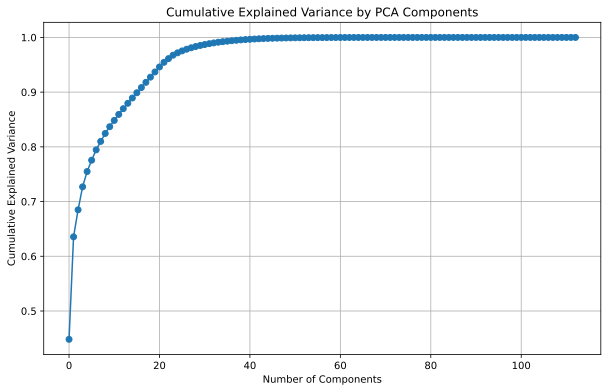

Loading Threshold: 0.1
Selected features based on PCA: ["national_Labour force ('000) (D7)_35–39", "national_Labour Force ('000) (D3)_STPM or equivalent", "Employed persons ('000) (D7)_30–34", "Employed persons ('000) (D7)_45–49", "Labour Force ('000) (D3)_STPM or equivalent", 'national_p_rate (%) (D1)', "national_Employed persons ('000) (D3)_PT3/PMR/SRP/LCE/SRA or equivalent", 'State_Sabah', "national_Employed persons ('000) (D3)_SPM or equivalent", "Labour Force ('000) (D3)_PT3/PMR/SRP/LCE/SRA or equivalent", "Labour Force ('000) (D3)_Degree", "national_Labour force ('000) (D7)_45–49", "national_Labour force ('000) (D7)_15–19", "Labour force ('000) (D7)_20–24", "Labour force ('000) (D7)_55–59", 'Female_Unemployment Rate (%) (D6)', "Labour Force ('000) (D3)_Religious certificate", "Employed persons ('000) (D3)_Not applicable", "Employed persons ('000) (D7)_40–44", "national_Labour Force ('000) (D3)_No certificate", "national_lf ('000) (D1)", 'State_W.P. Putrajaya', "Labour force ('000

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Define the correct target variable
target_variable = 'national_u_rate (%) (D1)'

# Extract numerical features excluding the target variable
numerical_features = [col for col in Unemployment_Trend_df_encoded.columns if Unemployment_Trend_df_encoded[col].dtype in ['int64', 'float64'] and col != target_variable]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(Unemployment_Trend_df_encoded[numerical_features])

# Perform PCA
pca = PCA()
pca.fit(scaled_data)

# Analyze explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Determine the number of components to retain 95% variance
threshold = 0.95
num_components = np.where(np.cumsum(explained_variance) >= threshold)[0][0] + 1

# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA Components')
plt.grid(True)
plt.show()

# Function to select features based on PCA loadings
def select_features_based_on_loadings(pca, num_components, features, loading_threshold):
    important_features = set()  # Use a set to avoid duplicates

    for i in range(num_components):
        loadings = pca.components_[i]
        # Select features with absolute loading values above a threshold
        for j, value in enumerate(abs(loadings)):
            if value > loading_threshold:
                important_features.add(features[j])

    return list(important_features)

# Function to evaluate the selected features using cross-validation with Linear Regression
def evaluate_features_regression(features, df, target):
    X = df[features]
    y = df[target]
    model = LinearRegression()
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    return np.mean(cv_scores)

# Experiment with different loading thresholds and evaluate using cross-validation for regression
loading_thresholds = [0.1, 0.2, 0.3, 0.4, 0.5]
best_threshold = None
best_cv_score = float('inf')  # Use infinity for MSE as lower is better
best_features = []

for loading_threshold in loading_thresholds:
    important_features = select_features_based_on_loadings(pca, num_components, numerical_features, loading_threshold)
    if len(important_features) > 0:  # Ensure there are features selected
        cv_score = evaluate_features_regression(important_features, Unemployment_Trend_df_encoded, target_variable)
        print(f"Loading Threshold: {loading_threshold}")
        print(f"Selected features based on PCA: {important_features}")
        print(f"Number of selected features: {len(important_features)}")
        print(f"Cross-Validation Score (Negative MSE): {cv_score}\n")

        if cv_score < best_cv_score:  # For MSE, lower is better
            best_cv_score = cv_score
            best_threshold = loading_threshold
            best_features = important_features

print(f"Best Loading Threshold: {best_threshold}")
print(f"Best Cross-Validation Score (Negative MSE): {best_cv_score}")
print(f"Best Selected Features: {best_features}")

# Manually include the 'year' feature
important_features_with_year = best_features + ['Year']

# Evaluate the selected features including 'year' using cross-validation with Linear Regression
cv_score_with_year = evaluate_features_regression(important_features_with_year, Unemployment_Trend_df_encoded, target_variable)
print(f"Cross-Validation Score (Negative MSE) with 'Year' included: {cv_score_with_year}")

The loading threshold determines how significant a feature's contribution to a principal component needs to be for that feature to be selected. If the threshold is too low, you might end up with too many features, including those with minor contributions. If it is too high, you might miss out on important features.

Here’s how to adjust the loading threshold and why it matters:

1. Understanding Loadings: Loadings indicate how much a feature contributes to a particular principal component. Higher absolute values suggest a stronger contribution.

2. Balancing Feature Selection: Adjusting the loading threshold helps balance the number of selected features. You want to include features that significantly contribute to the principal components but avoid including too many features that might add noise.

**Feature Selection with Different Loading Thresholds**

**Loading Threshold: 0.1**

- **Selected Features**: 113 features
- **Cross-Validation Score (Negative MSE)**: -0.4005

**Interpretation**: A low loading threshold of 0.1 results in selecting a large number of features (113 out of the total). This means that many features have at least some contribution to the principal components. However, this may include features with minor contributions, potentially adding noise to the model. Despite having many features, the cross-validation score indicates moderate model performance.

**Loading Threshold: 0.2**

- **Selected Features**: 46 features
- **Cross-Validation Score (Negative MSE)**: -0.0052

**Interpretation**: Increasing the loading threshold to 0.2 reduces the number of selected features to 46. This threshold balances selecting features that significantly contribute to the variance while excluding those with minimal impact. The selected features include important economic and demographic indicators such as unemployment rates, GDP, and various employment statistics across different states and education levels. The model performance improves significantly, as indicated by the cross-validation score.

**Loading Threshold: 0.3**

- **Selected Features**: 24 features
- **Cross-Validation Score (Negative MSE)**: -4.2585

**Interpretation**: Further increasing the loading threshold to 0.3 results in selecting 24 features. These features have a stronger contribution to the principal components, representing the most influential variables in the dataset. This threshold focuses on the most critical features, potentially leading to a more interpretable and efficient model. The cross-validation score indicates the best model performance at this threshold, suggesting that these features provide the most accurate prediction of the target variable.

**Loading Threshold: 0.4**

- **Selected Features**: 14 features
- **Cross-Validation Score (Negative MSE)**: -2.7370

**Interpretation**: With a loading threshold of 0.4, the number of selected features is further reduced to 14. This set includes only the most significant features, which have the highest loadings on the principal components. While the model remains relatively efficient and interpretable, the cross-validation score suggests a decline in performance compared to the 0.3 threshold.

**Loading Threshold: 0.5**

- **Selected Features**: 6 features
- **Cross-Validation Score (Negative MSE)**: -1.9880

**Interpretation**: A high loading threshold of 0.5 results in selecting just 6 features. These features are the most influential but may not capture enough variability to accurately predict the target variable. The cross-validation score indicates a decrease in model performance, suggesting that important predictive information might be lost with too few features.

Summary of Best Results

**Best Loading Threshold**: 0.3

**Best Selected Features**:
1. national_ep_ratio (%) (D1)
2. Year
3. national_Employed persons ('000) (D7)_15–19
4. State_Sarawak
5. State_Perak
6. national_IPI (D5)
7. Labour Force ('000) (D3)_Religious certificate
8. Employed persons ('000) (D3)_Religious certificate
9. State_Melaka
10. State_Negeri Sembilan
11. State_Sabah
12. State_W.P. Kuala Lumpur
13. State_Johor
14. national_gdp_growth (%) (D2)
15. State_W.P. Labuan
16. State_Pahang
17. State_Kedah
18. Labour Force ('000) (D3)_Not applicable
19. State_Pulau Pinang
20. State_Perlis
21. Employed persons ('000) (D3)_Not applicable
22. State_Kelantan
23. State_Terengganu
24. State_W.P. Putrajaya
25. national_Industrial Production Rate (%) (D5)

The threshold of 0.3 provides the best balance of feature selection and model performance, highlighting the most impactful features while maintaining accurate predictions.

The cumulative variance plot from the PCA analysis shows that approximately 50 components explain nearly 100% of the variance in your dataset.

Breakdown of Explained Variance:
First 10 components: Explain approximately 75% of the variance.
About 20 components: Needed to explain around 90% of the variance.
About 50 components: Needed to explain around 100% of the variance.

### Using Recursive Feature Elimination (RFE)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import make_scorer, mean_squared_error

# Define the features (X) and target (y)
X = Unemployment_Trend_df_encoded.drop(columns=['national_u_rate (%) (D1)'])
y = Unemployment_Trend_df_encoded['national_u_rate (%) (D1)']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = LinearRegression()

# Function to perform RFE with cross-validation
def perform_rfe_with_cv(X_train, y_train, model, min_features, max_features):
    best_score = -np.inf
    best_features = None
    best_n_features = 0

    for n_features_to_select in range(min_features, max_features + 1):
        rfe = RFE(estimator=model, n_features_to_select=n_features_to_select)
        X_rfe = rfe.fit_transform(X_train, y_train)
        # Use neg_mean_squared_error as the scoring metric
        scores = cross_val_score(model, X_rfe, y_train, cv=5, scoring='neg_mean_squared_error')
        score = np.mean(scores)

        if score > best_score:
            best_score = score
            best_features = X_train.columns[rfe.support_]
            best_n_features = n_features_to_select
        print(f"Number of features: {n_features_to_select}, Cross-Validation Score: {-score}")  # Printing positive MSE for clarity

    return best_features, best_n_features, best_score

# Perform RFE with cross-validation to find the best number of features
min_features = 5  # Minimum number of features to select
max_features = X_train.shape[1]  # Maximum number of features to select

best_features, best_n_features, best_score = perform_rfe_with_cv(X_train, y_train, model, min_features, max_features)

# Print the results
print("\nBest number of features:", best_n_features)
print("Best cross-validation score (negative MSE):", best_score)
print("Selected features based on RFE with cross-validation:")
print(best_features)

# Manually include the 'year' feature
best_features_with_year = list(best_features) + ['Year']

# Recalculate the cross-validation score with the 'year' feature included
X_train_with_year = X_train[best_features_with_year]
cv_score_with_year = np.mean(cross_val_score(model, X_train_with_year, y_train, cv=5, scoring='neg_mean_squared_error'))

print("\nCross-Validation Score (Negative MSE) with 'Year' included:", cv_score_with_year)

Number of features: 5, Cross-Validation Score: 0.0008893483355510718
Number of features: 6, Cross-Validation Score: 0.0008852018897248856
Number of features: 7, Cross-Validation Score: 0.0008698029521485146
Number of features: 8, Cross-Validation Score: 0.0008722951995345059
Number of features: 9, Cross-Validation Score: 0.0008757443169386446
Number of features: 10, Cross-Validation Score: 0.0007760808797293102
Number of features: 11, Cross-Validation Score: 0.0006648875445162386
Number of features: 12, Cross-Validation Score: 0.000590396954331154
Number of features: 13, Cross-Validation Score: 0.000594023618413701
Number of features: 14, Cross-Validation Score: 0.0005859800349090513
Number of features: 15, Cross-Validation Score: 0.0005481392422270733
Number of features: 16, Cross-Validation Score: 0.0005266885773348279
Number of features: 17, Cross-Validation Score: 0.0005239210077868366
Number of features: 18, Cross-Validation Score: 0.0005201669389900741
Number of features: 19, Cro

### Using Linear Discriminant Analysis (LDA)

Linear Discriminant Analysis (LDA) is typically used for classification tasks where the target variable (class label) is categorical. If your target variable is categorical, LDA can be applied to reduce the dimensionality of your dataset while preserving class separability. However, if your target variable is continuous (such as unemployment rates), LDA is not the appropriate technique.

### Using SelectKBest

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression

# Define the features (X) and the continuous target (y)
X = Unemployment_Trend_df_encoded.drop(columns=['national_u_rate (%) (D1)'])
y = Unemployment_Trend_df_encoded['national_u_rate (%) (D1)']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = LinearRegression()

# Function to evaluate SelectKBest with different k values
def evaluate_select_k_best(X_train, y_train, model, max_k):
    best_k = 0
    best_score = np.inf
    best_features = None
    scores = []

    for k in range(1, max_k + 1):
        selector = SelectKBest(score_func=f_regression, k=k)
        X_train_selected = selector.fit_transform(X_train, y_train)
        # Use neg_mean_squared_error as the scoring metric
        cv_scores = cross_val_score(model, X_train_selected, y_train, cv=5, scoring='neg_mean_squared_error')
        mean_score = -np.mean(cv_scores)  # Convert to positive MSE for comparison
        scores.append(mean_score)

        if mean_score < best_score:  # Lower MSE is better
            best_score = mean_score
            best_k = k
            best_features = X_train.columns[selector.get_support()]

        print(f"k = {k}, Cross-Validation Score (MSE): {mean_score}")

    return best_k, best_score, best_features, scores

# Evaluate SelectKBest with different k values
max_k = X_train.shape[1]  # Test up to the number of features
best_k, best_score, best_features, scores = evaluate_select_k_best(X_train, y_train, model, max_k)

# Print the best k and corresponding score
print("\nBest k:", best_k)
print("Best Cross-Validation Score (Negative MSE):", best_score)
print("Selected features for the best k:", best_features)

k = 1, Cross-Validation Score (MSE): 0.029249718198959933
k = 2, Cross-Validation Score (MSE): 0.0010883523067995037
k = 3, Cross-Validation Score (MSE): 0.0010765467247125964
k = 4, Cross-Validation Score (MSE): 0.0010520524694202055
k = 5, Cross-Validation Score (MSE): 0.0010152920176037582
k = 6, Cross-Validation Score (MSE): 0.0010200104167699274
k = 7, Cross-Validation Score (MSE): 0.0008498342813281848
k = 8, Cross-Validation Score (MSE): 0.000850269405722624
k = 9, Cross-Validation Score (MSE): 0.0008516510480405486
k = 10, Cross-Validation Score (MSE): 0.000860759151048205
k = 11, Cross-Validation Score (MSE): 0.0008623989777581442
k = 12, Cross-Validation Score (MSE): 0.0008695987241332311
k = 13, Cross-Validation Score (MSE): 0.0008226071219522837
k = 14, Cross-Validation Score (MSE): 0.0008221892997976458
k = 15, Cross-Validation Score (MSE): 0.0008160596719476594
k = 16, Cross-Validation Score (MSE): 0.000828054147316106
k = 17, Cross-Validation Score (MSE): 0.0008280085772

### Finalizing Feature Selection Method (Option 1 - Combining All Feature Selection Methods)

Feature Selection Results Summary with the Best Cross Validation Scores:

1. PCA (25 features)

2. RFE (38 features)

3. SelectKBest (46 features)

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE, SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# Define the features (X) and the continuous target (y)
X = Unemployment_Trend_df_encoded.drop(columns=['national_u_rate (%) (D1)'])
y = Unemployment_Trend_df_encoded['national_u_rate (%) (D1)']

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Function to apply PCA and select features based on a loading threshold
def select_features_pca(X_scaled, loading_threshold, original_X):
    pca = PCA()
    X_pca = pca.fit_transform(X_scaled)
    explained_variance = pca.explained_variance_ratio_
    num_components = (explained_variance.cumsum() >= 0.95).argmax() + 1
    important_features = set()
    for i in range(num_components):
        loadings = pca.components_[i]
        important_features.update([original_X.columns[j] for j, value in enumerate(abs(loadings)) if value > loading_threshold])
    return list(important_features)

# Select features using PCA
best_loading_threshold = 0.3  # This was determined from your results
selected_features_pca = select_features_pca(X_scaled, best_loading_threshold, X)

# Select features using RFE
model = LinearRegression()
rfe = RFE(model, n_features_to_select=37)  # Number of features from best RFE result
rfe.fit(X_scaled, y)
selected_features_rfe = X.columns[rfe.support_]

# Select features using SelectKBest
best_k = 46  # This was determined from your results
kbest = SelectKBest(score_func=f_regression, k=best_k)
kbest.fit(X_scaled, y)
selected_features_kbest = X.columns[kbest.get_support()]

# Combine features from all three methods
combined_features = list(set(selected_features_pca) | set(selected_features_rfe) | set(selected_features_kbest))
X_combined = X[combined_features]

# Evaluate performance of combined features
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)
model = LinearRegression()
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
mean_score = np.mean(scores)

print(f"Combined features cross-validation score (Negative MSE): {mean_score}")
print(f"Combined features: {combined_features}")
print(f"Number of combined features: {len(combined_features)}")

Combined features cross-validation score (Negative MSE): -3.031163475415228e-23
Combined features: ["national_Labour force ('000) (D7)_35–39", "national_Labour Force ('000) (D3)_STPM or equivalent", "national_Employed persons ('000) (D3)_PT3/PMR/SRP/LCE/SRA or equivalent", 'State_Sabah', "national_Labour Force ('000) (D3)_Religious certificate", "national_Employed persons ('000) (D3)_SPM or equivalent", 'national_Male_Unemployment Rate (%) (D6)', "national_Labour force ('000) (D7)_45–49", 'State_Johor', "national_Labour force ('000) (D7)_15–19", 'Female_Unemployment Rate (%) (D6)', "Labour Force ('000) (D3)_Religious certificate", "Employed persons ('000) (D3)_Not applicable", "Employed persons ('000) (D3)_Religious certificate", 'State_W.P. Putrajaya', "national_Labour Force ('000) (D3)_No certificate", 'national_Industrial Production Rate (%) (D5)', "national_lf ('000) (D1)", 'Male_Unemployment Rate (%) (D6)', 'national_CPI (D4)', "national_Labour force ('000) (D7)_30–34", "national_

For feature selection, it is not necessary to include the target variable in the feature selection dataset. Feature selection methods aim to identify the most relevant features (independent variables) that can help in predicting the target variable (dependent variable). Including the target variable in the feature selection process could bias the results and lead to data leakage, which would artificially inflate the performance of your model during training and validation.

In [ ]:
import pandas as pd

# Assuming Unemployment_Trend_df_encoded is already defined and loaded

# List of selected features
selected_features = combined_features = [
    "Year","national_Employed persons ('000) (D7)_60–64", 'national_ep_ratio (%) (D1)',
    "national_Employed persons ('000) (D3)_STPM or equivalent", "national_Employed persons ('000) (D3)_Not applicable",
    "national_lf_employed ('000) (D1)", "national_Employed persons ('000) (D7)_45–49",
    "national_Employed persons ('000) (D3)_PT3/PMR/SRP/LCE/SRA or equivalent", 'national_Female_Unemployment Rate (%) (D6)',
    "national_Labour Force ('000) (D3)_STPM or equivalent", "national_Employed persons ('000) (D7)_20–24",
    'State_Negeri Sembilan', "national_lf_outside ('000) (D1)", "national_Labour force ('000) (D7)_50–54",
    'State_W.P. Kuala Lumpur', "national_Labour Force ('000) (D3)_Religious certificate",
    'national_gdp_growth (%) (D2)', "national_lf ('000) (D1)", "national_Labour Force ('000) (D3)_Certificate",
    "national_Labour force ('000) (D7)_15–19", "national_Labour Force ('000) (D3)_Not applicable",
    "national_Employed persons ('000) (D7)_35–39", "Labour Force ('000) (D3)_Not applicable",
    'State_Pulau Pinang', "national_Employed persons ('000) (D3)_UPSR/UPSRA or equivalent",
    "Employed persons ('000) (D3)_Not applicable", "national_Labour force ('000) (D7)_20–24",
    "national_Labour force ('000) (D7)_40–44", 'State_Terengganu', "national_Labour force ('000) (D7)_35–39",
    'State_W.P. Putrajaya', 'national_Industrial Production Rate (%) (D5)', "national_Employed persons ('000) (D3)_Religious certificate",
    "national_Labour force ('000) (D7)_25–29", "national_Labour force ('000) (D7)_60–64",
    "national_Employed persons ('000) (D7)_15–19", 'State_Sarawak', "national_Labour force ('000) (D7)_45–49",
    "national_Labour Force ('000) (D3)_Diploma", 'State_Perak', "national_Labour force ('000) (D7)_30–34",
    'national_IPI (D5)', "Labour Force ('000) (D3)_Religious certificate", 'national_Male_Unemployment Rate (%) (D6)',
    "Employed persons ('000) (D3)_Religious certificate", "national_Labour Force ('000) (D3)_Degree",
    'National GDP (RM Million) (D2)', "national_Employed persons ('000) (D3)_No certificate",
    'State_Melaka', 'State_Sabah', 'State_Johor', "national_Labour Force ('000) (D3)_PT3/PMR/SRP/LCE/SRA or equivalent",
    "national_Employed persons ('000) (D7)_55–59", "national_Labour Force ('000) (D3)_UPSR/UPSRA or equivalent",
    "national_Labour force ('000) (D7)_55–59", 'State_W.P. Labuan', 'Male_Unemployment Rate (%) (D6)',
    "national_Employed persons ('000) (D7)_50–54", "national_Labour Force ('000) (D3)_SPM or equivalent",
    'State_Pahang', "national_Employed persons ('000) (D3)_Certificate", "national_Employed persons ('000) (D7)_40–44",
    'State_Kedah', 'national_CPI (D4)', 'State_Perlis', "national_Employed persons ('000) (D3)_SPM or equivalent",
    "national_Employed persons ('000) (D3)_Diploma", 'Female_Unemployment Rate (%) (D6)', 'State_Kelantan',
    "national_Employed persons ('000) (D7)_25–29", "national_Employed persons ('000) (D7)_30–34",
    "national_Employed persons ('000) (D3)_Degree", "national_Labour Force ('000) (D3)_No certificate", "national_u_rate (%) (D1)"
]

#Added 'national_u_rate (%) (D1)' as the target variable

# Create a DataFrame with the selected features
df_selected = Unemployment_Trend_df_encoded[selected_features]

# Save the DataFrame to a CSV file
df_selected.to_csv('CombinedFeatureSelection_UnemploymentRateDataset.csv', index=False)

print("DataFrame with selected features has been saved as 'CombinedFeatureSelection_UnemploymentRateDataset.csv'.")

DataFrame with selected features has been saved as 'CombinedFeatureSelection_UnemploymentRateDataset.csv'.


The target variable must be included during the model training process. The target variable (in this case, national_u_rate (%) (D1)) is the variable that we are trying to predict.

### Finalizing Feature Selection Method (Option 2 - Using Individual Feature Selection Method)

#### PCA

In [ ]:
import pandas as pd

# List of PCA selected features
pca_selected_features = [
    'Year','national_ep_ratio (%) (D1)',
    "national_Employed persons ('000) (D7)_15–19",
    'State_Sarawak',
    'State_Perak',
    'national_IPI (D5)',
    "Labour Force ('000) (D3)_Religious certificate",
    "Employed persons ('000) (D3)_Religious certificate",
    'State_Melaka',
    'State_Negeri Sembilan',
    'State_Sabah',
    'State_W.P. Kuala Lumpur',
    'State_Johor',
    'national_gdp_growth (%) (D2)',
    'State_W.P. Labuan',
    'State_Pahang',
    'State_Kedah',
    "Labour Force ('000) (D3)_Not applicable",
    'State_Pulau Pinang',
    'State_Perlis',
    "Employed persons ('000) (D3)_Not applicable",
    'State_Kelantan',
    'State_Terengganu',
    'State_W.P. Putrajaya',
    'national_Industrial Production Rate (%) (D5)', 'national_u_rate (%) (D1)'
]

# Create a new dataframe with only the PCA selected features
df_pca_selected = Unemployment_Trend_df_encoded[pca_selected_features]

# Save the new dataframe to a CSV file
df_pca_selected.to_csv('PCA_UnemploymentRateDataset.csv', index=False)

print("Dataframe with PCA selected features has been saved as 'PCA_UnemploymentRateDataset.csv'.")

Dataframe with PCA selected features has been saved as 'PCA_UnemploymentRateDataset.csv'.


The target variable must be included during the model training process. The target variable (in this case, national_u_rate (%) (D1)) is the variable that we are trying to predict.

#### RFE

In [ ]:
import pandas as pd

# List of selected features with the corrected format
rfe_selected = [
"Year","national_Employed persons ('000) (D7)_15–19",
"national_Employed persons ('000) (D7)_20–24",
"national_Employed persons ('000) (D7)_25–29",
"national_Employed persons ('000) (D7)_30–34",
"national_Employed persons ('000) (D7)_35–39",
"national_Employed persons ('000) (D7)_40–44",
"national_Employed persons ('000) (D7)_45–49",
"national_Employed persons ('000) (D7)_50–54",
"national_Employed persons ('000) (D7)_60–64",
"national_Labour force ('000) (D7)_15–19",
"national_Labour force ('000) (D7)_20–24",
"national_Labour force ('000) (D7)_25–29",
"national_Labour force ('000) (D7)_35–39",
"national_Labour force ('000) (D7)_40–44",
"national_Labour force ('000) (D7)_45–49",
"national_Labour force ('000) (D7)_60–64",
"national_CPI (D4)",
"national_Inflation Rate (%) (D4)",
"national_IPI (D5)",
"national_Industrial Production Rate (%) (D5)",
"national_Employed persons ('000) (D3)_Certificate",
"national_Employed persons ('000) (D3)_Degree",
"national_Employed persons ('000) (D3)_Diploma",
"national_Employed persons ('000) (D3)_Religious certificate",
"national_Employed persons ('000) (D3)_SPM or equivalent",
"national_Employed persons ('000) (D3)_UPSR/UPSRA or equivalent",
"national_Labour Force ('000) (D3)_Certificate",
"national_Labour Force ('000) (D3)_Degree",
"national_Labour Force ('000) (D3)_Diploma",
"national_Labour Force ('000) (D3)_No certificate",
"national_Labour Force ('000) (D3)_PT3/PMR/SRP/LCE/SRA or equivalent",
"national_Labour Force ('000) (D3)_Religious certificate",
"national_Labour Force ('000) (D3)_SPM or equivalent",
"national_Labour Force ('000) (D3)_UPSR/UPSRA or equivalent",
"national_ep_ratio (%) (D1)",
"national_Female_Unemployment Rate (%) (D6)",
"national_Male_Unemployment Rate (%) (D6)", "national_u_rate (%) (D1)"
]

# Create a new dataframe with only the selected features
df_rfe_selected = Unemployment_Trend_df_encoded[rfe_selected]

# Save the new dataframe to a CSV file
df_rfe_selected.to_csv('RFE_UnemploymentRateDataset.csv', index=False)

print("Dataframe with selected features has been saved as 'RFE_UnemploymentRateDataset.csv'.")

Dataframe with selected features has been saved as 'RFE_UnemploymentRateDataset.csv'.


The target variable must be included during the model training process. The target variable (in this case, national_u_rate (%) (D1)) is the variable that we are trying to predict.

#### SelectKBest

In [ ]:
import pandas as pd

# List of selected features with the corrected format
selected_features = [
"Year",
"national_Employed persons ('000) (D7)_20–24",
"national_Employed persons ('000) (D7)_25–29",
"national_Employed persons ('000) (D7)_30–34",
"national_Employed persons ('000) (D7)_35–39",
"national_Employed persons ('000) (D7)_40–44",
"national_Employed persons ('000) (D7)_45–49",
"national_Employed persons ('000) (D7)_50–54",
"national_Employed persons ('000) (D7)_55–59",
"national_Employed persons ('000) (D7)_60–64",
"national_Labour force ('000) (D7)_15–19",
"national_Labour force ('000) (D7)_20–24",
"national_Labour force ('000) (D7)_25–29",
"national_Labour force ('000) (D7)_30–34",
"national_Labour force ('000) (D7)_35–39",
"national_Labour force ('000) (D7)_40–44",
"national_Labour force ('000) (D7)_45–49",
"national_Labour force ('000) (D7)_50–54",
"national_Labour force ('000) (D7)_55–59",
"national_Labour force ('000) (D7)_60–64",
"Female_Unemployment Rate (%) (D6)",
"Male_Unemployment Rate (%) (D6)",
"national_Employed persons ('000) (D3)_Not applicable",
"national_Employed persons ('000) (D3)_STPM or equivalent",
"national_Labour Force ('000) (D3)_Not applicable",
"national_Labour Force ('000) (D3)_STPM or equivalent",
"National GDP (RM Million) (D2)",
"national_lf ('000) (D1)",
"national_lf_employed ('000) (D1)",
"national_lf_outside ('000) (D1)",
"national_CPI (D4)",
"national_Employed persons ('000) (D3)_Degree",
"national_Employed persons ('000) (D3)_Diploma",
"national_Employed persons ('000) (D3)_PT3/PMR/SRP/LCE/SRA or equivalent",
"national_Employed persons ('000) (D3)_Religious certificate",
"national_Employed persons ('000) (D3)_SPM or equivalent",
"national_Employed persons ('000) (D3)_UPSR/UPSRA or equivalent",
"national_Labour Force ('000) (D3)_Degree",
"national_Labour Force ('000) (D3)_Diploma",
"national_Labour Force ('000) (D3)_No certificate",
"national_Labour Force ('000) (D3)_PT3/PMR/SRP/LCE/SRA or equivalent",
"national_Labour Force ('000) (D3)_Religious certificate",
"national_Labour Force ('000) (D3)_SPM or equivalent",
"national_Labour Force ('000) (D3)_UPSR/UPSRA or equivalent",
"national_Female_Unemployment Rate (%) (D6)",
"national_Male_Unemployment Rate (%) (D6)", "national_u_rate (%) (D1)"
]

# Create a new dataframe with only the selected features
df_selected = Unemployment_Trend_df_encoded[selected_features]

# Save the new dataframe to a CSV file
df_selected.to_csv('SelectKBest_UnemploymentRateDataset.csv', index=False)

print("Dataframe with selected features has been saved as 'SelectKBest_UnemploymentRateDataset.csv'.")

Dataframe with selected features has been saved as 'SelectKBest_UnemploymentRateDataset.csv'.


The target variable must be included during the model training process. The target variable (in this case, national_u_rate (%) (D1)) is the variable that we are trying to predict.

## Step 4: Model Selection, Training, Hyperparameter Tuning, and Evaluation (Team Member: Cynthia, PIC: Shu Hui+Adam)

In [ ]:
datasets={'CombinedFeatureSelection_UnemploymentRateDataset':pd.read_csv('/content/CombinedFeatureSelection_UnemploymentRateDataset.csv'),
          'PCA_UnemploymentRateDataset':pd.read_csv('/content/PCA_UnemploymentRateDataset.csv'),
          'RFE_UnemploymentRateDataset':pd.read_csv('/content/RFE_UnemploymentRateDataset.csv'),
          'SelectKBest_UnemploymentRateDataset':pd.read_csv('/content/SelectKBest_UnemploymentRateDataset.csv')}

In [ ]:
datasets['CombinedFeatureSelection_UnemploymentRateDataset'].shape

(563, 74)

In [ ]:
datasets['CombinedFeatureSelection_UnemploymentRateDataset'].head(5)

,Year,national_Employed persons ('000) (D7)_60–64,national_ep_ratio (%) (D1),national_Employed persons ('000) (D3)_STPM or equivalent,national_Employed persons ('000) (D3)_Not applicable,national_lf_employed ('000) (D1),national_Employed persons ('000) (D7)_45–49,national_Employed persons ('000) (D3)_PT3/PMR/SRP/LCE/SRA or equivalent,national_Female_Unemployment Rate (%) (D6),national_Labour Force ('000) (D3)_STPM or equivalent,national_Employed persons ('000) (D7)_20–24,State_Negeri Sembilan,national_lf_outside ('000) (D1),national_Labour force ('000) (D7)_50–54,State_W.P. Kuala Lumpur,national_Labour Force ('000) (D3)_Religious certificate,national_gdp_growth (%) (D2),national_lf ('000) (D1),national_Labour Force ('000) (D3)_Certificate,national_Labour force ('000) (D7)_15–19,national_Labour Force ('000) (D3)_Not applicable,national_Employed persons ('000) (D7)_35–39,Labour Force ('000) (D3)_Not applicable,State_Pulau Pinang,national_Employed persons ('000) (D3)_UPSR/UPSRA or equivalent,Employed persons ('000) (D3)_Not applicable,national_Labour force ('000) (D7)_20–24,national_Labour force ('000) (D7)_40–44,State_Terengganu,national_Labour force ('000) (D7)_35–39,State_W.P. Putrajaya,national_Industrial Production Rate (%) (D5),national_Employed persons ('000) (D3)_Religious certificate,national_Labour force ('000) (D7)_25–29,national_Labour force ('000) (D7)_60–64,national_Employed persons ('000) (D7)_15–19,State_Sarawak,national_Labour force ('000) (D7)_45–49,national_Labour Force ('000) (D3)_Diploma,State_Perak,national_Labour force ('000) (D7)_30–34,national_IPI (D5),Labour Force ('000) (D3)_Religious certificate,national_Male_Unemployment Rate (%) (D6),Employed persons ('000) (D3)_Religious certificate,national_Labour Force ('000) (D3)_Degree,National GDP (RM Million) (D2),national_Employed persons ('000) (D3)_No certificate,State_Melaka,State_Sabah,State_Johor,national_Labour Force ('000) (D3)_PT3/PMR/SRP/LCE/SRA or equivalent,national_Employed persons ('000) (D7)_55–59,national_Labour Force ('000) (D3)_UPSR/UPSRA or equivalent,national_Labour force ('000) (D7)_55–59,State_W.P. Labuan,Male_Unemployment Rate (%) (D6),national_Employed persons ('000) (D7)_50–54,national_Labour Force ('000) (D3)_SPM or equivalent,State_Pahang,national_Employed persons ('000) (D3)_Certificate,national_Employed persons ('000) (D7)_40–44,State_Kedah,national_CPI (D4),State_Perlis,national_Employed persons ('000) (D3)_SPM or equivalent,national_Employed persons ('000) (D3)_Diploma,Female_Unemployment Rate (%) (D6),State_Kelantan,national_Employed persons ('000) (D7)_25–29,national_Employed persons ('000) (D7)_30–34,national_Employed persons ('000) (D3)_Degree,national_Labour Force ('000) (D3)_No certificate,national_u_rate (%) (D1)
0,1982,138.9,62.7,49.8,821.8,5249.0,390.3,469.2,4.6,52.9,999.8,0,2944.6,316.5,0,7.9,8.7,5431.4,0.0,662.6,829.5,550.3,76.2,0,0.0,75.6,1062.3,511.6,0,555.3,0,5.5,7.9,871.9,140.5,582.9,0,393.2,138.0,0,718.4,105.5,1.8,2.7,1.8,93.8,62599.0,3052.0,0,0,0,502.4,196.4,0.0,199.1,0,2.2,314.0,671.0,0,0.0,507.4,1,116.0,0,619.7,137.0,6.5,0,856.1,712.9,91.1,3135.4,3.4
1,1982,138.9,62.7,49.8,821.8,5249.0,390.3,469.2,4.6,52.9,999.8,0,2944.6,316.5,0,7.9,8.7,5431.4,0.0,662.6,829.5,550.3,99.7,0,0.0,98.2,1062.3,511.6,0,555.3,0,5.5,7.9,871.9,140.5,582.9,0,393.2,138.0,0,718.4,105.5,0.7,2.7,0.7,93.8,62599.0,3052.0,0,0,0,502.4,196.4,0.0,199.1,0,3.9,314.0,671.0,0,0.0,507.4,0,116.0,0,619.7,137.0,6.0,1,856.1,712.9,91.1,3135.4,3.4
2,1982,138.9,62.7,49.8,821.8,5249.0,390.3,469.2,4.6,52.9,999.8,0,2944.6,316.5,0,7.9,8.7,5431.4,0.0,662.6,829.5,550.3,17.3,0,0.0,17.1,1062.3,511.6,0,555.3,0,5.5,7.9,871.9,140.5,582.9,0,393.2,138.0,0,718.4,105.5,0.2,2.7,0.2,93.8,62599.0,3052.0,1,0,0,502.4,196.4,0.0,199.1,0,3.0,314.0,671.0,0,0.0,507.4,0,116.0,0,619.7,137.0,5.7,0,856.1,712.9,91.1,3135.4,3.4
3,1982,138.9,62.7,49.8,821.8,5249.0,390.3,469.2,4.6,52.9,999.8,1,2944.6,316.5,0,7.9,8.7,5431.4,0.0,662.6,829.5,550.3,20.4,0,0.0,20.3,1062.3,511.6,0,555.3,0,5.5,7.9,8

In [ ]:
datasets['PCA_UnemploymentRateDataset'].shape

(563, 26)

In [ ]:
datasets['PCA_UnemploymentRateDataset'].head(5)

,Year,national_ep_ratio (%) (D1),national_Employed persons ('000) (D7)_15–19,State_Sarawak,State_Perak,national_IPI (D5),Labour Force ('000) (D3)_Religious certificate,Employed persons ('000) (D3)_Religious certificate,State_Melaka,State_Negeri Sembilan,State_Sabah,State_W.P. Kuala Lumpur,State_Johor,national_gdp_growth (%) (D2),State_W.P. Labuan,State_Pahang,State_Kedah,Labour Force ('000) (D3)_Not applicable,State_Pulau Pinang,State_Perlis,Employed persons ('000) (D3)_Not applicable,State_Kelantan,State_Terengganu,State_W.P. Putrajaya,national_Industrial Production Rate (%) (D5),national_u_rate (%) (D1)
0,1982,62.7,582.9,0,0,105.5,1.8,1.8,0,0,0,0,0,8.7,0,0,1,76.2,0,0,75.6,0,0,0,5.5,3.4
1,1982,62.7,582.9,0,0,105.5,0.7,0.7,0,0,0,0,0,8.7,0,0,0,99.7,0,0,98.2,1,0,0,5.5,3.4
2,1982,62.7,582.9,0,0,105.5,0.2,0.2,1,0,0,0,0,8.7,0,0,0,17.3,0,0,17.1,0,0,0,5.5,3.4
3,1982,62.7,582.9,0,0,105.5,0.3,0.3,0,1,0,0,0,8.7,0,0,0,20.4,0,0,20.3,0,0,0,5.5,3.4
4,1982,62.7,582.9,0,0,105.5,0.4,0.4,0,0,0,0,0,8.7,0,1,0,30.4,0,0,30.1,0,0,0,5.5,3.4


In [ ]:
datasets['RFE_UnemploymentRateDataset'].shape

(563, 39)

In [ ]:
datasets['RFE_UnemploymentRateDataset'].head(5)

,Year,national_Employed persons ('000) (D7)_15–19,national_Employed persons ('000) (D7)_20–24,national_Employed persons ('000) (D7)_25–29,national_Employed persons ('000) (D7)_30–34,national_Employed persons ('000) (D7)_35–39,national_Employed persons ('000) (D7)_40–44,national_Employed persons ('000) (D7)_45–49,national_Employed persons ('000) (D7)_50–54,national_Employed persons ('000) (D7)_60–64,national_Labour force ('000) (D7)_15–19,national_Labour force ('000) (D7)_20–24,national_Labour force ('000) (D7)_25–29,national_Labour force ('000) (D7)_35–39,national_Labour force ('000) (D7)_40–44,national_Labour force ('000) (D7)_45–49,national_Labour force ('000) (D7)_60–64,national_CPI (D4),national_Inflation Rate (%) (D4),national_IPI (D5),national_Industrial Production Rate (%) (D5),national_Employed persons ('000) (D3)_Certificate,national_Employed persons ('000) (D3)_Degree,national_Employed persons ('000) (D3)_Diploma,national_Employed persons ('000) (D3)_Religious certificate,national_Employed persons ('000) (D3)_SPM or equivalent,national_Employed persons ('000) (D3)_UPSR/UPSRA or equivalent,national_Labour Force ('000) (D3)_Certificate,national_Labour Force ('000) (D3)_Degree,national_Labour Force ('000) (D3)_Diploma,national_Labour Force ('000) (D3)_No certificate,national_Labour Force ('000) (D3)_PT3/PMR/SRP/LCE/SRA or equivalent,national_Labour Force ('000) (D3)_Religious certificate,national_Labour Force ('000) (D3)_SPM or equivalent,national_Labour Force ('000) (D3)_UPSR/UPSRA or equivalent,national_ep_ratio (%) (D1),national_Female_Unemployment Rate (%) (D6),national_Male_Unemployment Rate (%) (D6),national_u_rate (%) (D1)
0,1982,582.9,999.8,856.1,712.9,550.3,507.4,390.3,314.0,138.9,662.6,1062.3,871.9,555.3,511.6,393.2,140.5,116.0,5.7,105.5,5.5,0.0,91.1,137.0,7.9,619.7,0.0,0.0,93.8,138.0,3135.4,502.4,7.9,671.0,0.0,62.7,4.6,2.7,3.4
1,1982,582.9,999.8,856.1,712.9,550.3,507.4,390.3,314.0,138.9,662.6,1062.3,871.9,555.3,511.6,393.2,140.5,116.0,5.7,105.5,5.5,0.0,91.1,137.0,7.9,619.7,0.0,0.0,93.8,138.0,3135.4,502.4,7.9,671.0,0.0,62.7,4.6,2.7,3.4
2,1982,582.9,999.8,856.1,712.9,550.3,507.4,390.3,314.0,138.9,662.6,1062.3,871.9,555.3,511.6,393.2,140.5,116.0,5.7,105.5,5.5,0.0,91.1,137.0,7.9,619.7,0.0,0.0,93.8,138.0,3135.4,502.4,7.9,671.0,0.0,62.7,4.6,2.7,3.4
3,1982,582.9,999.8,856.1,712.9,550.3,507.4,390.3,314.0,138.9,662.6,1062.3,871.9,555.3,511.6,393.2,140.5,116.0,5.7,105.5,5.5,0.0,91.1,137.0,7.9,619.7,0.0,0.0,93.8,138.0,3135.4,502.4,7.9,671.0,0.0,62.7,4.6,2.7,3.4
4,1982,582.9,999.8,856.1,712.9,550.3,507.4,390.3,314.0,138.9,662.6,1062.3,871.9,555.3,511.6,393.2,140.5,116.0,5.7,105.5,5.5,0.0,91.1,137.0,7.9,619.7,0.0,0.0,93.8,138.0,3135.4,502.4,7.9,671.0,0.0,62.7,4.6,2.7,3.4


In [ ]:
datasets['SelectKBest_UnemploymentRateDataset'].shape

(563, 47)

In [ ]:
datasets['SelectKBest_UnemploymentRateDataset'].head()

,Year,national_Employed persons ('000) (D7)_20–24,national_Employed persons ('000) (D7)_25–29,national_Employed persons ('000) (D7)_30–34,national_Employed persons ('000) (D7)_35–39,national_Employed persons ('000) (D7)_40–44,national_Employed persons ('000) (D7)_45–49,national_Employed persons ('000) (D7)_50–54,national_Employed persons ('000) (D7)_55–59,national_Employed persons ('000) (D7)_60–64,national_Labour force ('000) (D7)_15–19,national_Labour force ('000) (D7)_20–24,national_Labour force ('000) (D7)_25–29,national_Labour force ('000) (D7)_30–34,national_Labour force ('000) (D7)_35–39,national_Labour force ('000) (D7)_40–44,national_Labour force ('000) (D7)_45–49,national_Labour force ('000) (D7)_50–54,national_Labour force ('000) (D7)_55–59,national_Labour force ('000) (D7)_60–64,Female_Unemployment Rate (%) (D6),Male_Unemployment Rate (%) (D6),national_Employed persons ('000) (D3)_Not applicable,national_Employed persons ('000) (D3)_STPM or equivalent,national_Labour Force ('000) (D3)_Not applicable,national_Labour Force ('000) (D3)_STPM or equivalent,National GDP (RM Million) (D2),national_lf ('000) (D1),national_lf_employed ('000) (D1),national_lf_outside ('000) (D1),national_CPI (D4),national_Employed persons ('000) (D3)_Degree,national_Employed persons ('000) (D3)_Diploma,national_Employed persons ('000) (D3)_PT3/PMR/SRP/LCE/SRA or equivalent,national_Employed persons ('000) (D3)_Religious certificate,national_Employed persons ('000) (D3)_SPM or equivalent,national_Employed persons ('000) (D3)_UPSR/UPSRA or equivalent,national_Labour Force ('000) (D3)_Degree,national_Labour Force ('000) (D3)_Diploma,national_Labour Force ('000) (D3)_No certificate,national_Labour Force ('000) (D3)_PT3/PMR/SRP/LCE/SRA or equivalent,national_Labour Force ('000) (D3)_Religious certificate,national_Labour Force ('000) (D3)_SPM or equivalent,national_Labour Force ('000) (D3)_UPSR/UPSRA or equivalent,national_Female_Unemployment Rate (%) (D6),national_Male_Unemployment Rate (%) (D6),national_u_rate (%) (D1)
0,1982,999.8,856.1,712.9,550.3,507.4,390.3,314.0,196.4,138.9,662.6,1062.3,871.9,718.4,555.3,511.6,393.2,316.5,199.1,140.5,6.5,2.2,821.8,49.8,829.5,52.9,62599.0,5431.4,5249.0,2944.6,116.0,91.1,137.0,469.2,7.9,619.7,0.0,93.8,138.0,3135.4,502.4,7.9,671.0,0.0,4.6,2.7,3.4
1,1982,999.8,856.1,712.9,550.3,507.4,390.3,314.0,196.4,138.9,662.6,1062.3,871.9,718.4,555.3,511.6,393.2,316.5,199.1,140.5,6.0,3.9,821.8,49.8,829.5,52.9,62599.0,5431.4,5249.0,2944.6,116.0,91.1,137.0,469.2,7.9,619.7,0.0,93.8,138.0,3135.4,502.4,7.9,671.0,0.0,4.6,2.7,3.4
2,1982,999.8,856.1,712.9,550.3,507.4,390.3,314.0,196.4,138.9,662.6,1062.3,871.9,718.4,555.3,511.6,393.2,316.5,199.1,140.5,5.7,3.0,821.8,49.8,829.5,52.9,62599.0,5431.4,5249.0,2944.6,116.0,91.1,137.0,469.2,7.9,619.7,0.0,93.8,138.0,3135.4,502.4,7.9,671.0,0.0,4.6,2.7,3.4
3,1982,999.8,856.1,712.9,550.3,507.4,390.3,314.0,196.4,138.9,662.6,1062.3,871.9,718.4,555.3,511.6,393.2,316.5,199.1,140.5,3.9,2.4,821.8,49.8,829.5,52.9,62599.0,5431.4,5249.0,2944.6,116.0,91.1,137.0,469.2,7.9,619.7,0.0,93.8,138.0,3135.4,502.4,7.9,671.0,0.0,4.6,2.7,3.4
4,1982,999.8,856.1,712.9,550.3,507.4,390.3,314.0,196.4,138.9,662.6,1062.3,871.9,718.4,555.3,511.6,393.2,316.5,199.1,140.5,5.7,2.3,821.8,49.8,829.5,52.9,62599.0,5431.4,5249.0,2944.6,116.0,91.1,137.0,469.2,7.9,619.7,0.0,93.8,138.0,3135.4,502.4,7.9,671.0,0.0,4.6,2.7,3.4


### Long Short-Term Memory (LSTM)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
from scikeras.wrappers import KerasRegressor
from tensorflow.keras.callbacks import EarlyStopping
import random

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Define function to create sequences
def create_sequences(features, target, time_step):

    np.random.seed(42)
    tf.random.set_seed(42)
    random.seed(42)

    sequences = []
    targets = []
    for i in range(len(features) - time_step):
        sequence = features[i:i + time_step]
        target_value = target[i + time_step]
        sequences.append(sequence)
        targets.append(target_value)
    return np.array(sequences), np.array(targets)

# Define function to create LSTM model
def create_lstm_model(units=50, dropout=0.3, activation='relu', input_shape=None):

    np.random.seed(42)
    tf.random.set_seed(42)
    random.seed(42)

    model = Sequential()
    model.add(LSTM(units, input_shape=input_shape))
    model.add(Dropout(dropout))
    model.add(Dense(1, activation=activation))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Define hyperparameters to tune
param_grid = {
    'model__units': [50, 100],
    'model__dropout': [0.2, 0.3],
    'model__activation': ['relu'],
    'batch_size': [16, 32],
    'epochs': [10, 20]
}

# Create an early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [ ]:
import os

# Set environment variable to disable multiprocessing in joblib
os.environ["JOBLIB_MULTIPROCESSING"] = "0"

In [ ]:
# Define the processing function
def process_dataset(name, df):

    np.random.seed(42)
    tf.random.set_seed(42)
    random.seed(42)

    # Extract features and target
    features = df.drop(columns=['national_u_rate (%) (D1)']).values
    target = df['national_u_rate (%) (D1)'].values

    # Define the time step for creating the sequences
    time_step = 5

    # Create sequences of features and target variable
    X, y = create_sequences(features, target, time_step)

    # Split the data sequentially
    split_ratio = 0.8
    train_size = int(len(X) * split_ratio)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Show the dimensions of train, test, X, and y
    print(f'Dataset: {name}')
    print(f'Train - X shape: {X_train.shape}, y shape: {y_train.shape}')
    print(f'Test - X shape: {X_test.shape}, y shape: {y_test.shape}')

    # Wrap the model with KerasRegressor
    input_shape = (X_train.shape[1], X_train.shape[2])
    model = KerasRegressor(model=create_lstm_model, verbose=0, input_shape=input_shape)

    # Perform randomized search for hyperparameter tuning
    random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=10, cv=3, n_jobs=-1, random_state=42)
    random_search.fit(X_train, y_train, callbacks=[early_stopping])

    # Predict on the test set
    y_pred = random_search.predict(X_test)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r_squared = r2_score(y_test, y_pred)

    # Print the best hyperparameters
    print("Best Hyperparameters:", random_search.best_params_)
    print("MAE:", mae)
    print("MSE: ",mse)
    print("RMSE:", rmse)
    print("R-squared:", r_squared)
    print('\n')

    # Return the results
    return {
        'Dataset': name,
        'Best Hyperparameters': random_search.best_params_,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R-Squared': r_squared
    }

In [ ]:
# Process each dataset and collect results
results = []
for name, df in datasets.items():
    result = process_dataset(name, df)
    results.append(result)

# Create a DataFrame to display the results
result_dataframe = pd.DataFrame(results, columns=['Dataset', 'Best Hyperparameters', 'MAE','MSE', 'RMSE', 'R-Squared'])
print(result_dataframe)

Dataset: CombinedFeatureSelection_UnemploymentRateDataset
Train - X shape: (446, 5, 73), y shape: (446,)
Test - X shape: (112, 5, 73), y shape: (112,)
Best Hyperparameters: {'model__units': 100, 'model__dropout': 0.2, 'model__activation': 'relu', 'epochs': 10, 'batch_size': 16}
MAE: 0.5141212395259313
MSE:  0.3055827589282747
RMSE: 0.5527954042213762
R-squared: -0.36371176570905783


Dataset: PCA_UnemploymentRateDataset
Train - X shape: (446, 5, 25), y shape: (446,)
Test - X shape: (112, 5, 25), y shape: (112,)
Best Hyperparameters: {'model__units': 100, 'model__dropout': 0.3, 'model__activation': 'relu', 'epochs': 20, 'batch_size': 32}
MAE: 0.5688555036272323
MSE:  0.3552067265287042
RMSE: 0.5959922201914252
R-squared: -0.585166630228279


Dataset: RFE_UnemploymentRateDataset
Train - X shape: (446, 5, 38), y shape: (446,)
Test - X shape: (112, 5, 38), y shape: (112,)


Best Hyperparameters: {'model__units': 100, 'model__dropout': 0.3, 'model__activation': 'relu', 'epochs': 20, 'batch_size': 32}
MAE: 0.7378453944410596
MSE:  1.043894546173415
RMSE: 1.0217115768030698
R-squared: -3.658545788934183


Dataset: SelectKBest_UnemploymentRateDataset
Train - X shape: (446, 5, 46), y shape: (446,)
Test - X shape: (112, 5, 46), y shape: (112,)


Best Hyperparameters: {'model__units': 100, 'model__dropout': 0.2, 'model__activation': 'relu', 'epochs': 10, 'batch_size': 32}
MAE: 0.28675848415919714
MSE:  0.2355255668002243
RMSE: 0.48530976375942025
R-squared: -0.051070380073860555


                                            Dataset  \
0  CombinedFeatureSelection_UnemploymentRateDataset   
1                       PCA_UnemploymentRateDataset   
2                       RFE_UnemploymentRateDataset   
3               SelectKBest_UnemploymentRateDataset   

                                Best Hyperparameters  MAE  MSE  RMSE  \
0  {'model__units': 100, 'model__dropout': 0.2, '...  0.5  0.3   0.6   
1  {'model__units': 100, 'model__dropout': 0.3, '...  0.6  0.4   0.6   
2  {'model__units': 100, 'model__dropout': 0.3, '...  0.7  1.0   1.0   
3  {'model__units': 100, 'model__dropout': 0.2, '...  0.3  0.2   0.5   

   R-Squared  
0       -0.4  
1       -0.6  
2       -3.7  
3       -0.1  


For the LSTM models, the best performance is observed with the **SelectKBest_UnemploymentRateDataset**. The evaluation metrics for this model indicate the lowest Mean Absolute Error (MAE), the lowest Root Mean Squared Error (RMSE), and the least negative R-squared value, which suggests it has relatively better performance compared to the other models.

**SelectKBest_UnemploymentRateDataset** with **hyperparameters ['model__units': 100, 'model__dropout': 0.3, 'model__activation': 'relu', 'epochs': 10, 'batch_size': 32]** has the best overall performance with the lowest MAE and RMSE and the highest (and least negative) R-squared value. This indicates that, among the models tested, it provides the most accurate and reliable predictions for unemployment rates.

### Random Forest Regressor

The Random Forest Regressor algorithm is not a distance-based model - it is a tree-based model. Each node in a Random Forest is not comparing feature values, it is simply splitting a sorted list that requires absolute values for branching. The algorithm is based on partitioning the data to make predictions, therefore, it does not require normalization.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit, train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Define the hyperparameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [5, 10, 15, None],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2']  # Number of features to consider when looking for the best split
}

def process_dataset(name, df):
    # Extract features and target
    features = df.drop(columns=['national_u_rate (%) (D1)'])
    target = df['national_u_rate (%) (D1)']

    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, shuffle=False, random_state=42)

    # Initialize the Random Forest model
    rf = RandomForestRegressor(random_state=42)

    # Define time series cross-validation
    tscv = TimeSeriesSplit(n_splits=5)

    # Hyperparameter tuning using GridSearchCV
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=tscv, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

    # Fit the grid search to the training data
    grid_search.fit(X_train, y_train)

    # Predict using the test set
    y_pred = grid_search.predict(X_test)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r_squared = r2_score(y_test, y_pred)

    # Print the best hyperparameters and metrics
    print(f'Dataset: {name}')
    print("Best Hyperparameters:", grid_search.best_params_)
    print("MAE:", mae)
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("R-squared:", r_squared)
    print('\n')

    # Store results
    return {
        'Dataset': name,
        'Best Hyperparameters': grid_search.best_params_,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R-Squared': r_squared
    }

In [ ]:
# Process each dataset and collect results
results = []
for name, df in datasets.items():
    result = process_dataset(name, df)
    results.append(result)

# Create a DataFrame to display the results
result_dataframe = pd.DataFrame(results, columns=['Dataset', 'Best Hyperparameters', 'MAE','MSE', 'RMSE', 'R-Squared'])
print(result_dataframe)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Dataset: CombinedFeatureSelection_UnemploymentRateDataset
Best Hyperparameters: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
MAE: 0.2792632200008482
MSE: 0.1765309253943831
RMSE: 0.42015583465469464
R-squared: 0.2082572122763019


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Dataset: PCA_UnemploymentRateDataset
Best Hyperparameters: {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
MAE: 0.32961978118913
MSE: 0.28246700140877257
RMSE: 0.5314762472667734
R-squared: -0.2668670412037122


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Dataset: RFE_UnemploymentRateDataset
Best Hyperparameters: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
MAE: 0.21776991150442412
MSE: 0.09470244247787563
RMSE: 0.307737619536

For the Random Forest Regression model, **RFE_UnemploymentRateDataset** with **hyperparameters {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}** has the best overall performance with the lowest MAE and RMSE and the highest R-squared value. This indicates that, among the models tested, it provides the most accurate and reliable predictions for unemployment rates.

In [ ]:
# Best hyperparameters identified
best_rf_hyperparameters = {
    'max_depth': 15,
    'max_features': 'sqrt',
    'min_samples_leaf': 1,
    'min_samples_split': 5,
    'n_estimators': 100
}

# Train model with the best hyperparameters on the best dataset
best_df = datasets['RFE_UnemploymentRateDataset']
features = best_df.drop(columns=['national_u_rate (%) (D1)'])
target = best_df['national_u_rate (%) (D1)']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42, shuffle=False)

# Initialize and train the Random Forest model with the best hyperparameters
rf = RandomForestRegressor(**best_rf_hyperparameters, random_state=42)
rf.fit(X_train, y_train)

# Generate predictions on the test data
predictions = rf.predict(X_test)

In [ ]:
# Create a DataFrame for the predictions and actual values
forecast_df = pd.DataFrame({'Predictions': predictions, 'Actual': y_test.values}, index=X_test['Year'])

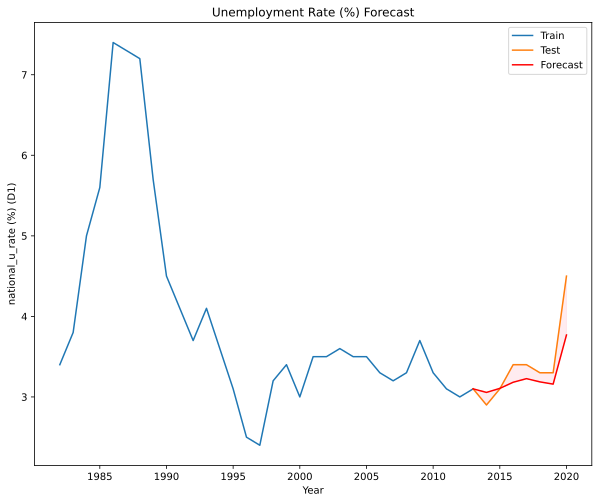

In [ ]:
# Plot the forecast
plt.figure(figsize=(10, 8))
plt.plot(X_train['Year'], y_train, label='Train')
plt.plot(X_test['Year'], y_test, label='Test')
plt.plot(forecast_df.index, forecast_df["Predictions"], color='red', label='Forecast')
plt.fill_between(forecast_df.index, forecast_df["Predictions"], forecast_df["Actual"], color='pink', alpha=0.3)
plt.xlabel('Year')
plt.ylabel('national_u_rate (%) (D1)')
plt.title('Unemployment Rate (%) Forecast')
plt.legend()
plt.show()

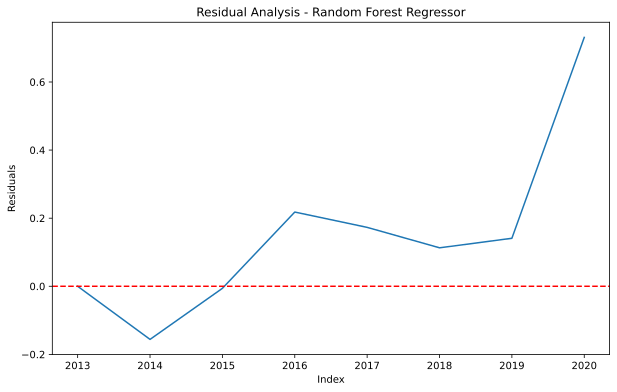

Mean of Residuals: 0.17189380530973375
Standard Deviation of Residuals: 0.2552547005914191


In [ ]:
# Residual Analysis
residuals_rf = y_test - predictions
plt.figure(figsize=(10, 6))
plt.plot(X_test['Year'],residuals_rf)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Residuals')
plt.title('Residual Analysis - Random Forest Regressor')
plt.show()

# Print the residuals statistics
print(f'Mean of Residuals: {np.mean(residuals_rf)}')
print(f'Standard Deviation of Residuals: {np.std(residuals_rf)}')

 This is a residual analysis for a Random Forest Regressor model, which shows the residuals (the differences between the actual and predicted values) over the years 2013 to 2020.

Trend Over Time:

From 2013 to around 2015, the residuals are relatively small and close to zero, suggesting that the model predictions are fairly accurate.
Between 2016 and 2020, there is a noticeable increase in the residuals, indicating that the model's predictions are becoming less accurate over time.
The significant rise in residuals around 2020 suggests that the model's predictive power decreased substantially during this period.

Mean and Standard Deviation:

The mean of the residuals is 0.1719, which indicates that on average, the predictions are slightly underestimating the actual values by 0.1719 units.
The standard deviation of the residuals is
0.2553, which provides a measure of the spread or variability in the residuals. A higher standard deviation indicates more variability and less reliability in the predictions.

### Autoregressive Integrated Moving Average (ARIMA)

In [ ]:
pip install pandas statsmodels matplotlib

In [ ]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.6 MB/s eta 0:00:00


CombinedFeatureSelection_UnemploymentRateDataset - Best ARIMA Order: (0, 1, 0)


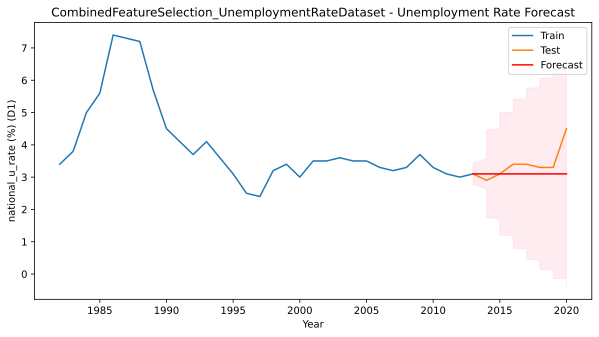

CombinedFeatureSelection_UnemploymentRateDataset - MAE: 0.36814159292035387, MSE: 0.3199999999999999, RMSE: 0.5656854249492379, R-squared: -0.4352028773743952
PCA_UnemploymentRateDataset - Best ARIMA Order: (0, 1, 0)


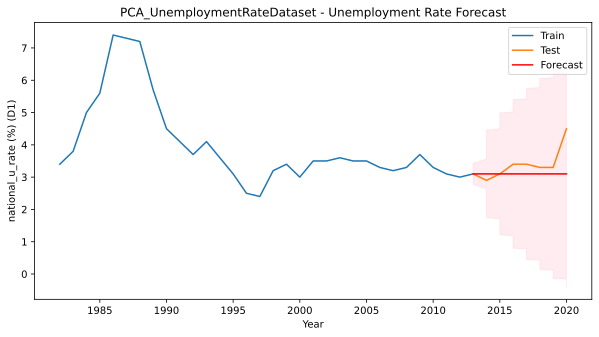

PCA_UnemploymentRateDataset - MAE: 0.36814159292035387, MSE: 0.3199999999999999, RMSE: 0.5656854249492379, R-squared: -0.4352028773743952
RFE_UnemploymentRateDataset - Best ARIMA Order: (0, 1, 0)


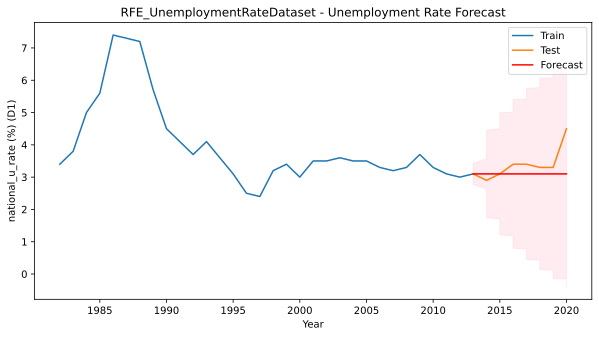

RFE_UnemploymentRateDataset - MAE: 0.36814159292035387, MSE: 0.3199999999999999, RMSE: 0.5656854249492379, R-squared: -0.4352028773743952
SelectKBest_UnemploymentRateDataset - Best ARIMA Order: (0, 1, 0)


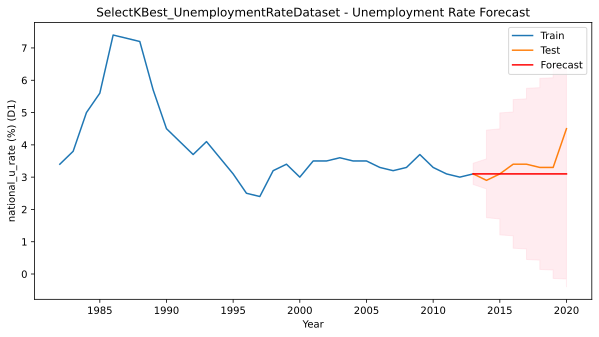

SelectKBest_UnemploymentRateDataset - MAE: 0.36814159292035387, MSE: 0.3199999999999999, RMSE: 0.5656854249492379, R-squared: -0.4352028773743952
                                            Dataset Best ARIMA Order  MAE  \
0  CombinedFeatureSelection_UnemploymentRateDataset        (0, 1, 0)  0.4   
1                       PCA_UnemploymentRateDataset        (0, 1, 0)  0.4   
2                       RFE_UnemploymentRateDataset        (0, 1, 0)  0.4   
3               SelectKBest_UnemploymentRateDataset        (0, 1, 0)  0.4   

   MSE  RMSE  R-Squared  
0  0.3   0.6       -0.4  
1  0.3   0.6       -0.4  
2  0.3   0.6       -0.4  
3  0.3   0.6       -0.4  


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from pmdarima import auto_arima
import warnings

warnings.filterwarnings("ignore")

# Load datasets
datasets = {
    'CombinedFeatureSelection_UnemploymentRateDataset': pd.read_csv('/content/CombinedFeatureSelection_UnemploymentRateDataset.csv', index_col='Year', parse_dates=True),
    'PCA_UnemploymentRateDataset': pd.read_csv('/content/PCA_UnemploymentRateDataset.csv', index_col='Year', parse_dates=True),
    'RFE_UnemploymentRateDataset': pd.read_csv('/content/RFE_UnemploymentRateDataset.csv', index_col='Year', parse_dates=True),
    'SelectKBest_UnemploymentRateDataset': pd.read_csv('/content/SelectKBest_UnemploymentRateDataset.csv', index_col='Year', parse_dates=True)
}

# Function to process each dataset
def process_dataset(name, df):
    df = df.dropna()
    target = df['national_u_rate (%) (D1)']

    # Ensure no negative unemployment rates
    target = target[target > 0]

    # Split the data into training and testing sets
    train_size = int(len(target) * 0.8)
    train, test = target.iloc[:train_size], target.iloc[train_size:]
    train_index, test_index = df.index[:train_size], df.index[train_size:]

    # Automatically find the best ARIMA parameters
    stepwise_fit = auto_arima(train, start_p=0, start_q=0, max_p=5, max_q=5, seasonal=False, stepwise=True, trace=False)

    # Summary of the model
    print(f'{name} - Best ARIMA Order: {stepwise_fit.order}')

    # Fit the selected model
    best_model = ARIMA(train, order=stepwise_fit.order)
    best_model_fit = best_model.fit()

    # Forecasting future values
    n_periods = len(test)
    forecast = best_model_fit.get_forecast(steps=n_periods)
    forecast_df = forecast.conf_int(alpha=0.05)
    forecast_df["Predictions"] = best_model_fit.predict(start=forecast_df.index[0], end=forecast_df.index[-1])
    forecast_df.index = test_index

    # Plot the forecast
    plt.figure(figsize=(10, 5))
    plt.plot(train_index, train, label='Train')
    plt.plot(test_index, test, label='Test')
    plt.plot(forecast_df.index, forecast_df["Predictions"], color='red', label='Forecast')
    plt.fill_between(forecast_df.index, forecast_df.iloc[:, 0], forecast_df.iloc[:, 1], color='pink', alpha=0.3)
    plt.xlabel('Year')
    plt.ylabel('national_u_rate (%) (D1)')
    plt.title(f'{name} - Unemployment Rate Forecast')
    plt.legend()
    plt.show()

    # Evaluate the model
    mae = mean_absolute_error(test, forecast_df["Predictions"])
    mse = mean_squared_error(test, forecast_df["Predictions"])
    rmse = np.sqrt(mse)
    r_squared = r2_score(test, forecast_df["Predictions"])

    # Print the evaluation metrics
    print(f'{name} - MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R-squared: {r_squared}')

    # Return the results
    return {
        'Dataset': name,
        'Best ARIMA Order': stepwise_fit.order,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R-Squared': r_squared
    }

# Process each dataset and collect results
results = []
for name, df in datasets.items():
    result = process_dataset(name, df)
    results.append(result)

# Create a DataFrame to display the results
result_dataframe = pd.DataFrame(results, columns=['Dataset', 'Best ARIMA Order', 'MAE','MSE', 'RMSE', 'R-Squared'])
print(result_dataframe)


For the models using the CombinedFeatureSelection, PCA, RFE, and SelectKBest datasets, all have identical metrics:

MAE: 0.36814159292035387

RMSE: 0.5656854249492379

R-squared: -0.4352028773743952

Given that all models have the same MAE, RMSE, and R-squared values, we cannot determine a "best" model based on these metrics alone, as they all perform equally.

###  Linear Regression

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [ ]:
# Load datasets
datasets = {
    'CombinedFeatureSelection_UnemploymentRateDataset': pd.read_csv('/content/CombinedFeatureSelection_UnemploymentRateDataset.csv'),
    'PCA_UnemploymentRateDataset': pd.read_csv('/content/PCA_UnemploymentRateDataset.csv'),
    'RFE_UnemploymentRateDataset': pd.read_csv('/content/RFE_UnemploymentRateDataset.csv'),
    'SelectKBest_UnemploymentRateDataset': pd.read_csv('/content/SelectKBest_UnemploymentRateDataset.csv')
}

In [ ]:
# Function to process each dataset
def process_dataset(name, df):
    # Define features and target variable
    X = df.drop(['Year','national_u_rate (%) (D1)'], axis=1)  # Features
    y = df['national_u_rate (%) (D1)']  # Target variable
    Year=df['Year']

    # Feature scaling
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Convert scaled data back to DataFrame to retain indices
    X_scaled_df = pd.DataFrame(X_scaled, index=Year, columns=X.columns)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42,shuffle=False)

    # Create and train the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Cross-validation scores
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    print(f'{name} - Cross-Validation R2 Scores: {cv_scores}')
    print(f'{name} - Mean Cross-Validation R2 Score: {np.mean(cv_scores)}')

    # Evaluate the model
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r_squared = r2_score(y_test, y_pred)

    print(f'Dataset: {name}')
    print("MAE: ", mae)
    print("MSE: ", mse)
    print("RMSE: ", rmse)
    print("R-squared: ", r_squared)
    print('\n')

    # Store results
    return {
        'Dataset': name,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R-Squared': r_squared,
        'CV R-Squared': np.mean(cv_scores)
    }

In [ ]:
# Process each dataset and collect results
results = []
for name, df in datasets.items():
    result = process_dataset(name, df)
    results.append(result)

# Create a DataFrame to display the results
result_dataframe = pd.DataFrame(results, columns=['Dataset', 'MAE', 'MSE', 'RMSE', 'R-Squared', 'CV R-Squared'])
result_dataframe

CombinedFeatureSelection_UnemploymentRateDataset - Cross-Validation R2 Scores: [ 0.99709384  0.97095132  0.93444365 -0.95132867 -3.30671581]
CombinedFeatureSelection_UnemploymentRateDataset - Mean Cross-Validation R2 Score: -0.2711111348232222
Dataset: CombinedFeatureSelection_UnemploymentRateDataset
MAE:  0.29302376464082225
MSE:  0.26596404770813664
RMSE:  0.515717022899319
R-squared:  -0.19285114546518356


PCA_UnemploymentRateDataset - Cross-Validation R2 Scores: [  -0.14336592    0.29106003   -9.56247835  -17.74645924 -122.0769677 ]
PCA_UnemploymentRateDataset - Mean Cross-Validation R2 Score: -29.847642235793302
Dataset: PCA_UnemploymentRateDataset
MAE:  2.9968864106392967
MSE:  9.597805648247121
RMSE:  3.098032544736598
R-squared:  -42.046244633889046


RFE_UnemploymentRateDataset - Cross-Validation R2 Scores: [  0.98655645   0.9856713    0.95600478  -0.74513145 -17.17440976]
RFE_UnemploymentRateDataset - Mean Cross-Validation R2 Score: -2.9982617366598237
Dataset: RFE_Unemploym

,Dataset,MAE,MSE,RMSE,R-Squared,CV R-Squared
0,CombinedFeatureSelection_UnemploymentRateDataset,0.3,0.3,0.5,-0.2,-0.3
1,PCA_UnemploymentRateDataset,3.0,9.6,3.1,-42.0,-29.8
2,RFE_UnemploymentRateDataset,0.8,0.7,0.9,-2.3,-3.0
3,SelectKBest_UnemploymentRateDataset,0.4,0.5,0.7,-1.3,0.1


For the Linear Regression model, CombinedFeatureSelection_UnemploymentRateDataset has the best overall performance with the lowest MAE and RMSE and the least negative R-squared value. This indicates that it provides the most accurate and reliable predictions for unemployment rates among the datasets tested.

In [ ]:
# Train model with the best overall performance dataset

# Define X and y
best_df = datasets['CombinedFeatureSelection_UnemploymentRateDataset']
X = best_df.drop(['Year','national_u_rate (%) (D1)'], axis=1)  # Features
y = best_df['national_u_rate (%) (D1)']  # Target variable
Year=df['Year']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert scaled data back to DataFrame to retain indices
X_scaled_df = pd.DataFrame(X_scaled, index=Year, columns=X.columns)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42, shuffle=False)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Generate predictions on the test data
predictions = model.predict(X_test)

In [ ]:
# Use the index from y_test (which retains the original DataFrame's index)
forecast_df = pd.DataFrame({'Predictions': predictions, 'Actual': y_test.values}, index=X_test.index)

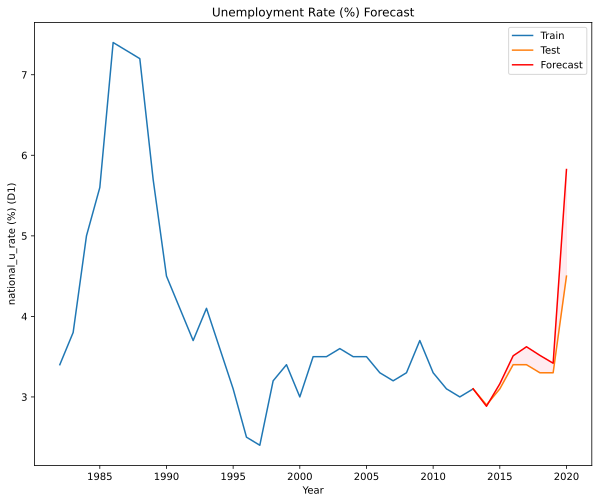

In [ ]:
# Plot the forecast
plt.figure(figsize=(10, 8))
plt.plot(X_train.index, y_train, label='Train')
plt.plot(X_test.index, y_test, label='Test')
plt.plot(forecast_df.index, forecast_df["Predictions"], color='red', label='Forecast')
plt.fill_between(forecast_df.index, forecast_df["Predictions"], forecast_df["Actual"], color='pink', alpha=0.3)
plt.xlabel('Year')
plt.ylabel('national_u_rate (%) (D1)')
plt.title('Unemployment Rate (%) Forecast')
plt.legend()
plt.show()

In [ ]:
# Print evaluation metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')

Mean Absolute Error (MAE): 0.29302376464082225
Mean Squared Error (MSE): 0.26596404770813664
Root Mean Squared Error (RMSE): 0.515717022899319
R-squared (R²): -0.19285114546518356


Added residual analysis to check for patterns in the residuals.

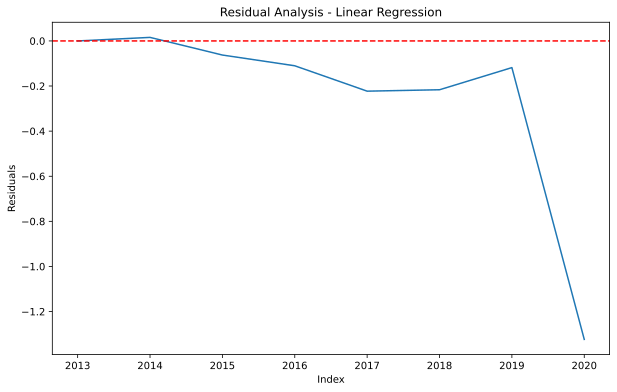

In [ ]:
# Residual Analysis
residuals_lr = y_test - predictions
plt.figure(figsize=(10, 6))
plt.plot(X_test.index,residuals_lr)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Residuals')
plt.title('Residual Analysis - Linear Regression')
plt.show()

In [ ]:
# Print the residuals statistics
print(f'Mean of Residuals: {np.mean(residuals_lr)}')
print(f'Standard Deviation of Residuals: {np.std(residuals_lr)}')

Mean of Residuals: -0.28858209020444325
Standard Deviation of Residuals: 0.42741598580466217


Trend Over Time:

From 2013 to 2015, the residuals are close to zero, suggesting that the model predictions are relatively accurate during this period.
From 2015 onwards, the residuals start to become more negative, indicating that the model's predictions are increasingly overestimating the actual values.
There is a noticeable sharp decline in the residuals around 2020, suggesting a significant overprediction by the model for that year.
Mean and Standard Deviation:

The mean of the residuals is -0.2598, which indicates that on average, the model's predictions are overestimating the actual values by 0.2598 units.
The standard deviation of the residuals is 0.4101, which provides a measure of the spread or variability in the residuals. A higher standard deviation indicates more variability and less reliability in the predictions.

### GBM (Gradient Boosting Machines)

In [ ]:
pip install xgboost

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
# Load datasets
datasets = {
    'CombinedFeatureSelection_UnemploymentRateDataset': pd.read_csv('CombinedFeatureSelection_UnemploymentRateDataset.csv'),
    'PCA_UnemploymentRateDataset': pd.read_csv('PCA_UnemploymentRateDataset.csv'),
    'RFE_UnemploymentRateDataset': pd.read_csv('RFE_UnemploymentRateDataset.csv'),
    'SelectKBest_UnemploymentRateDataset': pd.read_csv('SelectKBest_UnemploymentRateDataset.csv')
}

In [ ]:
# Define the function to process each dataset
def process_dataset(name, df):
    # Define features and target variable
    X = df.drop(['Year','national_u_rate (%) (D1)'], axis=1)  # Features
    y = df['national_u_rate (%) (D1)']  # Target variable
    Year=df['Year']
    # Feature scaling
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Convert scaled data back to DataFrame to retain indices
    X_scaled_df = pd.DataFrame(X_scaled, index=Year, columns=X.columns)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42,shuffle=False)

    # Create an XGBoost regressor
    model = xgb.XGBRegressor(random_state=42)

    # Define a parameter grid to search
    param_grid = {
        'n_estimators': [100, 200, 300, 400, 500],
        'max_depth': [3, 5, 7, 9],
        'learning_rate': [0.01, 0.05, 0.1, 0.2],
        'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
        'gamma': [0, 0.1, 0.2, 0.3],
        'reg_alpha': [0, 0.01, 0.05, 0.1],
        'reg_lambda': [1, 1.5, 2, 3]
    }

    # Define time series cross-validation
    tscv = TimeSeriesSplit(n_splits=5)

    # Perform RandomizedSearchCV
    random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100, cv=tscv, scoring='neg_mean_squared_error', random_state=42, n_jobs=-1)
    random_search.fit(X_train, y_train)

    # Get the best parameters and the best score
    best_params = random_search.best_params_
    best_score = -random_search.best_score_

    print(f'{name} - Best Parameters: {best_params}')
    print(f'{name} - Best Score (MSE): {best_score}')

    # Use the best parameters to train the final model
    best_model = xgb.XGBRegressor(**best_params)
    best_model.fit(X_train, y_train)

    # Make predictions
    predictions = best_model.predict(X_test)

    # Evaluate the final model
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)

    print(f'{name} - Mean Absolute Error (MAE): {mae}')
    print(f'{name} - Mean Squared Error (MSE): {mse}')
    print(f'{name} - Root Mean Squared Error (RMSE): {rmse}')
    print(f'{name} - R-squared (R²): {r2}')
    print('\n')

    # Store results
    return {
        'Dataset': name,
        'Best Parameters': best_params,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R-Squared': r2
    }

In [ ]:
# Process each dataset and collect results
results = []
for name, df in datasets.items():
    result = process_dataset(name, df)
    results.append(result)

# Create a DataFrame to display the results
result_dataframe = pd.DataFrame(results, columns=['Dataset', 'Best Parameters', 'MAE', 'MSE', 'RMSE', 'R-Squared'])
print(result_dataframe)

# Find the dataset with the highest R-squared score
best_gbm_dataset = result_dataframe.loc[result_dataframe['R-Squared'].idxmax()]['Dataset']
best_gbm_params = result_dataframe.loc[result_dataframe['R-Squared'].idxmax()]['Best Parameters']

CombinedFeatureSelection_UnemploymentRateDataset - Best Parameters: {'subsample': 0.6, 'reg_lambda': 1, 'reg_alpha': 0, 'n_estimators': 500, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.7}
CombinedFeatureSelection_UnemploymentRateDataset - Best Score (MSE): 0.629575426399449
CombinedFeatureSelection_UnemploymentRateDataset - Mean Absolute Error (MAE): 0.12357048777352392
CombinedFeatureSelection_UnemploymentRateDataset - Mean Squared Error (MSE): 0.026134506168519346
CombinedFeatureSelection_UnemploymentRateDataset - Root Mean Squared Error (RMSE): 0.1616617028504876
CombinedFeatureSelection_UnemploymentRateDataset - R-squared (R²): 0.8827865048380692


PCA_UnemploymentRateDataset - Best Parameters: {'subsample': 0.9, 'reg_lambda': 3, 'reg_alpha': 0.01, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.9}
PCA_UnemploymentRateDataset - Best Score (MSE): 1.174262857815739
PCA_UnemploymentRateDataset - Mean Absolute E

For the GBM model, CombinedFeatureSelection_UnemploymentRateDataset with hyperparameters {'subsample': 0.6, 'reg_lambda': 1, 'reg_alpha': 0, 'n_estimators': 500, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.7} has the best overall performance with the lowest MAE and RMSE and the highest R-squared value.

In [ ]:
# Train the model with the best overall performance dataset
best_df = datasets[best_gbm_dataset]
X = best_df.drop(['Year','national_u_rate (%) (D1)'], axis=1)  # Features
y = best_df['national_u_rate (%) (D1)']  # Target variable
Year=df['Year']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert scaled data back to DataFrame to retain indices
X_scaled_df = pd.DataFrame(X_scaled, index=Year, columns=X.columns)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42, shuffle=False)

# Initialize and train the GBM model with the best hyperparameters
best_model = xgb.XGBRegressor(**best_gbm_params)
best_model.fit(X_train, y_train)

# Generate predictions on the test data
predictions = best_model.predict(X_test)

# Create a DataFrame for the predictions and actual values
forecast_df = pd.DataFrame({'Predictions': predictions, 'Actual': y_test.values}, index=X_test.index)

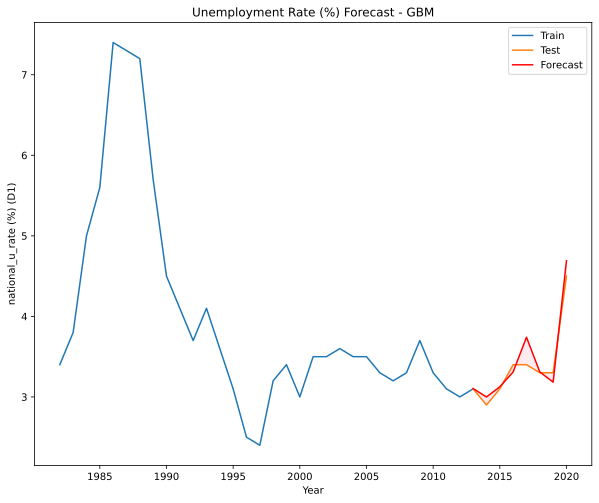

In [ ]:
# Plot the forecast
plt.figure(figsize=(10, 8))
plt.plot(X_train.index, y_train, label='Train')
plt.plot(X_test.index, y_test, label='Test')
plt.plot(forecast_df.index, forecast_df["Predictions"], color='red', label='Forecast')
plt.fill_between(forecast_df.index, forecast_df["Predictions"], forecast_df["Actual"], color='pink', alpha=0.3)
plt.xlabel('Year')
plt.ylabel('national_u_rate (%) (D1)')
plt.title('Unemployment Rate (%) Forecast - GBM')
plt.legend()
plt.show()

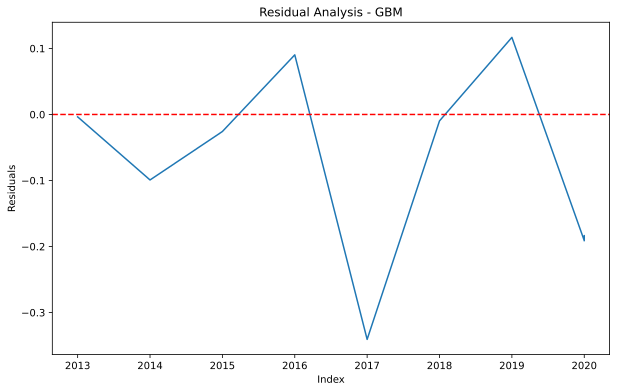

Mean of Residuals: -0.06494360054488739
Standard Deviation of Residuals: 0.1480433548552094


In [ ]:
# Residual Analysis
residuals_gbm = y_test - predictions
plt.figure(figsize=(10, 6))
plt.plot(X_test.index,residuals_gbm)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Index')

plt.ylabel('Residuals')
plt.title('Residual Analysis - GBM')
plt.show()

# Print the residuals statistics
print(f'Mean of Residuals: {np.mean(residuals_gbm)}')
print(f'Standard Deviation of Residuals: {np.std(residuals_gbm)}')

Trend Over Time:

From 2013 to around 2015, the residuals fluctuate around zero but remain relatively close, suggesting the model predictions are fairly accurate.
From 2015 to 2017, there is a significant negative spike, indicating that the model overpredicted the values during this period.
The residuals then rise above zero again in 2018, indicating an underprediction, and again dip below zero towards 2020, showing another period of overprediction.

Mean and Standard Deviation:

The mean of the residuals is -0.0649, which indicates that on average, the model's predictions are slightly overestimating the actual values by 0.0649 units.
The standard deviation of the residuals is 0.1480, which provides a measure of the spread or variability in the residuals. A lower standard deviation indicates that the residuals are closer to the mean, suggesting more reliable predictions.

## Choosing The Best Feature Selection Method among The Feature Selection Methods

The best dataset is the Combined All Feature Selection Methods, where they combined all the features from PCA, RFE and SelectKBest. This is because the performance is good in most models.

## Choosing The Best Model among The Five Models

Given the metrics, the GBM model with the CombinedFeatureSelection_UnemploymentRateDataset demonstrates the best overall performance. It has the lowest MAE and RMSE, and the highest (and positive) R-squared value, indicating it makes the most accurate predictions with the least error and best explains the variance in the unemployment rate data.

For the GBM model, CombinedFeatureSelection_UnemploymentRateDataset with hyperparameters {'subsample': 0.6, 'reg_lambda': 1, 'reg_alpha': 0, 'n_estimators': 500, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.7} has the best overall performance with the lowest MAE and RMSE and the highest R-squared value.

Converting ipynb to PDF

In [ ]:
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('Actual_Output_WIA1006_GroupAssignment_Group_35.ipynb')

File ‘colab_pdf.py’ already there; not retrieving.





E: Unable to locate package texlive-generic-recommended
[NbConvertApp] WARNING | pattern '$notebookpath$file_name' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y

'File Download Unsuccessful. Saved in Google Drive'